In [1]:
import os
import matplotlib.pyplot as plt

# Caminho para a pasta onde está o dataset
dataset_path = '/Users/josecunha/Documents/Mestrado/Tópicos de Ciencia de dados/tps/tp1/dataset (1)'

# Lista de classes
classes = ['forward', 'backward', 'left', 'right', 'stop', '_silence_', '_unknown_']

# Dicionário que vai armazenar as listas de arquivos
dataset_dict = {}

# 2.1 - Criar o dicionário com as classes e seus respectivos arquivos
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)  # Caminho para a pasta de cada classe
    if os.path.exists(class_path):  # Verificar se a pasta existe
        dataset_dict[class_name] = os.listdir(class_path)  # Armazenar os arquivos da classe
    else:
        print(f"dataset_path for class {class_name} does not exist.")


Class 'forward' has 1557 samples.
Class 'backward' has 1664 samples.
Class 'left' has 3801 samples.
Class 'right' has 3778 samples.
Class 'stop' has 3872 samples.
Class '_silence_' has 408 samples.
Class '_unknown_' has 635 samples.


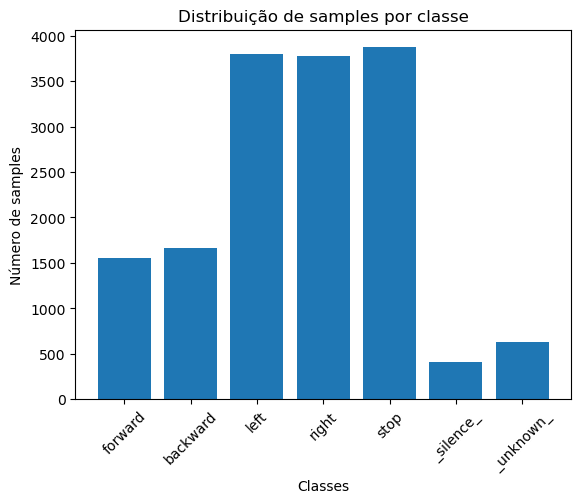

O dataset está desbalanceado.
Classe com mais samples: 3872, Classe com menos samples: 408
Possíveis consequências: Modelos de machine learning tendem a se ajustar mais às classes majoritárias, resultando em uma menor precisão nas classes com menos amostras.


In [2]:
# Exibir a quantidade de arquivos por classe (número de samples)
for class_name, files in dataset_dict.items():
    print(f"Class '{class_name}' has {len(files)} samples.")

# 2.2 - Analisar o balanceamento do dataset
def analyze_balance(dataset_dict):
    sample_counts = {class_name: len(files) for class_name, files in dataset_dict.items()}
    
    # Plotar gráfico de barras para visualização
    plt.bar(sample_counts.keys(), sample_counts.values())
    plt.xlabel('Classes')
    plt.ylabel('Número de samples')
    plt.title('Distribuição de samples por classe')
    plt.xticks(rotation=45)
    plt.show()
    
    # Verificar se o dataset está balanceado
    max_samples = max(sample_counts.values())
    min_samples = min(sample_counts.values())
    
    if max_samples / min_samples > 1.5:  # Se a diferença for maior que 50%
        print("O dataset está desbalanceado.")
        print(f"Classe com mais samples: {max_samples}, Classe com menos samples: {min_samples}")
        print("Possíveis consequências: Modelos de machine learning tendem a se ajustar mais às classes majoritárias, resultando em uma menor precisão nas classes com menos amostras.")
    else:
        print("O dataset está relativamente balanceado.")

# Chamar a função para analisar o balanceamento
analyze_balance(dataset_dict)


In [3]:
import numpy as np
import scipy.io.wavfile as wav
import os

# Função para carregar e normalizar o áudio (2.3)
def load_and_normalize_sound(filename, class_path):
    """
    Carrega o áudio do arquivo .wav e normaliza os valores entre -1 e 1.
    
    Parâmetros:
    filename (str): Nome do arquivo de áudio.
    class_path (str): Caminho para a pasta da classe do áudio.
    
    Retorna:
    np.array: Sinal de áudio normalizado.
    """
    file_path = os.path.join(class_path, filename)
    
    # Carregar o arquivo de som
    sample_rate, signal = wav.read(file_path)
    
    # Verificar o tipo de dado do sinal (int16, int32, etc.)
    dtype = signal.dtype
    if dtype == np.int16:
        signal = signal / np.iinfo(np.int16).max  # Normalizar para [-1, 1] para int16
    elif dtype == np.int32:
        signal = signal / np.iinfo(np.int32).max  # Normalizar para [-1, 1] para int32
    elif dtype == np.uint8:
        signal = (signal - 128) / 128  # Normalizar para [-1, 1] para uint8
    
    return sample_rate, signal

# Exemplo de uso com o arquivo real do dataset
dataset_path = '/Users/josecunha/Documents/Mestrado/Tópicos de Ciencia de dados/tps/tp1/dataset (1)'
class_name = 'stop'  # Classe 'stop'
filename = '0a2b400e_nohash_0.wav'  # Nome do arquivo a ser carregado

# Carregar e normalizar o áudio
sample_rate, signal = load_and_normalize_sound(filename, os.path.join(dataset_path, class_name))

# Mostrar algumas informações sobre o áudio
print(f"Taxa de amostragem: {sample_rate} Hz")
print(f"Tamanho do sinal: {len(signal)} samples")
print(f"Primeiros 10 samples normalizados: {signal[:10]}")


Taxa de amostragem: 16000 Hz
Tamanho do sinal: 16000 samples
Primeiros 10 samples normalizados: [-6.10370190e-05 -1.22074038e-04 -1.52592547e-04 -1.22074038e-04
 -1.83111057e-04 -1.83111057e-04 -2.74666585e-04 -2.44148076e-04
 -2.44148076e-04 -3.35703604e-04]


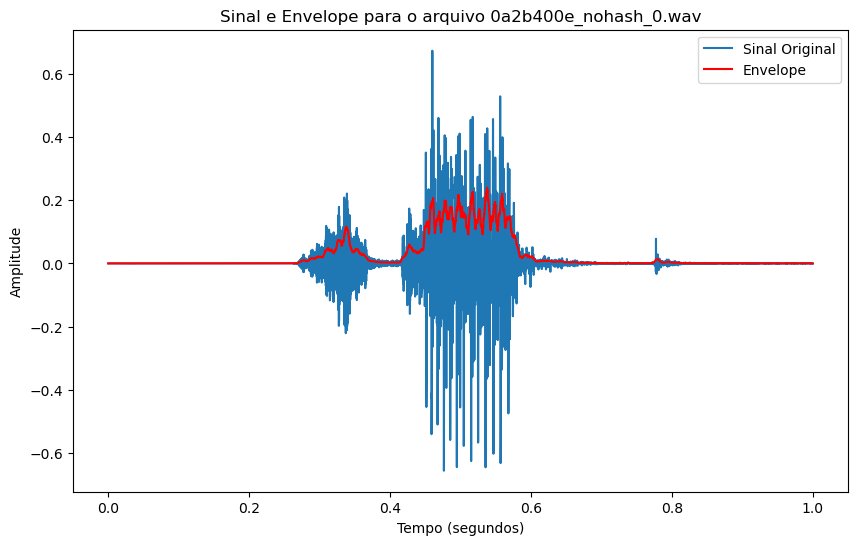

In [4]:
import matplotlib.pyplot as plt

# Função para calcular a envelope (2.4)
def envelope(signal, window_size):
    """
    Calcula a 'envelope' de um sinal dado, aplicando uma média móvel sobre os valores absolutos.
    
    Parâmetros:
    signal (numpy array): O sinal de áudio.
    window_size (int): O tamanho da janela de média móvel (deve ser ímpar).
    
    Retorna:
    numpy array: A envelope do sinal com o mesmo comprimento que o sinal original.
    """
    # Obter os valores absolutos do sinal
    abs_signal = np.abs(signal)
    
    # Verificar se o window_size é ímpar, se não, aumentar em 1 para garantir que seja ímpar
    if window_size % 2 == 0:
        window_size += 1

    # Aplicar a média móvel com padding nas bordas (zero-padding)
    envelope_signal = np.convolve(abs_signal, np.ones(window_size)/window_size, mode='same') #mode='same' garante que o sinal de saída tenha o mesmo comprimento que o sinal de entrada
    
    return envelope_signal


# Calcular a envelope
window_size = 101  # Tamanho da janela de média móvel
env = envelope(signal, window_size)
# Plotar o sinal original e a envelope para visualização
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, len(signal)/sample_rate, len(signal)), signal, label='Sinal Original')
plt.plot(np.linspace(0, len(env)/sample_rate, len(env)), env, label='Envelope', color='red')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Amplitude')
plt.legend()
plt.title(f'Sinal e Envelope para o arquivo {filename}')
plt.show()



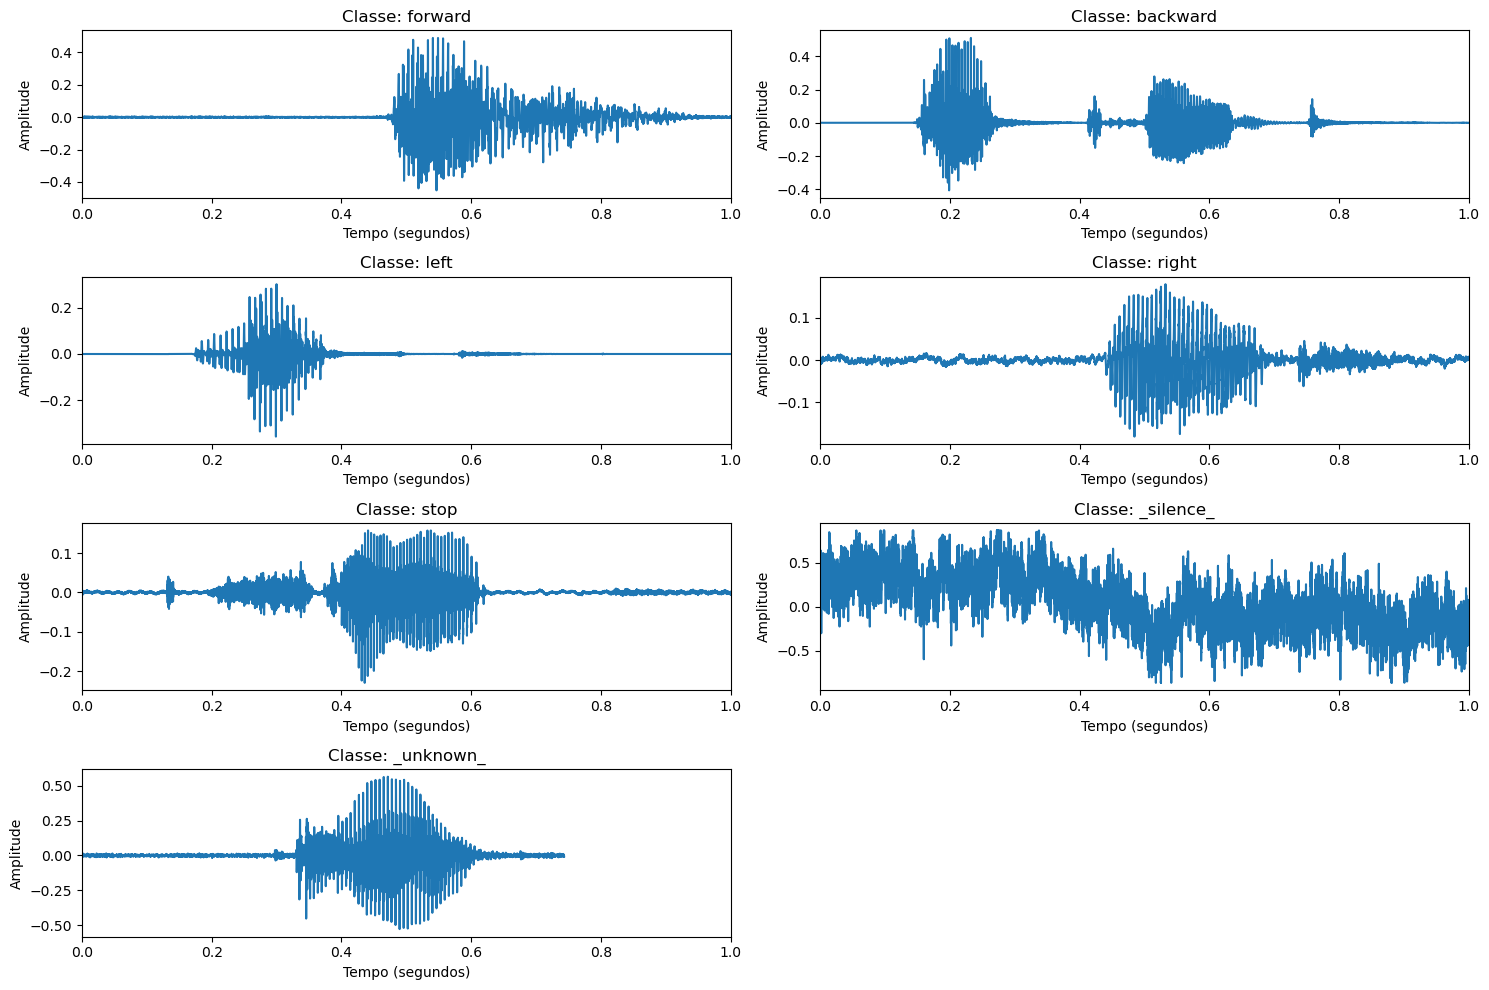

In [5]:
import random

# Função para selecionar e carregar um som aleatório de cada classe
def get_random_sound_from_each_class(dataset_path, classes):
    """
    Seleciona aleatoriamente um arquivo de áudio de cada classe, carrega e normaliza os sinais.
    
    Parâmetros:
    dataset_path (str): Caminho para a pasta do dataset.
    classes (list): Lista de classes disponíveis.
    
    Retorna:
    dict: Dicionário com os sinais normalizados e suas taxas de amostragem, organizados por classe.
    """
    sound_data = {}
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        files = os.listdir(class_path)
        random_file = random.choice(files)  # Seleciona um arquivo aleatório da classe
        sample_rate, signal = load_and_normalize_sound(random_file, class_path)
        sound_data[class_name] = (sample_rate, signal)  # Armazena o sinal e a taxa de amostragem
    return sound_data

# Função para plotar os sinais com subplots (2.5)
def plot_signals(sound_data):
    """
    Gera uma figura com 7 subplots mostrando os sinais de áudio normalizados de cada classe.
    
    Parâmetros:
    sound_data (dict): Dicionário com os sinais de áudio normalizados, organizados por classe.
    """
    plt.figure(figsize=(15, 10))
    
    for i, (class_name, (sample_rate, signal)) in enumerate(sound_data.items()):
        plt.subplot(4, 2, i+1)  # Configurar subplot (4 linhas, 2 colunas, i+1 posição)
        
        # Definir o tempo com base na taxa de amostragem e tamanho do sinal
        time = np.linspace(0, len(signal)/sample_rate, len(signal))
        
        # Plotar o sinal
        plt.plot(time, signal)
        plt.title(f'Classe: {class_name}')
        plt.xlabel('Tempo (segundos)')
        plt.ylabel('Amplitude')
        
        # Forçar o eixo x a mostrar de 0 a 1 segundo
        plt.xlim([0, 1])
    
    # Ajustar a disposição dos subplots
    plt.tight_layout()
    plt.show()

# Exemplo de uso
dataset_path = '/Users/josecunha/Documents/Mestrado/Tópicos de Ciencia de dados/tps/tp1/dataset (1)'
classes = ['forward', 'backward', 'left', 'right', 'stop', '_silence_', '_unknown_']

# Selecionar um arquivo aleatório de cada classe e carregar os sinais
sound_data = get_random_sound_from_each_class(dataset_path, classes)

# Plotar os sinais em subplots
plot_signals(sound_data)


In [6]:
import os
import scipy.io.wavfile as wav

# Função para calcular a duração dos arquivos de som de uma classe (3.1)
def get_sound_durations(class_path):
    """
    Retorna um array com a duração de cada som em uma determinada classe.
    
    Parâmetros:
    class_path (str): Caminho para a pasta da classe de som.
    
    Retorna:
    list: Lista com as durações (em segundos) de cada arquivo de som na classe.
    """
    durations = []
    files = os.listdir(class_path)
    
    for filename in files:
        file_path = os.path.join(class_path, filename)
        sample_rate, signal = wav.read(file_path)
        duration = len(signal) / sample_rate  # Duração = número de amostras / taxa de amostragem
        durations.append(duration)
    
    return durations

# Exemplo de uso
class_path = '/Users/josecunha/Documents/Mestrado/Tópicos de Ciencia de dados/tps/tp1/dataset (1)/stop'
durations = get_sound_durations(class_path)
print(f"Durações dos sons na classe 'stop': {durations}")


Durações dos sons na classe 'stop': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.882375, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9288125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.64, 1.0, 0.554625, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.64, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9173125, 0.768, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.810625, 1.0, 0.8533125, 1.0, 1.0, 1.0, 1.0, 0.97525, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6826875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7535, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8106875, 1.0, 0.682625, 1.0, 1.0, 0.8106875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

In [7]:
# Função para calcular a amplitude média da envelope de cada som em uma classe (3.2)
def get_avg_envelope_amplitude(class_path, window_size=101):
    """
    Retorna um array com a amplitude média da envelope de cada som em uma determinada classe.
    
    Parâmetros:
    class_path (str): Caminho para a pasta da classe de som.
    window_size (int): O tamanho da janela de média móvel para calcular a envelope.
    
    Retorna:
    list: Lista com as amplitudes médias da envelope de cada arquivo de som na classe.
    """
    avg_amplitudes = []
    files = os.listdir(class_path)
    
    for filename in files:
        file_path = os.path.join(class_path, filename)
        sample_rate, signal = wav.read(file_path)
        
        # Normalizar o sinal de áudio
        signal = signal / np.iinfo(signal.dtype).max
        
        # Calcular a envelope do sinal
        env = envelope(signal, window_size)
        
        # Calcular a amplitude média da envelope
        avg_amplitude = np.mean(env)
        avg_amplitudes.append(avg_amplitude)
    
    return avg_amplitudes

# Exemplo de uso
avg_amplitudes = get_avg_envelope_amplitude(class_path)
print(f"Amplitude média das envelopes dos sons na classe 'stop': {avg_amplitudes}")


Amplitude média das envelopes dos sons na classe 'stop': [0.031775647974432136, 0.013315853731129515, 0.009705235049934023, 0.007162439809038737, 0.013538752577076612, 0.03329370581048247, 0.06306248389091054, 0.017502476984964647, 0.016333722016264245, 0.02334224026859915, 0.05720783346683922, 0.007410299698561732, 0.01352076372872127, 0.050677955015112706, 0.04263301369601208, 0.05112403594748036, 0.009728101043158913, 0.027463125161090892, 0.006424842693702642, 0.02825956024414203, 0.016940247723424954, 0.011678220106893346, 0.03230785434675382, 0.17882959718286964, 0.02857763872928783, 0.01535013642302522, 0.033944864290080555, 0.0138413036185283, 0.011297044737600122, 0.03444440717342097, 0.04250377721321892, 0.013032659904147707, 0.019889244117708378, 0.05343246270849657, 0.01164547859972618, 0.006470840432915633, 0.06066863298908858, 0.006351708749475369, 0.013591275781719534, 0.028119939441910134, 0.015995408777304623, 0.02911846199478647, 0.017774764240737255, 0.02702920109567

In [8]:
import numpy as np
from scipy import stats

# Função para identificar outliers e calcular a densidade de outliers (3.3)
def detect_outliers(data, method='zscore', **kwargs):
    """
    Detecta outliers em um conjunto de dados usando os métodos 'zscore' ou 'iqr'.
    
    Parâmetros:
    data (array-like): O array de valores a ser analisado.
    method (str): O método para detectar outliers ('zscore' ou 'iqr').
    **kwargs: Parâmetros adicionais necessários para o método escolhido (ex: valor de k no zscore).
    
    Retorna:
    tuple: A densidade de outliers e uma lista com os índices dos outliers.
    """
    if method == 'zscore':
        k = kwargs.get('k', 3)  # Valor de k para o z-score (desvio padrão, por padrão 3)
        z_scores = np.abs(stats.zscore(data))  # Calcular o z-score absoluto
        outliers = np.where(z_scores > k)[0]  # Índices dos outliers
    elif method == 'iqr':
        q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
        iqr = q75 - q25
        lower_bound = q25 - 1.5 * iqr  # Limite inferior
        upper_bound = q75 + 1.5 * iqr  # Limite superior
        outliers = np.where((data < lower_bound) | (data > upper_bound))[0]  # Índices dos outliers
    else:
        raise ValueError("O método deve ser 'zscore' ou 'iqr'.")
    
    # Calcular a densidade de outliers
    no_outliers = len(outliers)  # Número de outliers
    total_elements = len(data)  # Número total de elementos
    density = (no_outliers / total_elements) * 100  # Densidade de outliers (%)
    
    return density, outliers

# Aplicar a função detect_outliers às durações de uma classe, por exemplo 'forward'
class_path = '/Users/josecunha/Documents/Mestrado/Tópicos de Ciencia de dados/tps/tp1/dataset (1)/forward'
durations = get_sound_durations(class_path)

# Detectar outliers usando o método 'zscore'
zscore_density, zscore_outliers = detect_outliers(durations, method='zscore', k=3.5)
print(f"Densidade de outliers (z-score) para a classe 'forward': {zscore_density}%")
print(f"Índices dos outliers: {zscore_outliers}")

# Detectar outliers usando o método 'iqr'
iqr_density, iqr_outliers = detect_outliers(durations, method='iqr')
print(f"Densidade de outliers (IQR) para a classe 'forward': {iqr_density}%")
print(f"Índices dos outliers: {iqr_outliers}")


Densidade de outliers (z-score) para a classe 'forward': 2.6332691072575463%
Índices dos outliers: [  19   56   58   81  113  140  183  191  249  256  290  332  341  389
  400  408  479  550  562  572  602  658  689  712  717  773  890  900
  996 1165 1199 1213 1258 1311 1315 1351 1425 1426 1495 1503 1524]
Densidade de outliers (IQR) para a classe 'forward': 6.74373795761079%
Índices dos outliers: [   7   19   25   36   54   56   58   78   81   86  112  113  126  140
  143  144  183  191  199  201  236  249  256  271  275  285  286  290
  307  308  323  324  332  341  346  356  389  400  408  428  450  463
  479  495  496  499  503  530  548  550  555  562  572  602  604  658
  664  677  679  689  699  712  717  726  728  732  773  789  857  890
  900  946  996 1014 1024 1098 1138 1160 1165 1172 1176 1186 1194 1199
 1211 1213 1225 1258 1271 1276 1284 1290 1300 1311 1315 1321 1351 1388
 1389 1425 1426 1495 1503 1520 1524]


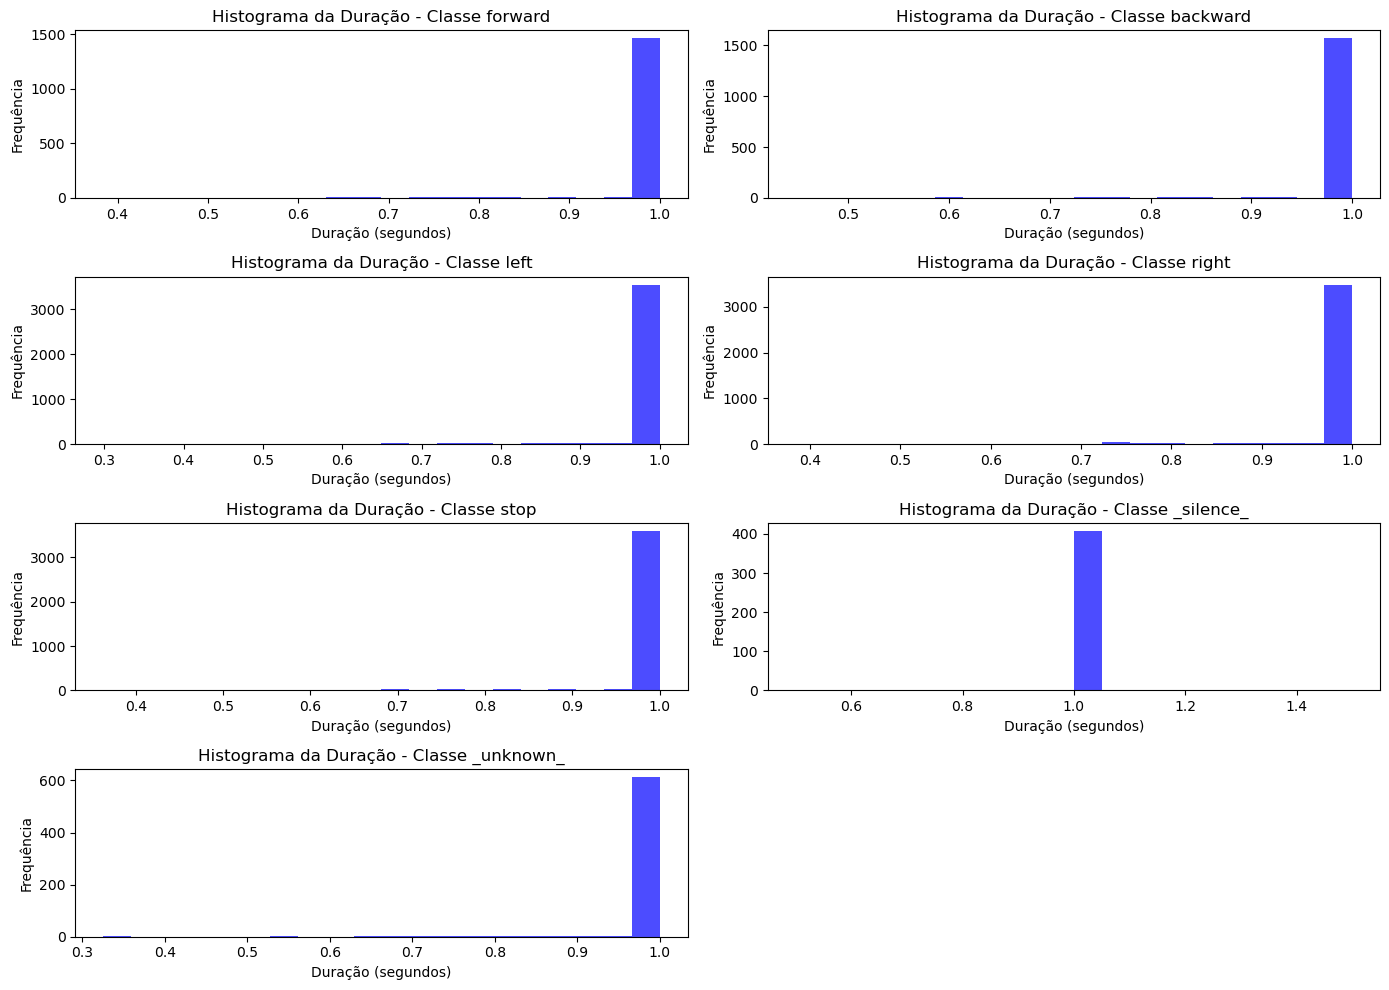

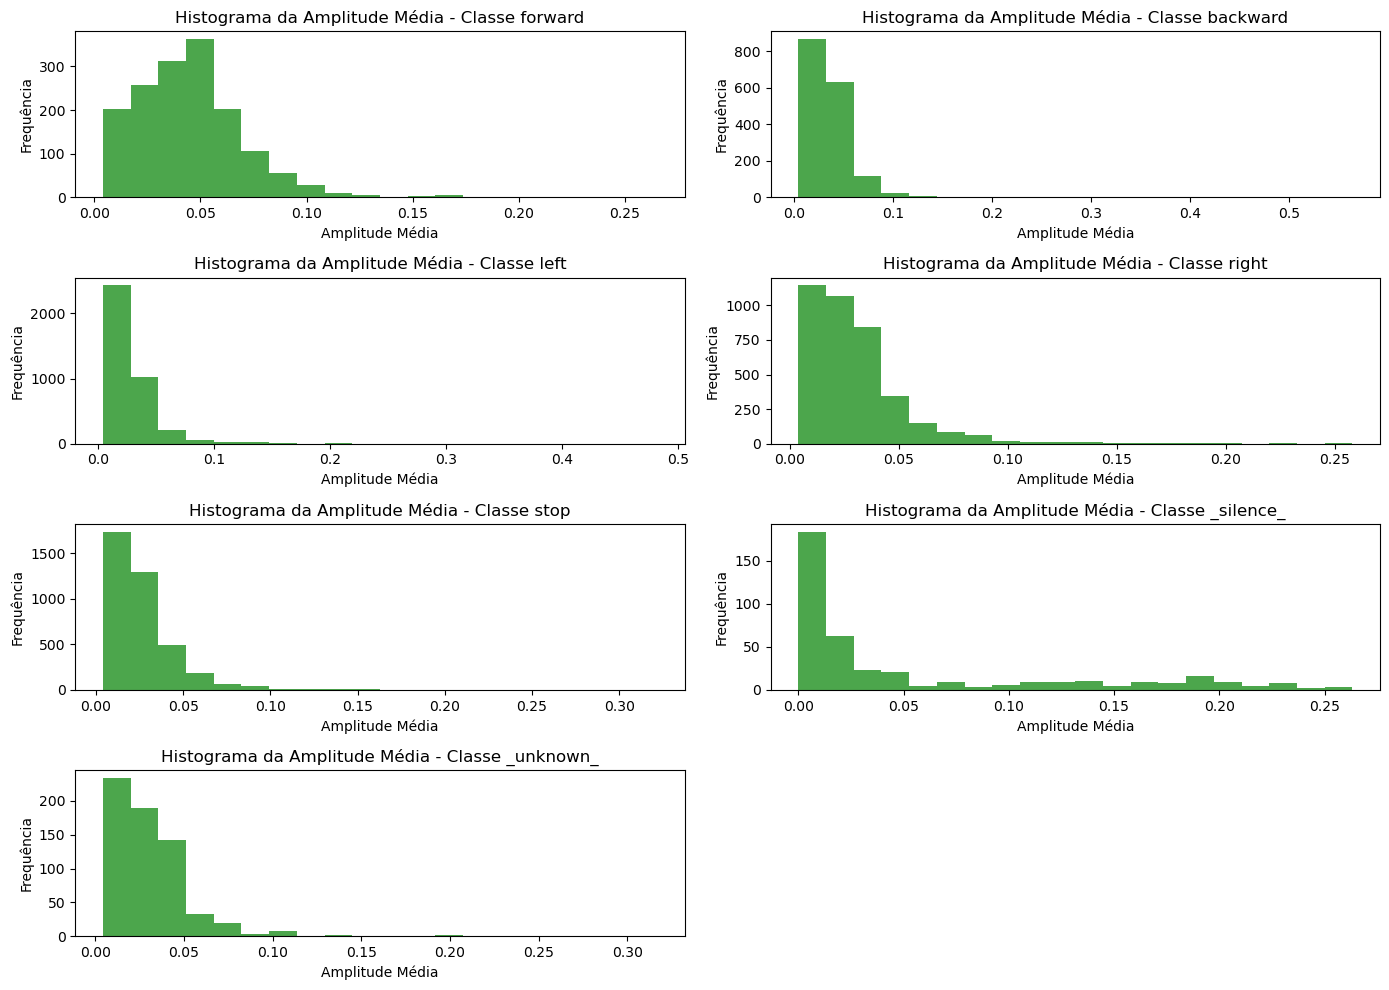

In [9]:

# Função para plotar histogramas de duração e amplitude média para cada classe (3.4.1)
def plot_histograms_for_durations_and_amplitudes(dataset_path, classes):
    """
    Plota histogramas de duração e amplitude média para cada classe no dataset.

    Parâmetros:
    dataset_path (str): Caminho para a pasta do dataset.
    classes (list): Lista de classes a serem analisadas.
    """
    # Plotar histogramas para as durações
    plt.figure(figsize=(14, 10))
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        
        # Calcular as durações com a função já definida
        durations = get_sound_durations(class_path)  # Usando a função do ponto 3.1
        
        # Plotar o histograma para a duração
        plt.subplot(4, 2, i+1)
        plt.hist(durations, bins=20, color='blue', alpha=0.7)
        plt.title(f'Histograma da Duração - Classe {class_name}')
        plt.xlabel('Duração (segundos)')
        plt.ylabel('Frequência')
    
    plt.tight_layout()
    plt.show()

    # Plotar histogramas para as amplitudes médias
    plt.figure(figsize=(14, 10))
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        
        # Calcular as amplitudes médias com a função já definida
        amplitudes = get_avg_envelope_amplitude(class_path)  # Usando a função do ponto 3.2
        
        # Plotar o histograma para a amplitude média
        plt.subplot(4, 2, i+1)
        plt.hist(amplitudes, bins=20, color='green', alpha=0.7)
        plt.title(f'Histograma da Amplitude Média - Classe {class_name}')
        plt.xlabel('Amplitude Média')
        plt.ylabel('Frequência')
    
    plt.tight_layout()
    plt.show()

# Gerar histogramas de durações e amplitudes médias para cada classe
plot_histograms_for_durations_and_amplitudes(dataset_path, classes)


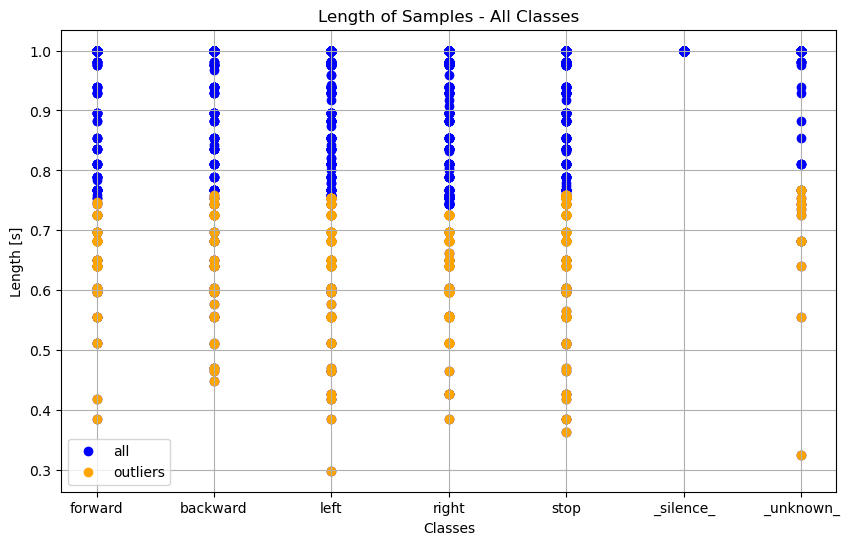

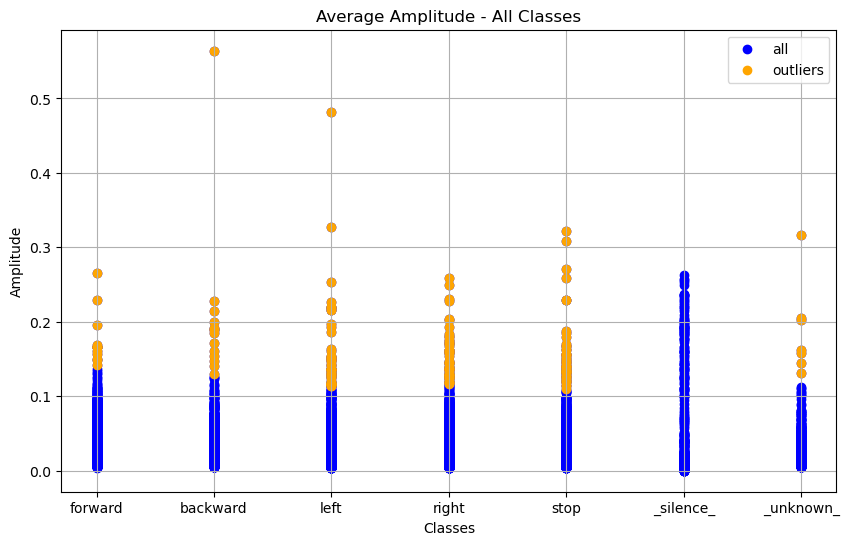

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Função para plotar scatter plots com outliers destacados para todas as classes no mesmo gráfico
def plot_scatter_with_outliers_together(dataset_path, classes, method='zscore', **kwargs):
    """
    Plota dois scatter plots: um para as durações e outro para as amplitudes médias,
    destacando os outliers para cada classe, com todas as classes no mesmo gráfico.

    Parâmetros:
    dataset_path (str): Caminho para a pasta do dataset.
    classes (list): Lista de classes a serem analisadas.
    method (str): Método para detectar outliers ('zscore' ou 'iqr').
    **kwargs: Parâmetros adicionais necessários para o método escolhido (ex: valor de k no zscore).
    """
    # ----- Primeiro gráfico: Durações -----
    all_durations = []  # Armazenará todas as durações
    all_classes = []  # Armazenará os rótulos das classes correspondentes
    outliers_durations = []  # Armazenará os outliers das durações
    outliers_classes = []  # Armazenará as classes dos outliers de durações

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        
        # Calcular as durações usando a função já definida
        durations = get_sound_durations(class_path)
        
        # Detectar os outliers de duração
        _, outliers_idx_duration = detect_outliers(np.array(durations), method=method, **kwargs)
        
        # Adicionar as durações e classes ao array geral
        all_durations.extend(durations)
        all_classes.extend([class_name] * len(durations))
        
        # Adicionar os outliers e suas classes ao array
        outliers_durations.extend(np.array(durations)[outliers_idx_duration])
        outliers_classes.extend([class_name] * len(outliers_idx_duration))
    
    # Plotar as durações normais e os outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(all_classes, all_durations, label='all', color='blue')
    plt.scatter(outliers_classes, outliers_durations, label='outliers', color='orange')
    
    plt.title('Length of Samples - All Classes')
    plt.ylabel('Length [s]')
    plt.xlabel('Classes')
    plt.legend(['all', 'outliers'])
    plt.grid(True)
    plt.show()

    # ----- Segundo gráfico: Amplitudes Médias -----
    all_avg_amplitudes = []  # Armazenará todas as amplitudes médias
    outliers_avg_amplitudes = []  # Armazenará os outliers das amplitudes
    outliers_classes_amplitude = []  # Armazenará as classes dos outliers de amplitude
    all_classes_amplitude = []  # Armazenará as classes para os dados de amplitude

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        
        # Calcular as amplitudes médias usando a função já definida
        avg_amplitudes = get_avg_envelope_amplitude(class_path)
        
        # Detectar os outliers de amplitude
        _, outliers_idx_amplitude = detect_outliers(np.array(avg_amplitudes), method=method, **kwargs)
        
        # Adicionar as amplitudes e classes ao array geral
        all_avg_amplitudes.extend(avg_amplitudes)
        all_classes_amplitude.extend([class_name] * len(avg_amplitudes))
        
        # Adicionar os outliers e suas classes ao array
        outliers_avg_amplitudes.extend(np.array(avg_amplitudes)[outliers_idx_amplitude])
        outliers_classes_amplitude.extend([class_name] * len(outliers_idx_amplitude))
    
    # Plotar as amplitudes médias normais e os outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(all_classes_amplitude, all_avg_amplitudes, label='all', color='blue')
    plt.scatter(outliers_classes_amplitude, outliers_avg_amplitudes, label='outliers', color='orange')
    
    plt.title('Average Amplitude - All Classes')
    plt.ylabel('Amplitude')
    plt.xlabel('Classes')
    plt.legend(['all', 'outliers'])
    plt.grid(True)
    plt.show()

#Exemplo de chamada da função
class_path = '/Users/josecunha/Documents/Mestrado/Tópicos de Ciencia de dados/tps/tp1/dataset (1)'
classes = ['forward', 'backward', 'left', 'right', 'stop', '_silence_', '_unknown_']
plot_scatter_with_outliers_together(dataset_path, classes, method='zscore', k=3.5)


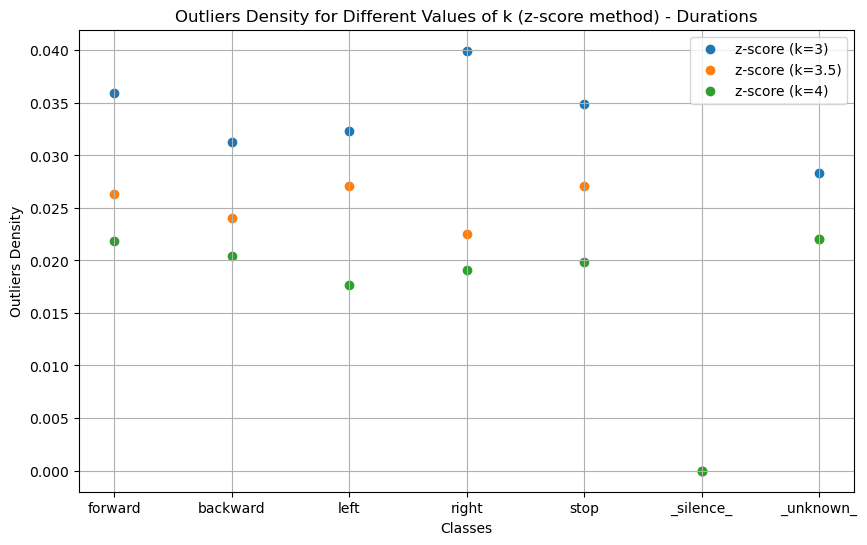

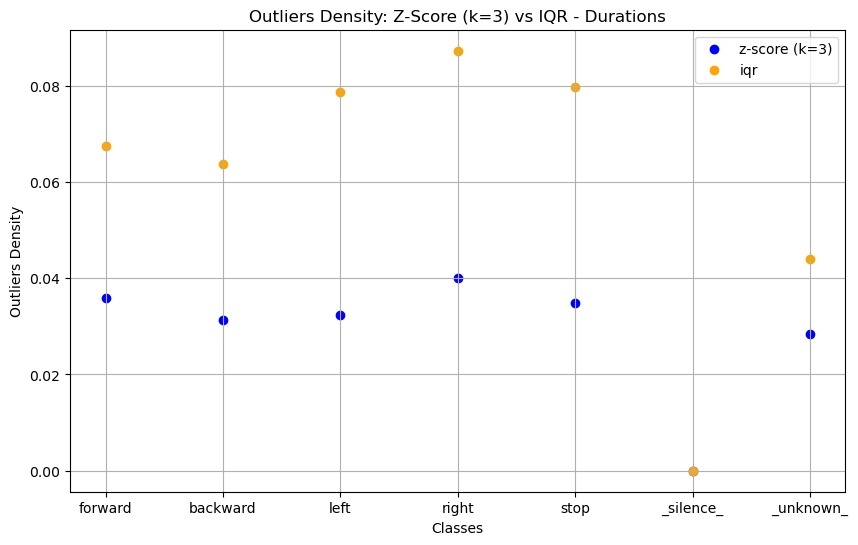

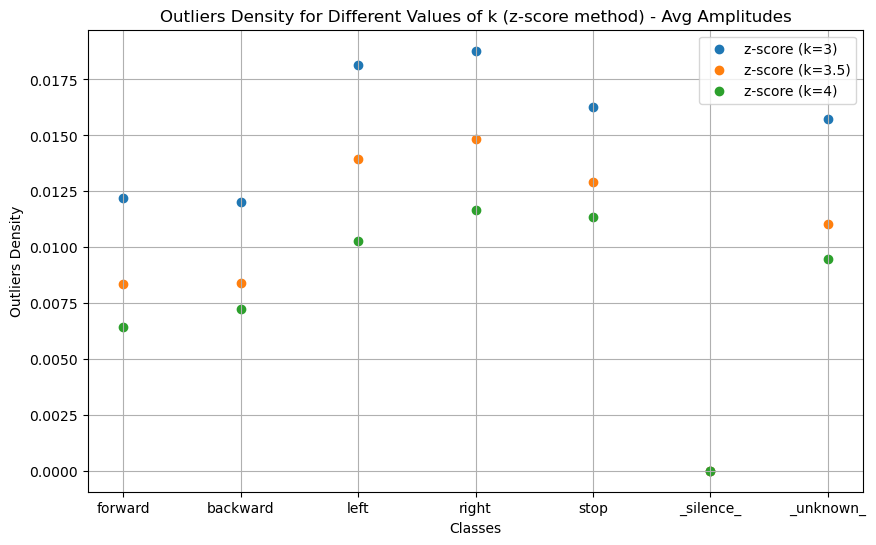

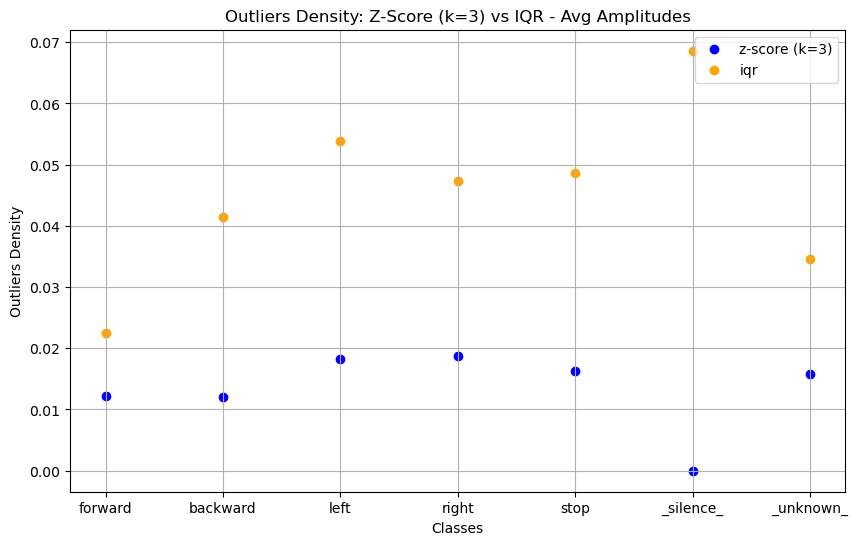

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Função para visualizar e comparar a densidade dos outliers usando diferentes valores de k no z-score e IQR
def compare_outliers_density(dataset_path, classes):
    """
    Compara a densidade de outliers entre diferentes valores de k no método z-score
    e o método IQR, e plota os resultados.

    Parâmetros:
    dataset_path (str): Caminho para a pasta do dataset.
    classes (list): Lista de classes a serem analisadas.
    """
    zscore_ks = [3, 3.5, 4]  # Valores de k a serem usados no método z-score
    methods = ['zscore', 'iqr']
    
    # Dicionário para armazenar a densidade de outliers por classe e método
    outliers_density_duration = {method: {k: [] for k in zscore_ks} for method in methods}
    outliers_density_amplitude = {method: {k: [] for k in zscore_ks} for method in methods}
    
    # Loop sobre as classes
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        
        # Calcular as durações e amplitudes médias usando as funções já definidas
        durations = get_sound_durations(class_path)
        avg_amplitudes = get_avg_envelope_amplitude(class_path)
        
        # ---- Z-Score Method with different k values ----
        for k in zscore_ks:
            # Para durações
            _, outliers_idx_zscore_duration = detect_outliers(np.array(durations), method='zscore', k=k)
            density_zscore_duration = len(outliers_idx_zscore_duration) / len(durations)  # Densidade de outliers
            outliers_density_duration['zscore'][k].append(density_zscore_duration)
            
            # Para amplitudes médias
            _, outliers_idx_zscore_amplitude = detect_outliers(np.array(avg_amplitudes), method='zscore', k=k)
            density_zscore_amplitude = len(outliers_idx_zscore_amplitude) / len(avg_amplitudes)  # Densidade de outliers
            outliers_density_amplitude['zscore'][k].append(density_zscore_amplitude)
        
        # ---- IQR Method ----
        # Para durações
        _, outliers_idx_iqr_duration = detect_outliers(np.array(durations), method='iqr')
        density_iqr_duration = len(outliers_idx_iqr_duration) / len(durations)  # Densidade de outliers
        outliers_density_duration['iqr'][zscore_ks[0]].append(density_iqr_duration)  # Usa o primeiro valor de k como chave
        
        # Para amplitudes médias
        _, outliers_idx_iqr_amplitude = detect_outliers(np.array(avg_amplitudes), method='iqr')
        density_iqr_amplitude = len(outliers_idx_iqr_amplitude) / len(avg_amplitudes)  # Densidade de outliers
        outliers_density_amplitude['iqr'][zscore_ks[0]].append(density_iqr_amplitude)  # Usa o primeiro valor de k como chave
    
    # ---- Plotando os resultados ----
    
    # 1. Plot para diferentes valores de k no método Z-Score (durações)
    plt.figure(figsize=(10, 6))
    for k in zscore_ks:
        plt.scatter(classes, outliers_density_duration['zscore'][k], marker='o', label=f'z-score (k={k})')
    
    plt.title('Outliers Density for Different Values of k (z-score method) - Durations')
    plt.xlabel('Classes')
    plt.ylabel('Outliers Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 2. Comparação entre Z-Score e IQR (durações)
    plt.figure(figsize=(10, 6))
    plt.scatter(classes, outliers_density_duration['zscore'][3], marker='o', label='z-score (k=3)', color='blue')
    plt.scatter(classes, outliers_density_duration['iqr'][3], marker='o', label='iqr', color='orange')
    
    plt.title('Outliers Density: Z-Score (k=3) vs IQR - Durations')
    plt.xlabel('Classes')
    plt.ylabel('Outliers Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 3. Plot para diferentes valores de k no método Z-Score (amplitudes médias)
    plt.figure(figsize=(10, 6))
    for k in zscore_ks:
        plt.scatter(classes, outliers_density_amplitude['zscore'][k], marker='o', label=f'z-score (k={k})')
    
    plt.title('Outliers Density for Different Values of k (z-score method) - Avg Amplitudes')
    plt.xlabel('Classes')
    plt.ylabel('Outliers Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # 4. Comparação entre Z-Score e IQR (amplitudes médias)
    plt.figure(figsize=(10, 6))
    plt.scatter(classes, outliers_density_amplitude['zscore'][3], marker='o', label='z-score (k=3)', color='blue')
    plt.scatter(classes, outliers_density_amplitude['iqr'][3], marker='o', label='iqr', color='orange')
    
    plt.title('Outliers Density: Z-Score (k=3) vs IQR - Avg Amplitudes')
    plt.xlabel('Classes')
    plt.ylabel('Outliers Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de chamada da função

compare_outliers_density(dataset_path, classes)

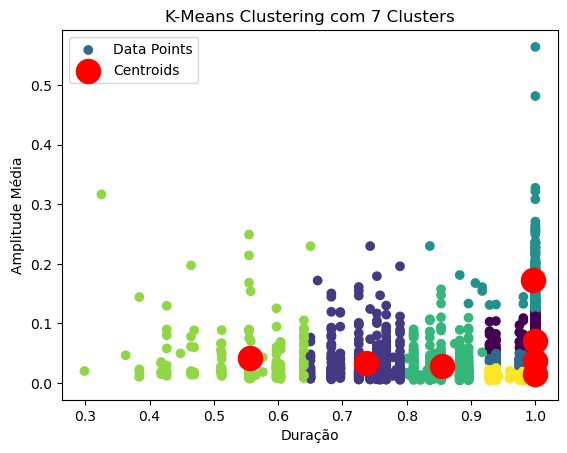

In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import os

# Função para aplicar K-Means e visualizar os clusters
def apply_kmeans_and_plot(all_durations, all_avg_amplitudes, n_clusters):
    # Combinar as durações e amplitudes médias numa matriz para aplicar o K-Means
    data = np.column_stack((all_durations, all_avg_amplitudes))
    
    # Aplicar o K-Means com o número de clusters especificado
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_

    # Visualização dos clusters
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
    plt.xlabel('Duração')
    plt.ylabel('Amplitude Média')
    plt.title(f'K-Means Clustering com {n_clusters} Clusters')
    plt.legend()
    plt.show()

# Variáveis para armazenar todas as durações e amplitudes médias
all_durations = []  # Armazenará todas as durações
all_avg_amplitudes = []  # Armazenará todas as amplitudes médias

# Para cada classe no dataset, calcular as durações e amplitudes médias
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    
    # Calcular as durações usando a função já definida
    durations = get_sound_durations(class_path)  # Função definida no ponto 3.1
    all_durations.extend(durations)
    
    # Calcular as amplitudes médias usando a função já definida
    avg_amplitudes = get_avg_envelope_amplitude(class_path)  # Função definida no ponto 3.2
    all_avg_amplitudes.extend(avg_amplitudes)

# Exemplo de uso da função com um número definido de clusters
n_clusters = 7  # Número de clusters desejado (pode ser alterado conforme necessário)
apply_kmeans_and_plot(all_durations, all_avg_amplitudes, n_clusters)


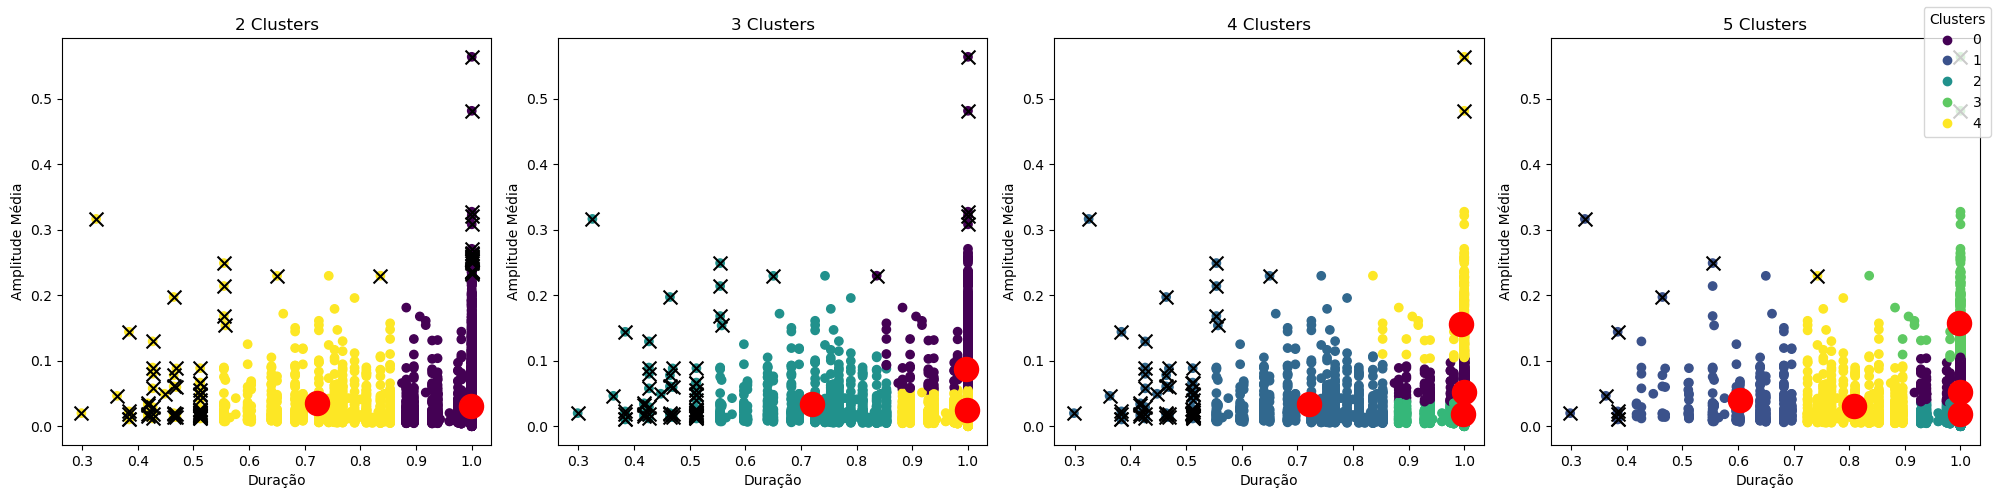

In [13]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def analyze_outliers_kmeans(data, n_clusters, threshold):
    """
    Aplica o K-Means e identifica outliers com base na distância ao centroide.
    
    :param data: numpy array de formato (n_samples, n_features), com as variáveis (duração e amplitude)
    :param n_clusters: número de clusters a serem utilizados
    :param threshold: limiar de distância para marcar um ponto como outlier
    :return: labels, centroides e uma lista de índices de outliers
    """
    # Inicializar o modelo K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    
    # Ajustar o modelo e obter os rótulos
    labels = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_
    
    # Calcular a distância de cada ponto ao seu centroide
    distances = np.linalg.norm(data - centroids[labels], axis=1)
    
    # Identificar os outliers: pontos cuja distância ao centroide excede o limiar
    outliers_idx = np.where(distances > threshold)[0]
    
    return labels, centroids, outliers_idx

data = np.column_stack((all_durations, all_avg_amplitudes))

# Testar diferentes números de clusters
n_clusters_list = [2, 3, 4, 5]
threshold = 0.2  # Limiar para identificar outliers, ajustável conforme a distribuição dos dados

# Preparar a visualização com subplots lado a lado
fig, axes = plt.subplots(1, len(n_clusters_list), figsize=(20, 5))  # Uma linha, várias colunas

# Iterar sobre os diferentes números de clusters e plotar
for idx, n_clusters in enumerate(n_clusters_list):
    labels, centroids, outliers_idx = analyze_outliers_kmeans(data, n_clusters, threshold)
    
    # Selecionar o subplot correspondente
    ax = axes[idx]
    
    # Plot dos dados, centroides e outliers
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', label='Data Points')
    ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
    
    # Destacar os outliers no gráfico
    ax.scatter(data[outliers_idx, 0], data[outliers_idx, 1], s=100, c='black', label='Outliers', marker='x')
    
    ax.set_xlabel('Duração')
    ax.set_ylabel('Amplitude Média')
    ax.set_title(f'{n_clusters} Clusters')

# Ajustar a legenda e o layout
fig.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.tight_layout()
plt.show()


In [14]:
#3.7- Analise comparativa dos  metodos usados para a deteção de outliers
import pandas as pd

# Ajustes de visualização
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.max_colwidth', None)  # Mostrar todo o conteúdo das colunas

# Dados para a tabela
comparacao = {
    "Método": ["Z-Score", "IQR", "K-Means"],
    "Adequado Para": ["Distribuições Normais", "Distribuições Assimétricas", "Dados Complexos"],
    "Vantagens": [
        "Simples e fácil de interpretar",
        "Menos sensível a outliers extremos e robusto para distribuições assimétricas",
        "Pode lidar com distribuições complexas e multidimensionais"
    ],
    "Desvantagens": [
        "Sensível a outliers extremos e não adequado para distribuições não normais",
        "Pode não detectar outliers em distribuições simétricas",
        "Sensível à escolha de K e inicialização, requer conhecimento prévio sobre o número de clusters"
    ]
}

# Criar DataFrame
df = pd.DataFrame(comparacao)
print('3.7- Analise Comparativa dos 3 metodos(Z-Score,IQR,K-Means)')
# Exibir a tabela
display(df)


3.7- Analise Comparativa dos 3 metodos(Z-Score,IQR,K-Means)


Método               Adequado Para  \
0  Z-Score       Distribuições Normais   
1      IQR  Distribuições Assimétricas   
2  K-Means             Dados Complexos   

                                                                      Vantagens  \
0                                                Simples e fácil de interpretar   
1  Menos sensível a outliers extremos e robusto para distribuições assimétricas   
2                    Pode lidar com distribuições complexas e multidimensionais   

                                                                                     Desvantagens  
0                      Sensível a outliers extremos e não adequado para distribuições não normais  
1                                          Pode não detectar outliers em distribuições simétricas  
2  Sensível à escolha de K e inicialização, requer conhecimento prévio sobre o número de clusters

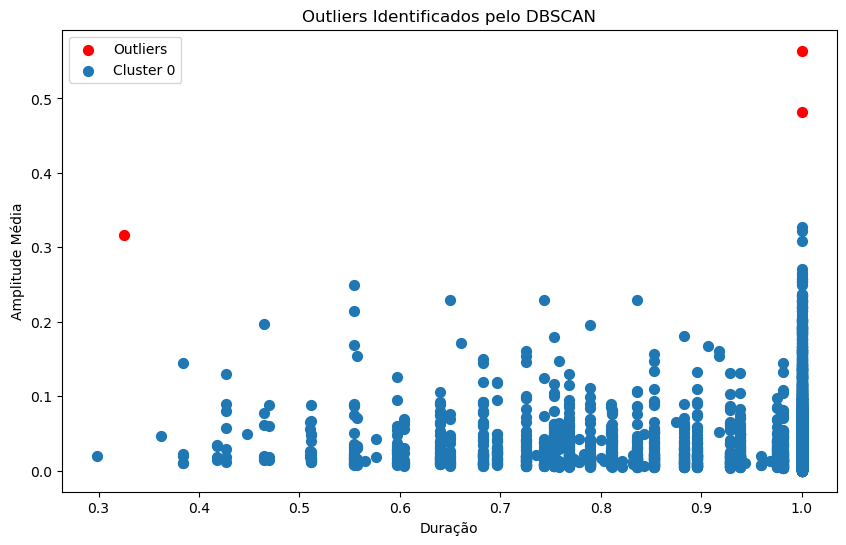

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Considerando que já temos as arrays duration_array e avg_amplitude_array:
# Combina duração e amplitude média em uma matriz de 2 colunas
#data = np.column_stack((duration_array, avg_amplitude_array))

# Parâmetros do DBSCAN
eps = 0.15  # Distância máxima para considerar pontos vizinhos
min_samples = 10  # Número mínimo de pontos para formar um cluster

# Aplicando DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(data)

# Plotando o resulta25
plt.figure(figsize=(10, 6))

# Gráfico com DBSCAN clustering
unique_labels = np.unique(labels_dbscan)
for label in unique_labels:
    if label == -1:  # -1 indica outliers no DBSCAN
        # Plotando outliers
        plt.scatter(data[labels_dbscan == label, 0], data[labels_dbscan == label, 1], 
                    c='red', s=50, label='Outliers')
    else:
        # Plotando os clusters
        plt.scatter(data[labels_dbscan == label, 0], data[labels_dbscan == label, 1], 
                    s=50, label=f'Cluster {label}')

plt.title("Outliers Identificados pelo DBSCAN")
plt.xlabel("Duração")
plt.ylabel("Amplitude Média")
plt.legend()
plt.show()


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular a envelope (2.4)
def envelope(signal, window_size):
    """
    Calcula a 'envelope' de um sinal dado, aplicando uma média móvel sobre os valores absolutos.
    
    Parâmetros:
    signal (numpy array): O sinal de áudio.
    window_size (int): O tamanho da janela de média móvel (deve ser ímpar).
    
    Retorna:
    numpy array: A envelope do sinal com o mesmo comprimento que o sinal original.
    """
    # Obter os valores absolutos do sinal
    abs_signal = np.abs(signal)
    
    # Verificar se o window_size é ímpar, se não, aumentar em 1 para garantir que seja ímpar
    if window_size % 2 == 0:
        window_size += 1

    # Aplicar a média móvel com padding nas bordas (zero-padding)
    envelope_signal = np.convolve(abs_signal, np.ones(window_size)/window_size, mode='same')
    
    return envelope_signal

def downsample_envelope(envelope, factor=100):
    """
    Faz o downsampling de um envelope com um fator especificado.
    
    Parâmetros:
    - envelope: O envelope do som.
    - factor: O fator de downsampling (mantém 1 a cada 'factor' amostras).
    
    Retorna:
    - O envelope downsampled.
    """
    return envelope[::factor]

def create_mini_dataset(classes, dataset_path, n_samples=200, downsample_factor=100, window_size=50):
    """
    Cria um mini dataset a partir das primeiras 200 músicas de cada classe.
    
    :param classes: lista de classes (neste caso, tipos de sons)
    :param dataset_path: caminho para a pasta com os dados
    :param n_samples: número de amostras a serem selecionadas por classe
    :param downsample_factor: fator de downsampling para o envelope
    :param window_size: tamanho da janela para calcular o envelope
    :return: dicionário onde a chave é o nome da classe e o valor é um array (envelopes)
    """
    mini_dataset = {}  # Dicionário para armazenar arrays por classe
    
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        
        # Listar todos os arquivos de som na classe
        sound_files = [f for f in os.listdir(class_path) if f.endswith('.wav')][:n_samples]
        
        all_envelopes = []  # Lista para armazenar todos os envelopes da classe

        for sound_file in sound_files:
            # Carregar e normalizar o som
            sample_rate, signal = load_and_normalize_sound(sound_file, class_path)

            # Verifica se o sinal é unidimensional
            if signal.ndim > 1:
                signal = signal[:, 0]  # Pega apenas o primeiro canal se o áudio for estéreo

            # Calcular o envelope do sinal
            env = envelope(signal, window_size)
            
            # Fazer o downsampling do envelope
            downsampled_envelope = downsample_envelope(env, downsample_factor)

            # Adicionar o envelope à lista
            all_envelopes.append(downsampled_envelope)

        # Concatenar todos os envelopes e armazenar apenas no primeiro elemento
        total_length = sum(len(env) for env in all_envelopes)  # Calcular o comprimento total
        combined_envelope = np.zeros(total_length)  # Criar um array de zeros com comprimento total
        
        # Preencher o primeiro elemento com todos os dados
        combined_envelope[:total_length] = np.concatenate(all_envelopes)  # Adicionar os envelopes concatenados
        
        # Armazenar o envelope combinado no mini_dataset
        mini_dataset[class_name] = combined_envelope

    return mini_dataset

# Exemplo de uso:
mini_dataset = create_mini_dataset(classes, dataset_path, n_samples=200, downsample_factor=100, window_size=50)

# Verificar as classes e os tamanhos dos arrays
for class_name, envelopes in mini_dataset.items():
    print(f"\nClasse: {class_name}, Tamanho Total do Array: {len(envelopes)}")
    print(f"Dados do Array: {envelopes[:5]}")  # Mostra os primeiros 5 valores do array



Classe: forward, Tamanho Total do Array: 31314
Dados do Array: [1.13696408e-05 1.19680429e-05 1.85504665e-05 5.38561932e-06
 2.51328902e-05]

Classe: backward, Tamanho Total do Array: 31524
Dados do Array: [4.18881503e-06 1.49600537e-05 1.13696408e-05 7.18082576e-06
 1.97472708e-05]

Classe: left, Tamanho Total do Array: 31543
Dados do Array: [2.99201073e-06 5.98402147e-06 8.37763005e-06 1.73536623e-05
 1.73536623e-05]

Classe: right, Tamanho Total do Array: 31296
Dados do Array: [1.43616515e-05 4.12897481e-05 3.41089224e-05 1.73536623e-05
 6.58242361e-06]

Classe: stop, Tamanho Total do Array: 31481
Dados do Array: [1.73536623e-05 1.25664451e-05 2.15424773e-05 3.59041288e-06
 1.37632494e-05]

Classe: _silence_, Tamanho Total do Array: 32000
Dados do Array: [0.00209979 0.00356109 0.00332891 0.00266289 0.00298842]

Classe: _unknown_, Tamanho Total do Array: 31598
Dados do Array: [0.0013099  0.00163603 0.00301774 0.00250312 0.00256116]



Classe: forward, Tamanho Total do Array: 31314
Dados do Array: [1.13696408e-05 1.19680429e-05 1.85504665e-05 5.38561932e-06
 2.51328902e-05]


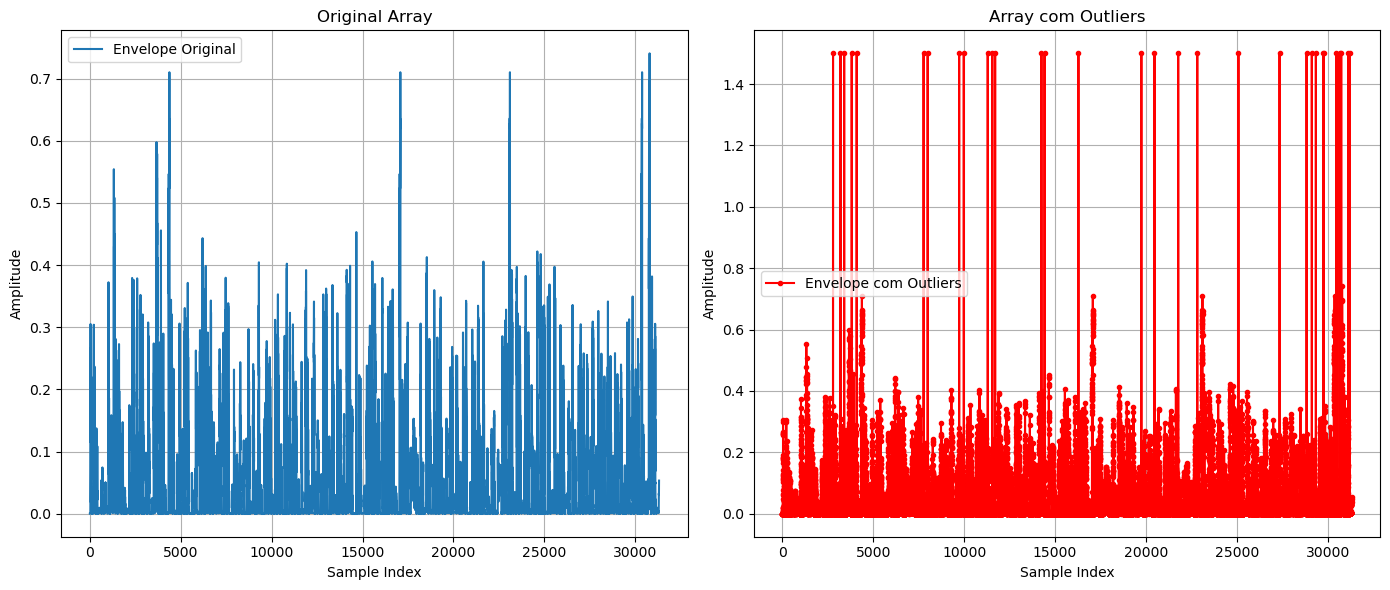


Classe: backward, Tamanho Total do Array: 31524
Dados do Array: [4.18881503e-06 1.49600537e-05 1.13696408e-05 7.18082576e-06
 1.97472708e-05]


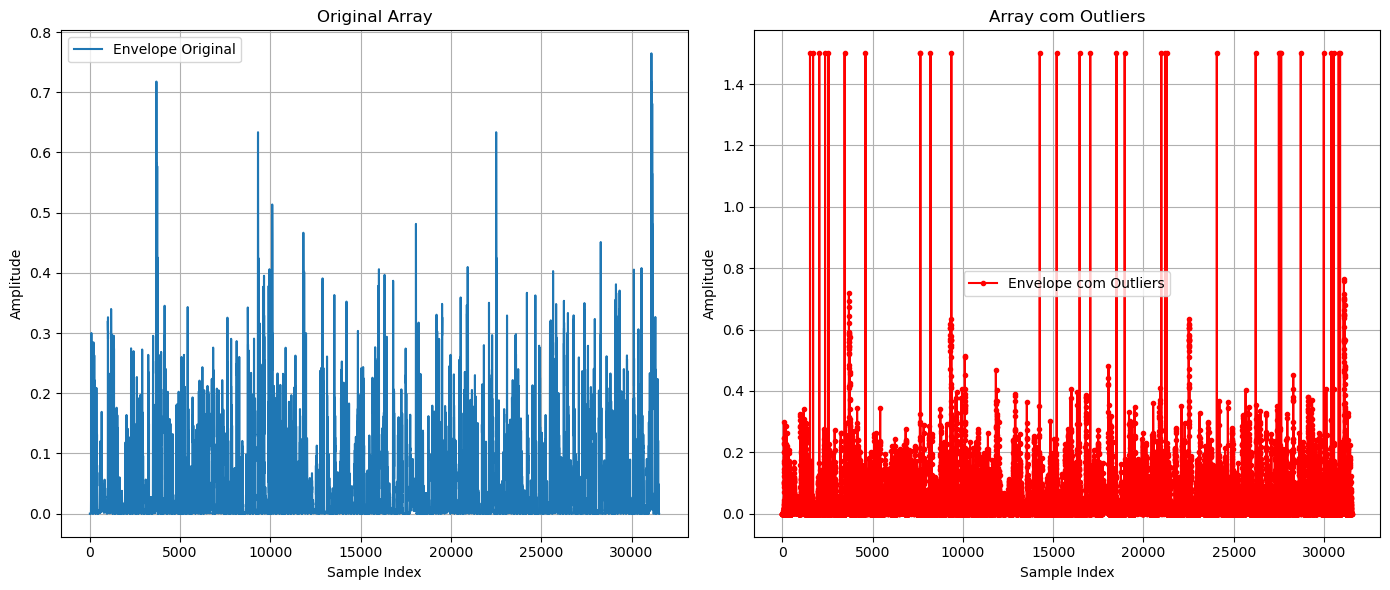


Classe: left, Tamanho Total do Array: 31543
Dados do Array: [2.99201073e-06 5.98402147e-06 8.37763005e-06 1.73536623e-05
 1.73536623e-05]


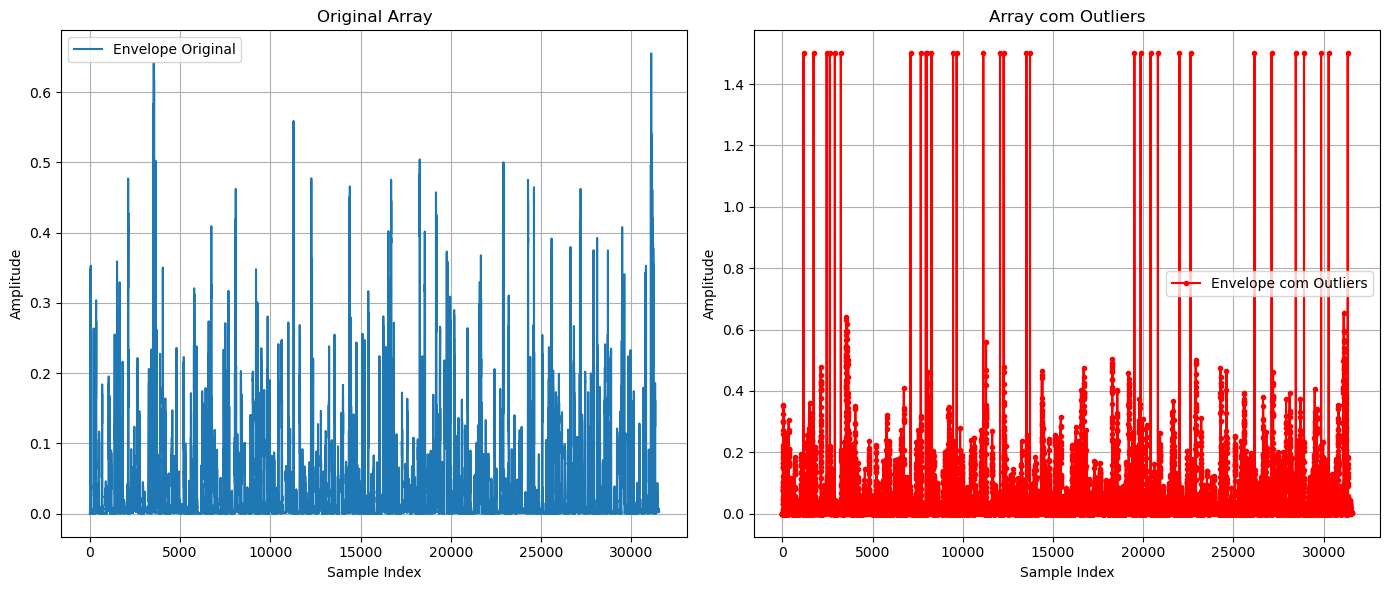


Classe: right, Tamanho Total do Array: 31296
Dados do Array: [1.43616515e-05 4.12897481e-05 3.41089224e-05 1.73536623e-05
 6.58242361e-06]


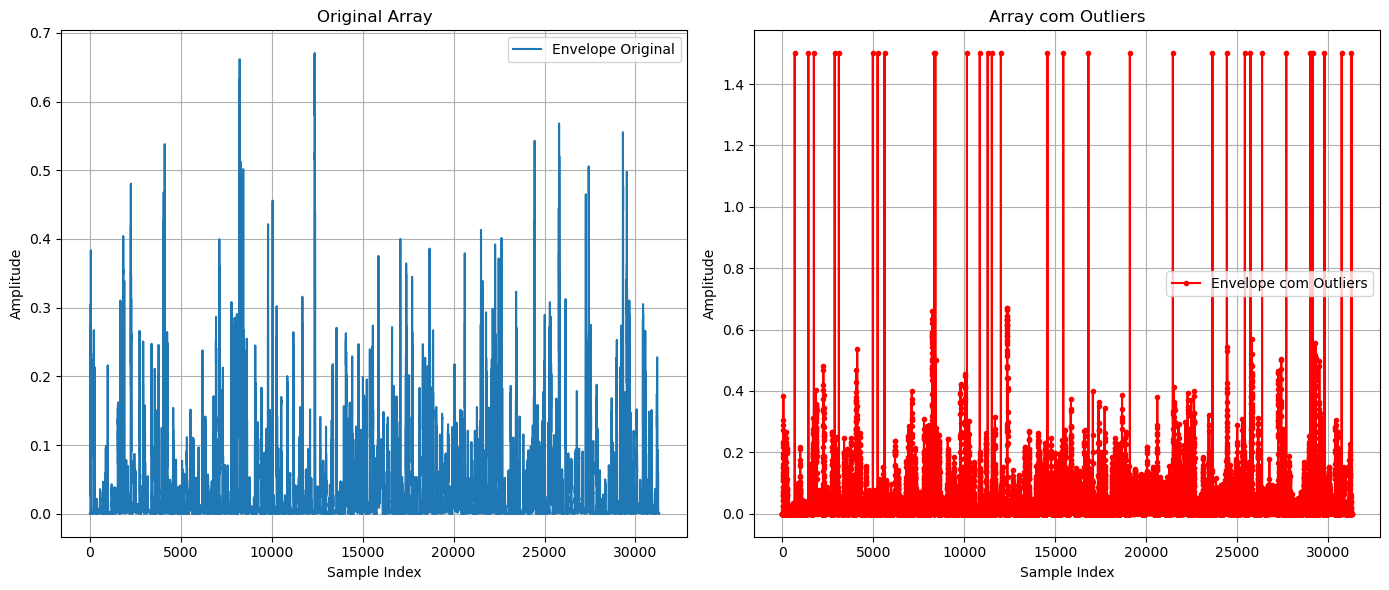


Classe: stop, Tamanho Total do Array: 31481
Dados do Array: [1.73536623e-05 1.25664451e-05 2.15424773e-05 3.59041288e-06
 1.37632494e-05]


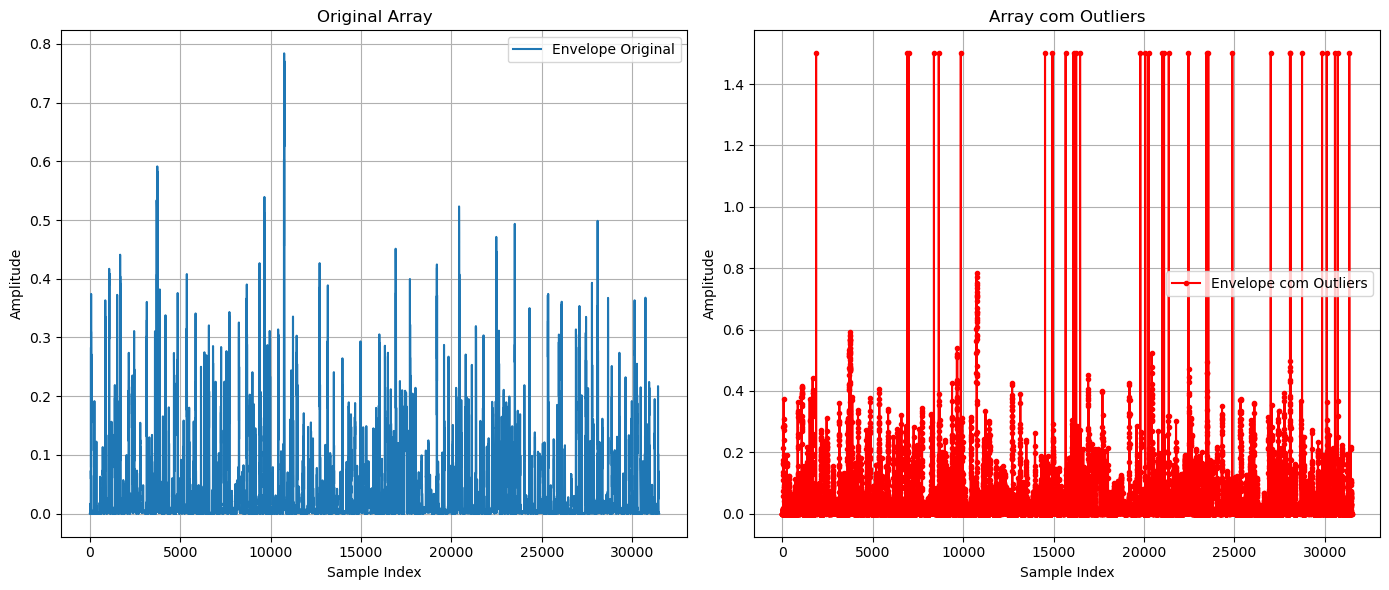


Classe: _silence_, Tamanho Total do Array: 32000
Dados do Array: [0.00209979 0.00356109 0.00332891 0.00266289 0.00298842]


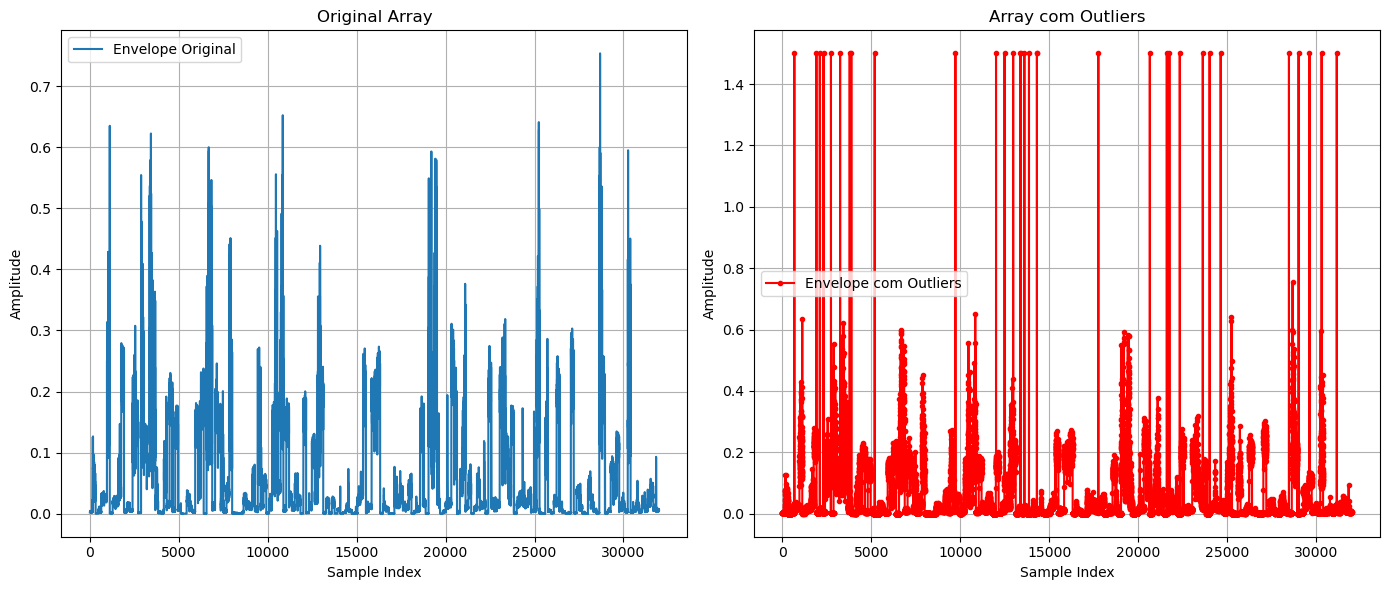


Classe: _unknown_, Tamanho Total do Array: 31598
Dados do Array: [0.0013099  0.00163603 0.00301774 0.00250312 0.00256116]


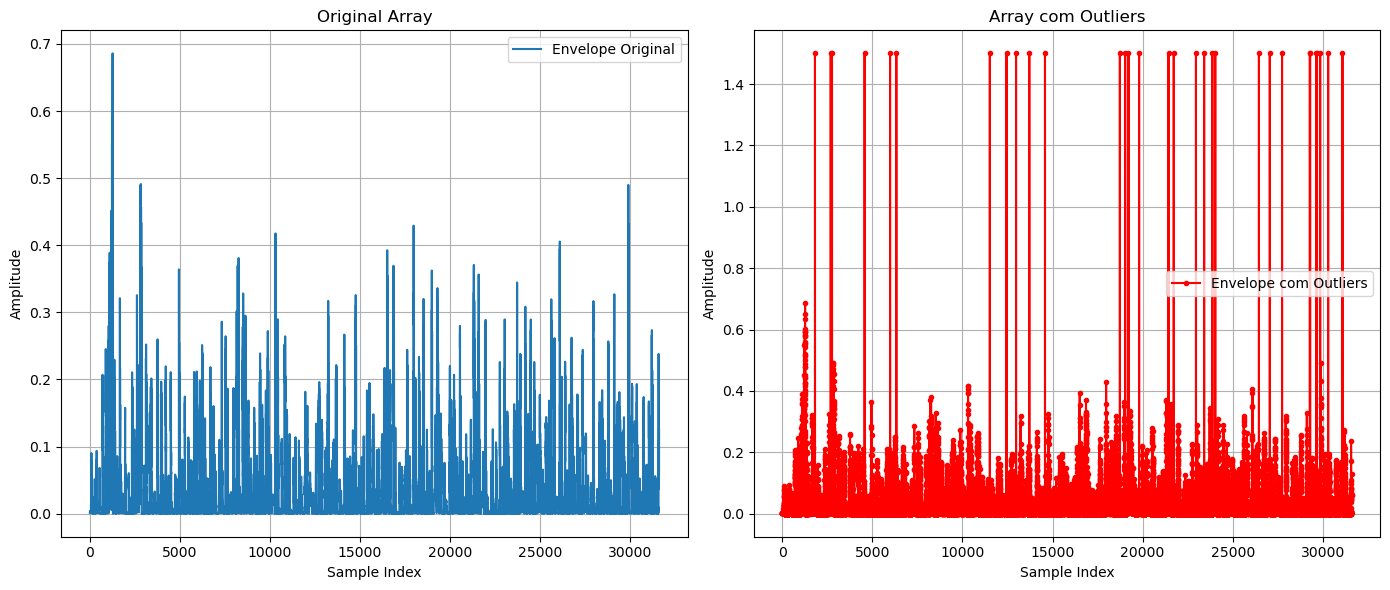

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def inject_outliers(array, percentage):
    """
    Injeta outliers no array, atualizando x% dos valores para 1.5.
    
    :param array: numpy array no qual os outliers serão injetados.
    :param percentage: percentual de outliers a serem injetados.
    :return: numpy array com outliers injetados.
    """
    n_outliers = int(len(array) * percentage)  # Número de outliers a injetar
    indices = np.random.choice(len(array), size=n_outliers, replace=False)  # Selecionar índices aleatórios
    array_with_outliers = array.copy()  # Fazer uma cópia do array original
    array_with_outliers[indices] = 1.5  # Atualizar os índices selecionados para 1.5
    return array_with_outliers

def plot_arrays(original, with_outliers):
    """
    Plota o array original e o array com outliers.
    
    :param original: numpy array original.
    :param with_outliers: numpy array com outliers.
    """
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Array')
    plt.plot(original, label='Envelope Original')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Array com Outliers')
    plt.plot(with_outliers, label='Envelope com Outliers', color='red', marker='.')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Aplicar injeção de outliers e plotar resultados
for class_name, envelopes in mini_dataset.items():
    # Injetar outliers
    envelope_with_outliers = inject_outliers(envelopes, 0.001)  # 1% de outliers

    # Mostrar resultados
    print(f"\nClasse: {class_name}, Tamanho Total do Array: {len(envelopes)}")
    print(f"Dados do Array: {envelopes[:5]}")  # Mostra os primeiros 5 valores do array

    # Plotar arrays
    plot_arrays(envelopes, envelope_with_outliers)



In [18]:
import numpy as np

def linear_model(X, Y):
    """
    Calcula os pesos beta de um modelo linear de ordem p.
    
    :param X: numpy array de tamanho (n_samples, p) com os vetores de entrada.
    :param Y: numpy array de tamanho (n_samples,) com as saídas correspondentes.
    :return: numpy array com os pesos beta.
    """
    # Adiciona uma coluna de 1s para o termo de intercepto beta_0
    n_samples = X.shape[0]
    X_design = np.hstack((np.ones((n_samples, 1)), X))  # Matriz de design

    # Calcula os pesos beta usando a fórmula dos mínimos quadrados
    beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ Y
    
    return beta

# Exemplo de uso
n_samples = 5  # Número de amostras
p = 3  # Número de características
np.random.seed(0)  # Para reprodutibilidade

# Gerar dados de exemplo
X = np.random.rand(n_samples, p)  # Amostras aleatórias
Y = np.random.rand(n_samples)  # Saídas aleatórias

# Calcular os pesos
beta_weights = linear_model(X, Y)

print("Pesos beta calculados:")
print(beta_weights)


Pesos beta calculados:
[ 0.71708438 -2.23388132  1.46238152 -0.331403  ]


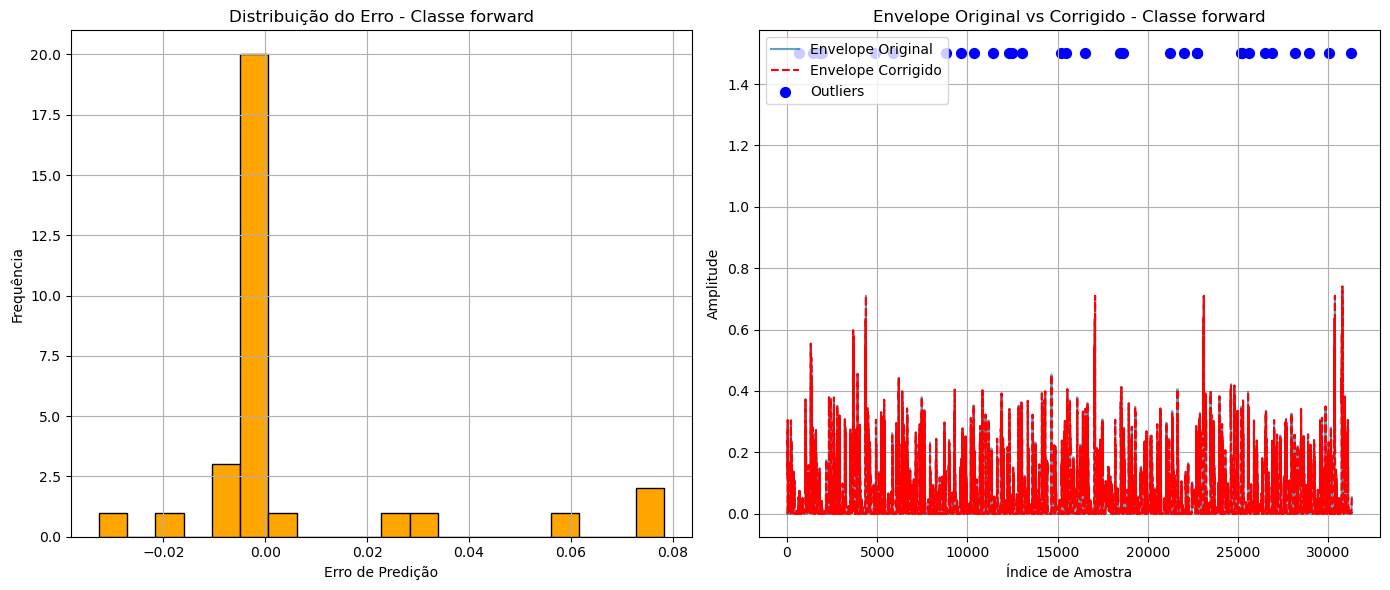

Análise feita com p = 3 para a classe forward


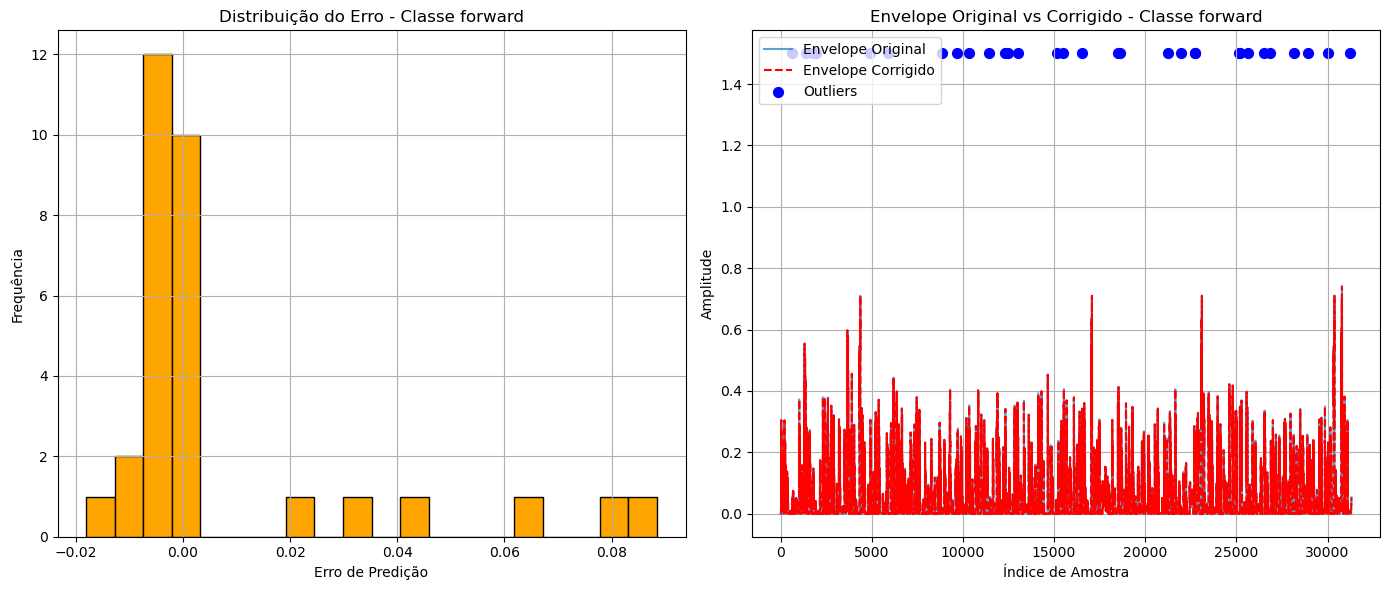

Análise feita com p = 5 para a classe forward


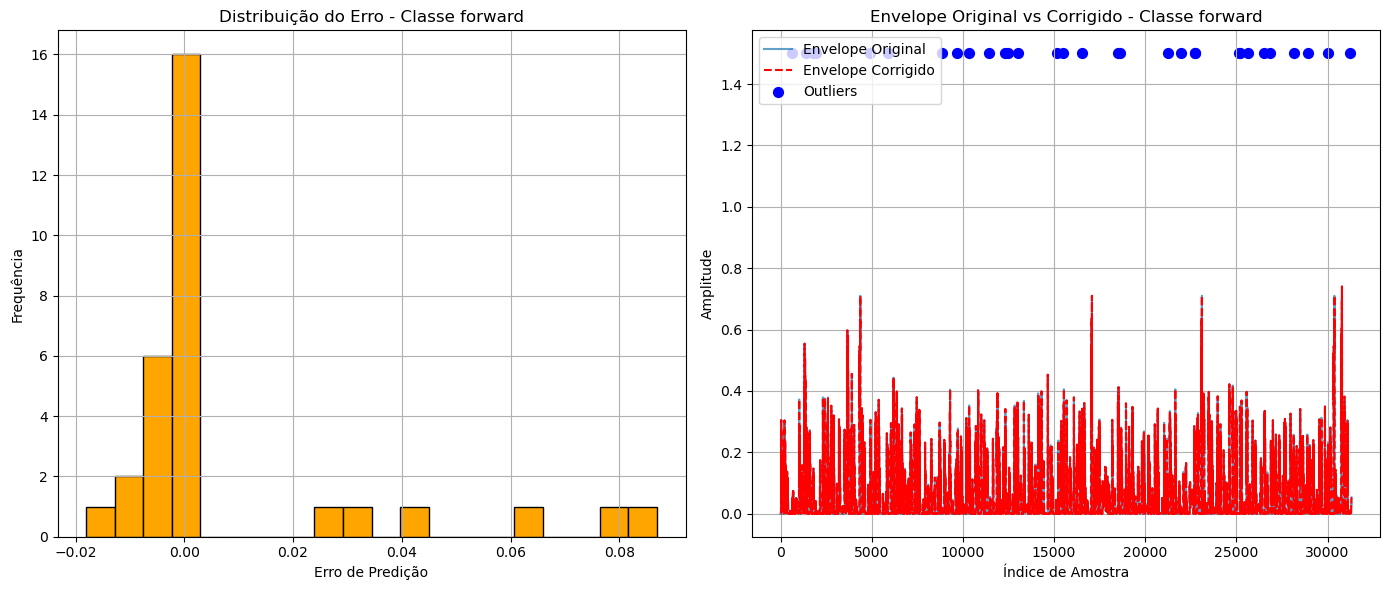

Análise feita com p = 7 para a classe forward


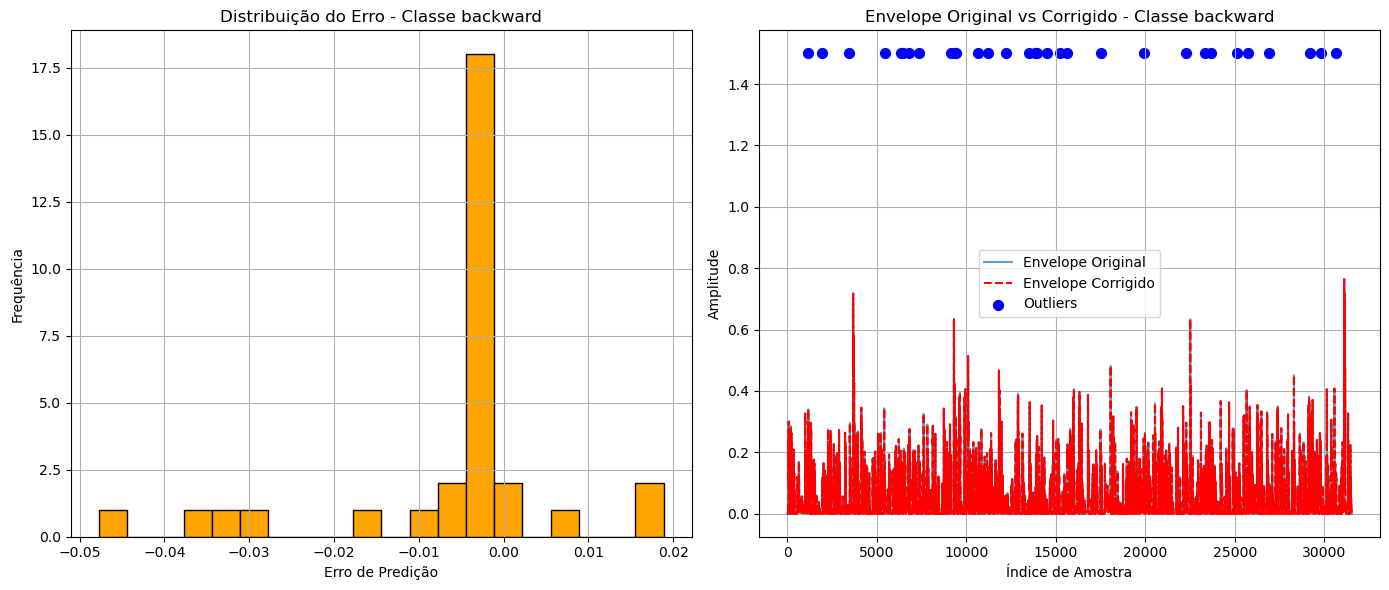

Análise feita com p = 3 para a classe backward


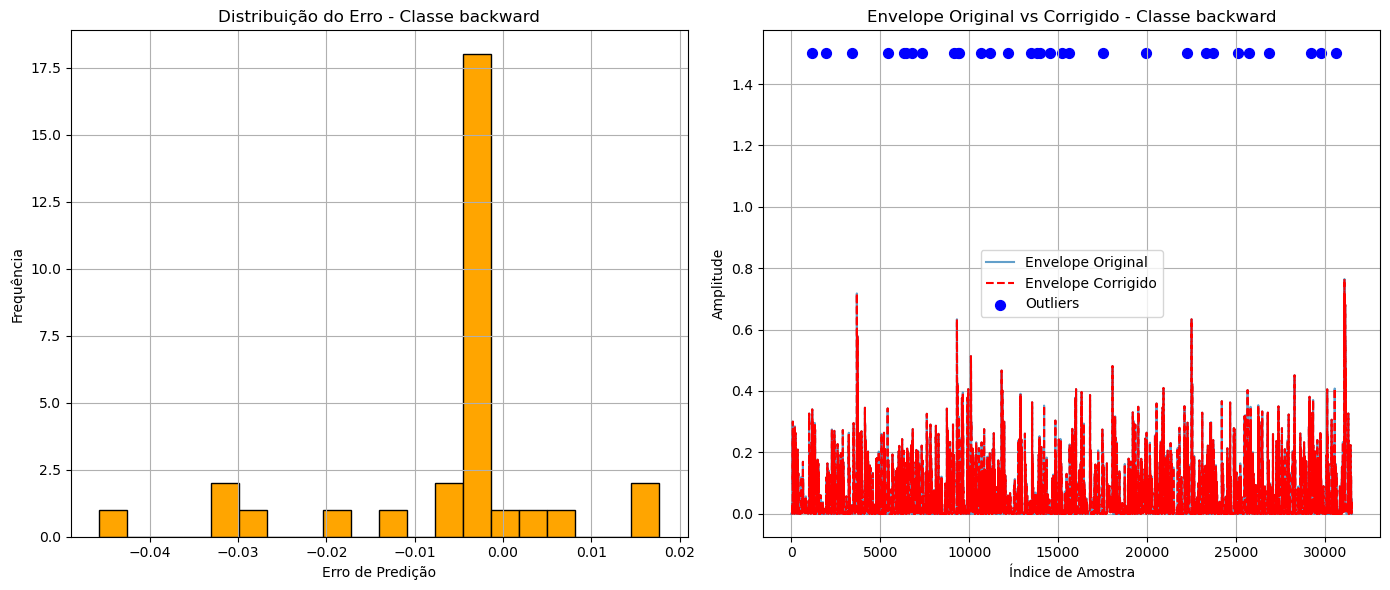

Análise feita com p = 5 para a classe backward


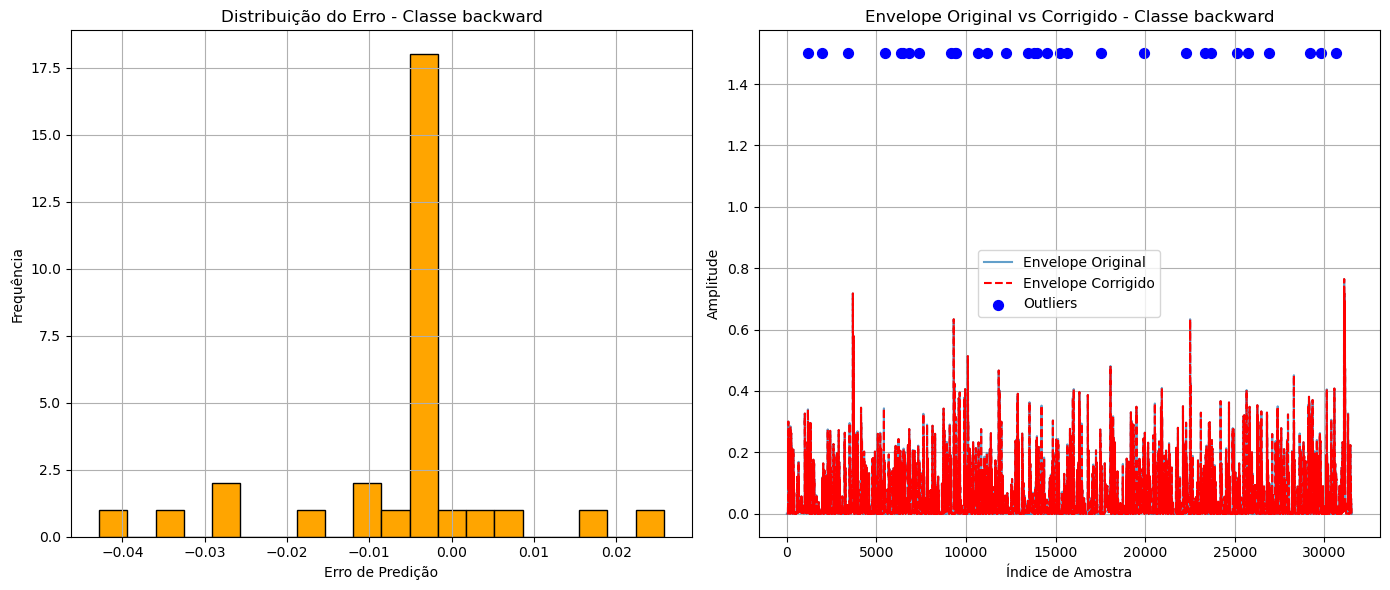

Análise feita com p = 7 para a classe backward


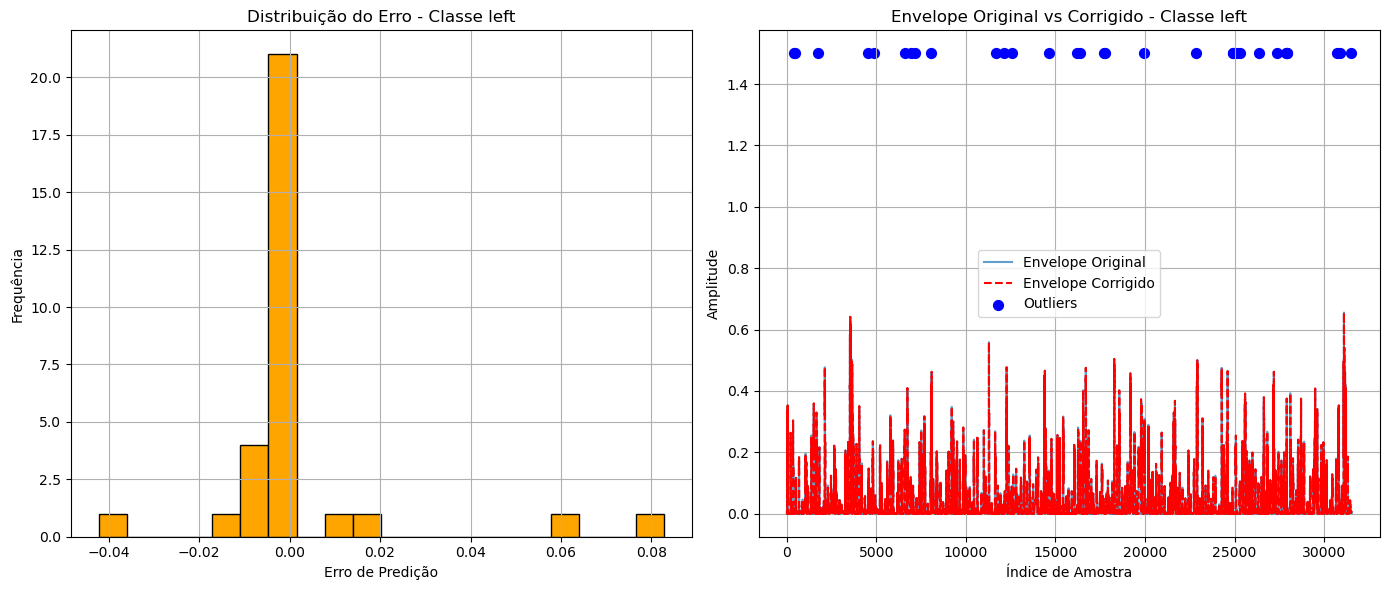

Análise feita com p = 3 para a classe left


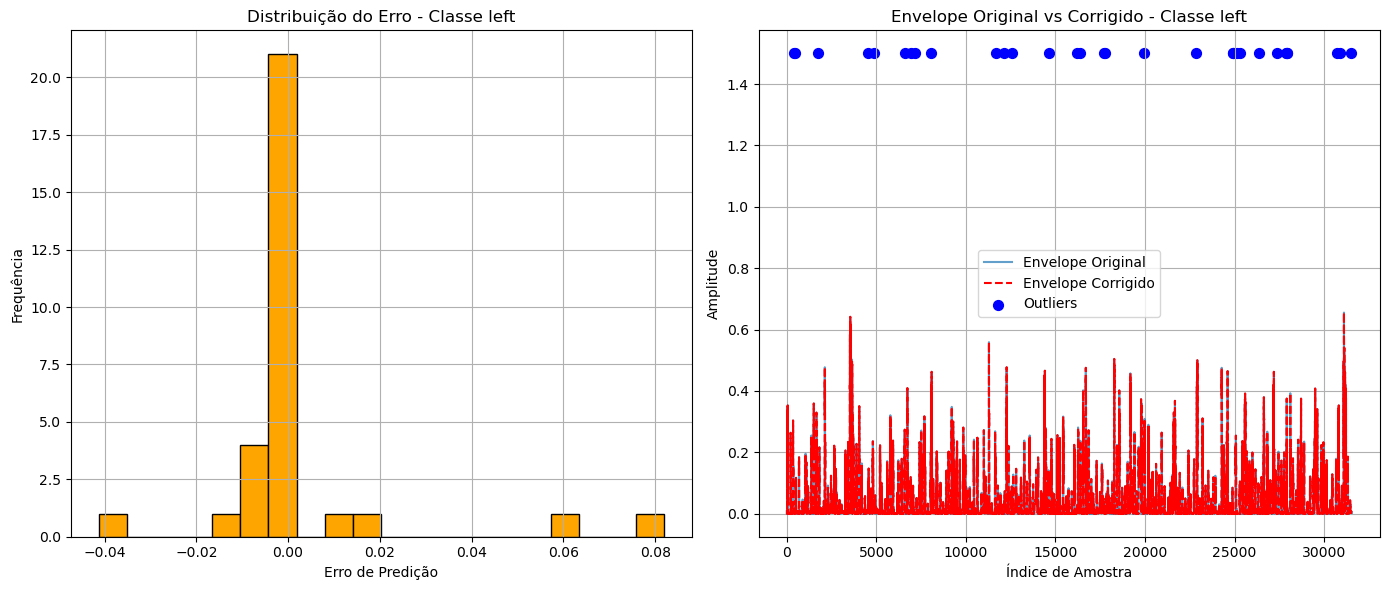

Análise feita com p = 5 para a classe left


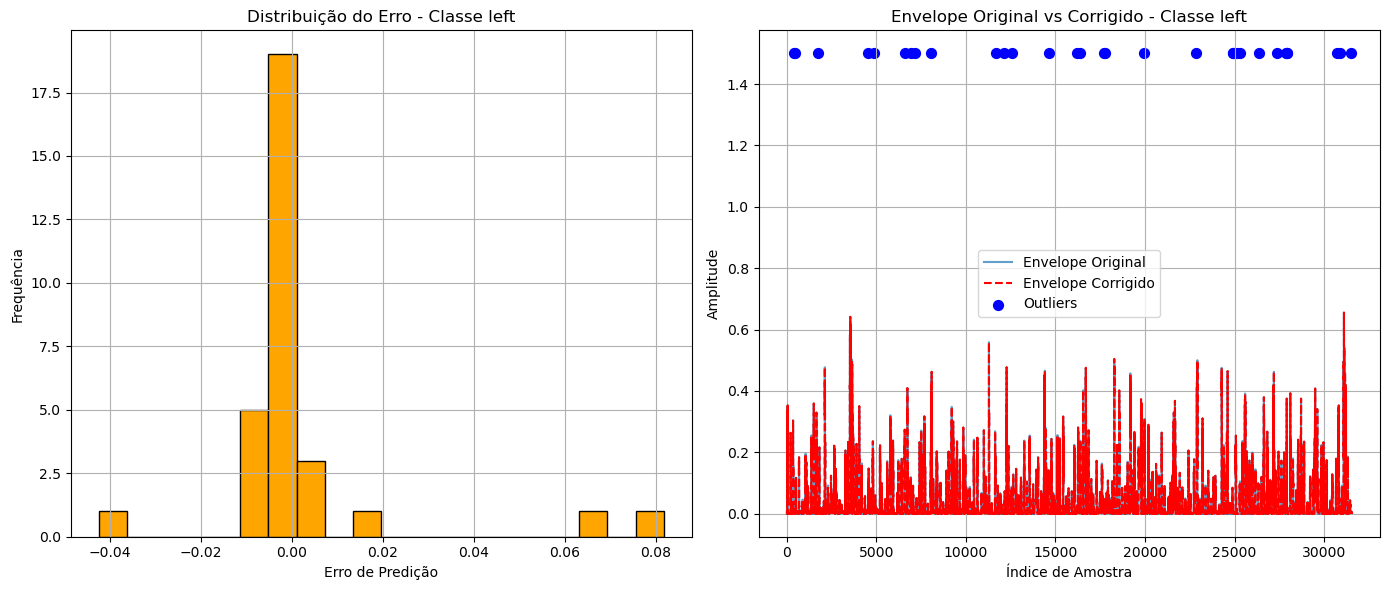

Análise feita com p = 7 para a classe left


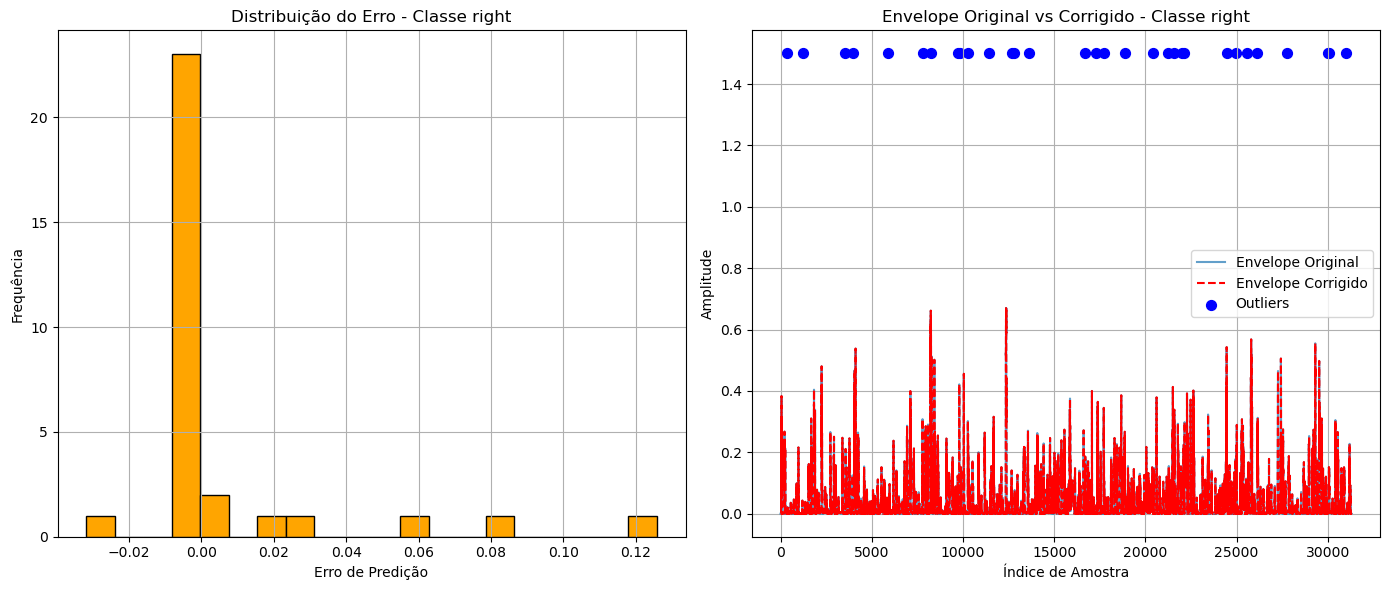

Análise feita com p = 3 para a classe right


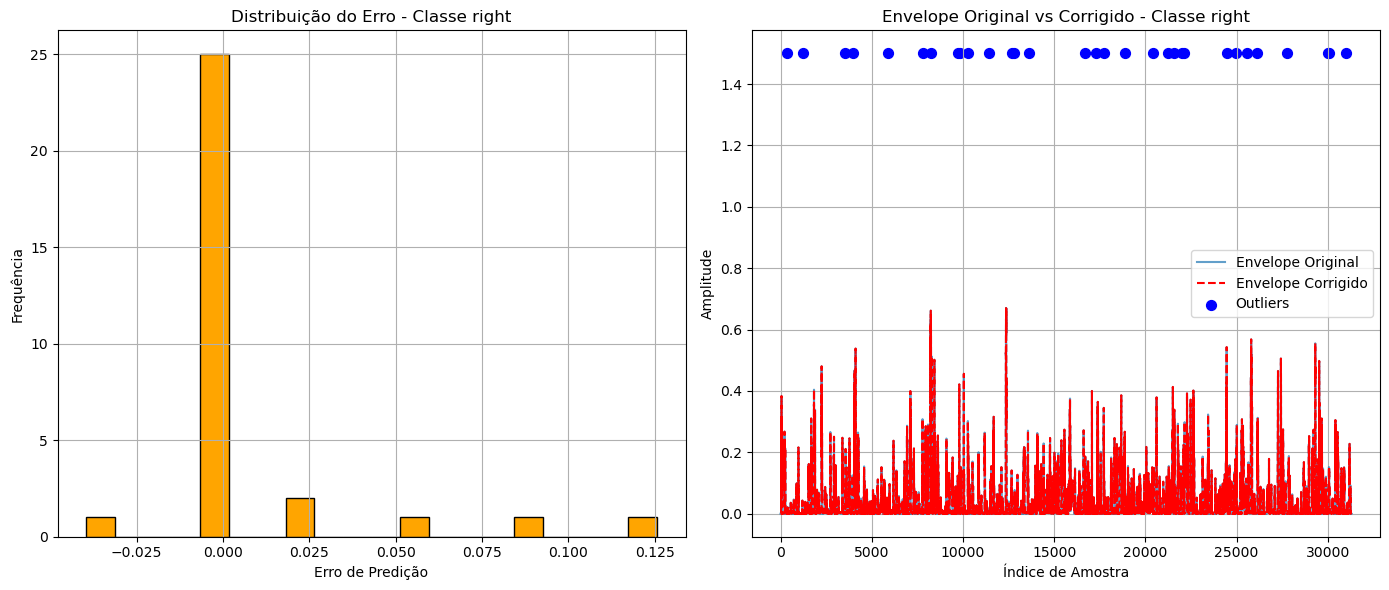

Análise feita com p = 5 para a classe right


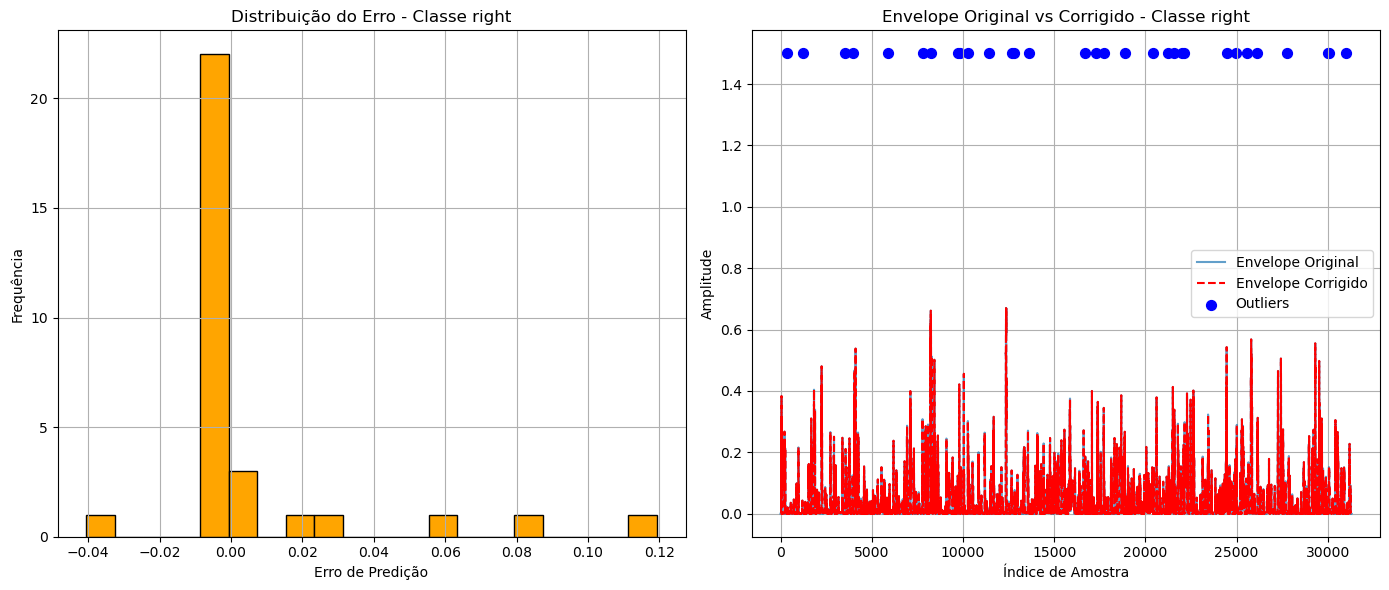

Análise feita com p = 7 para a classe right


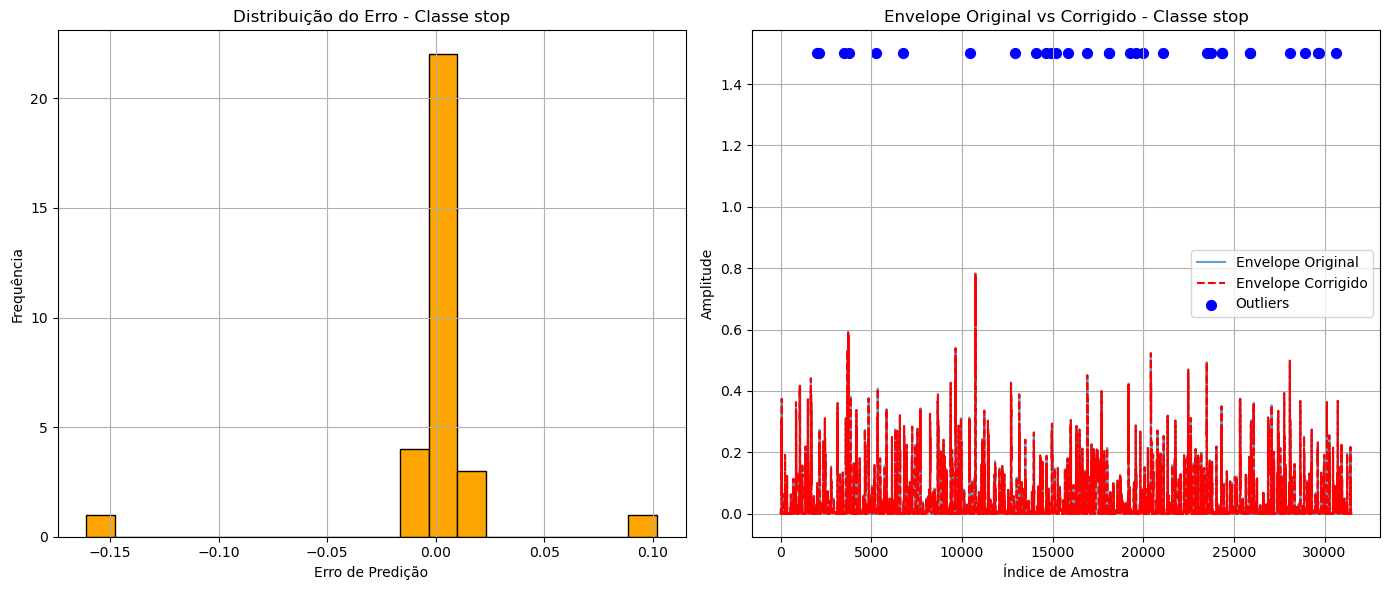

Análise feita com p = 3 para a classe stop


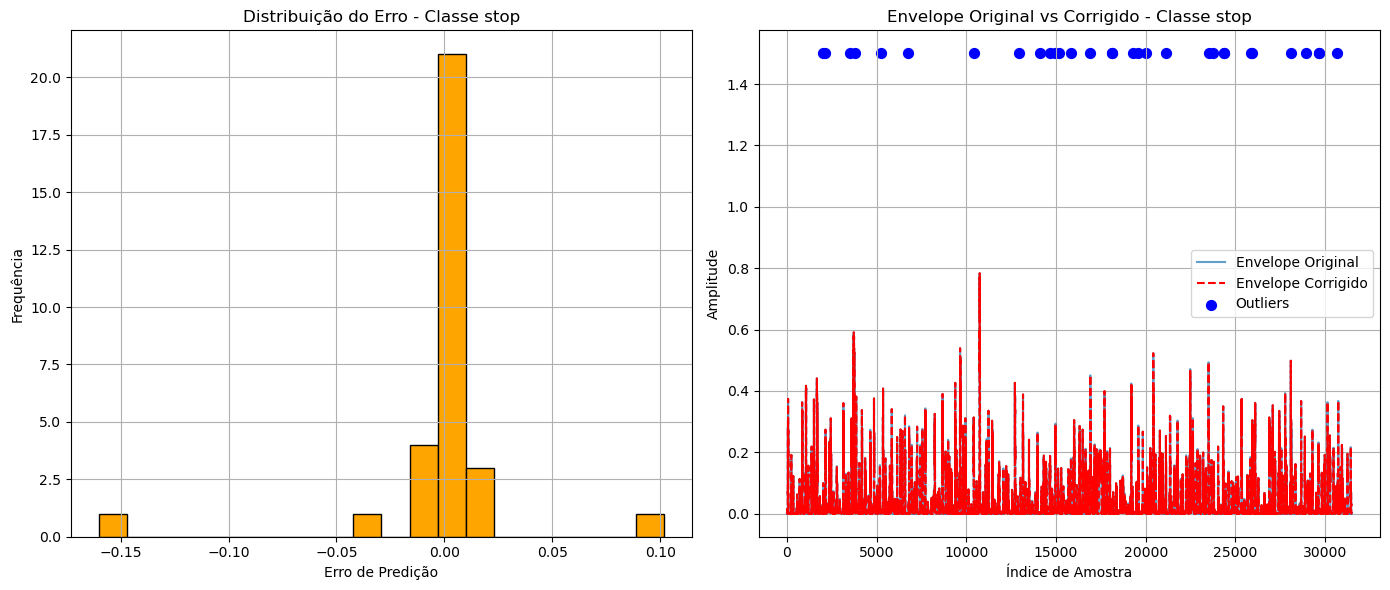

Análise feita com p = 5 para a classe stop


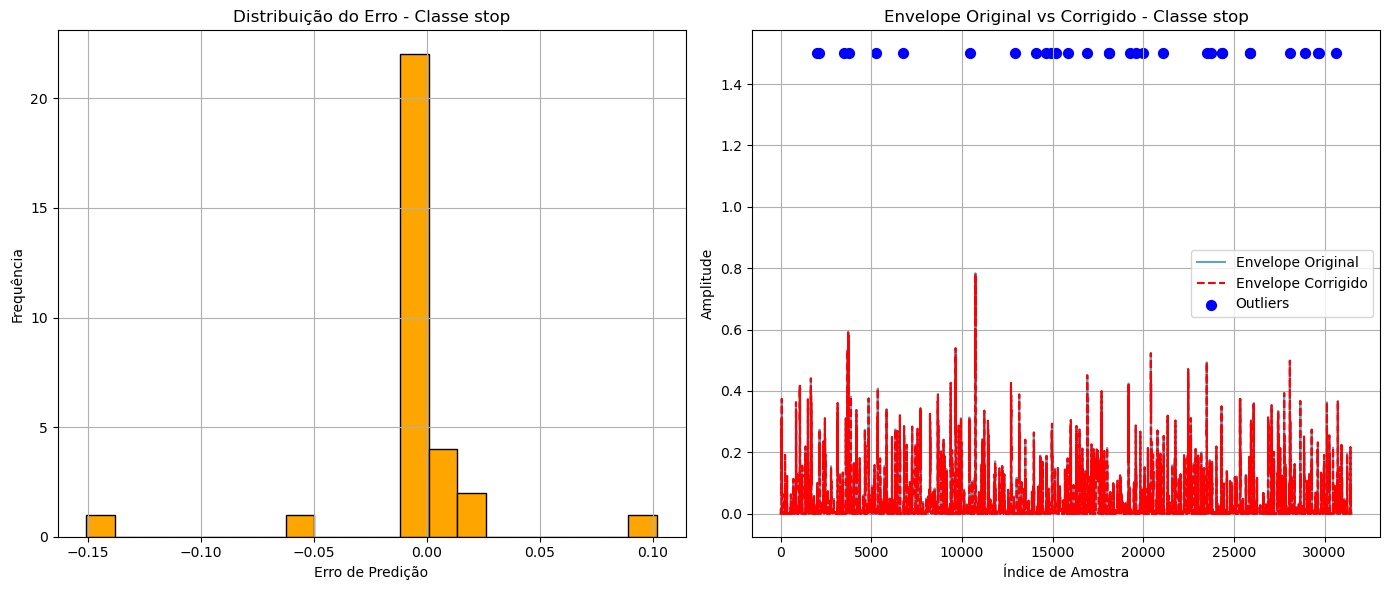

Análise feita com p = 7 para a classe stop


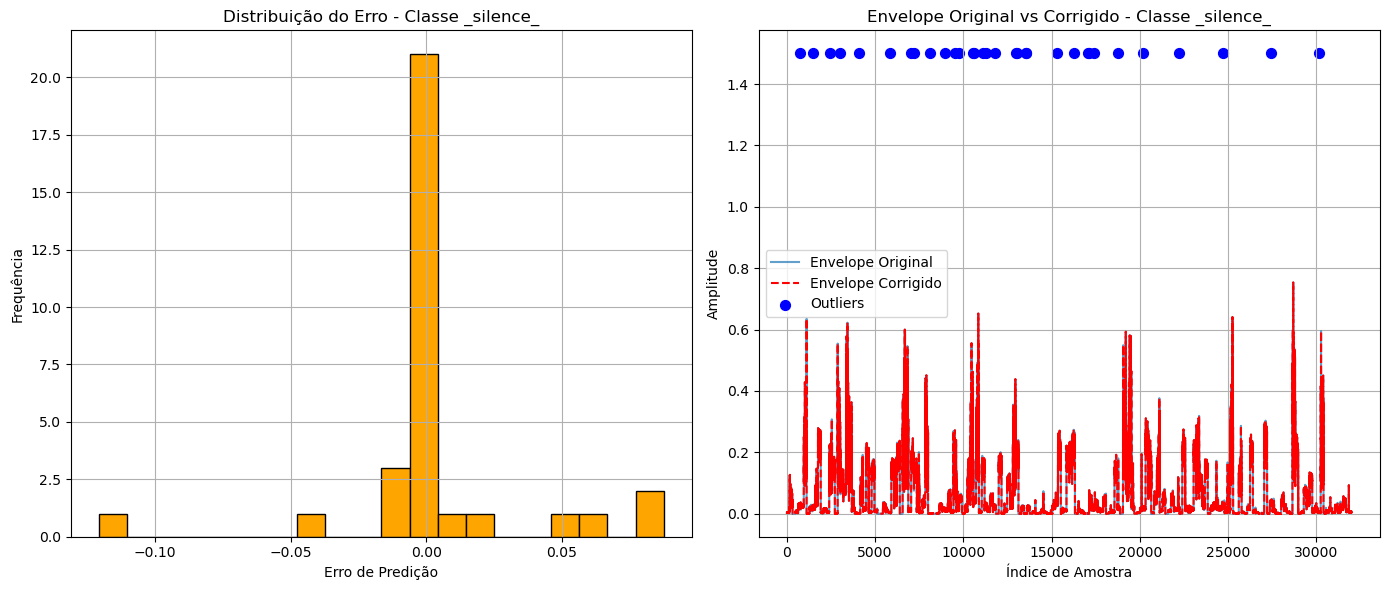

Análise feita com p = 3 para a classe _silence_


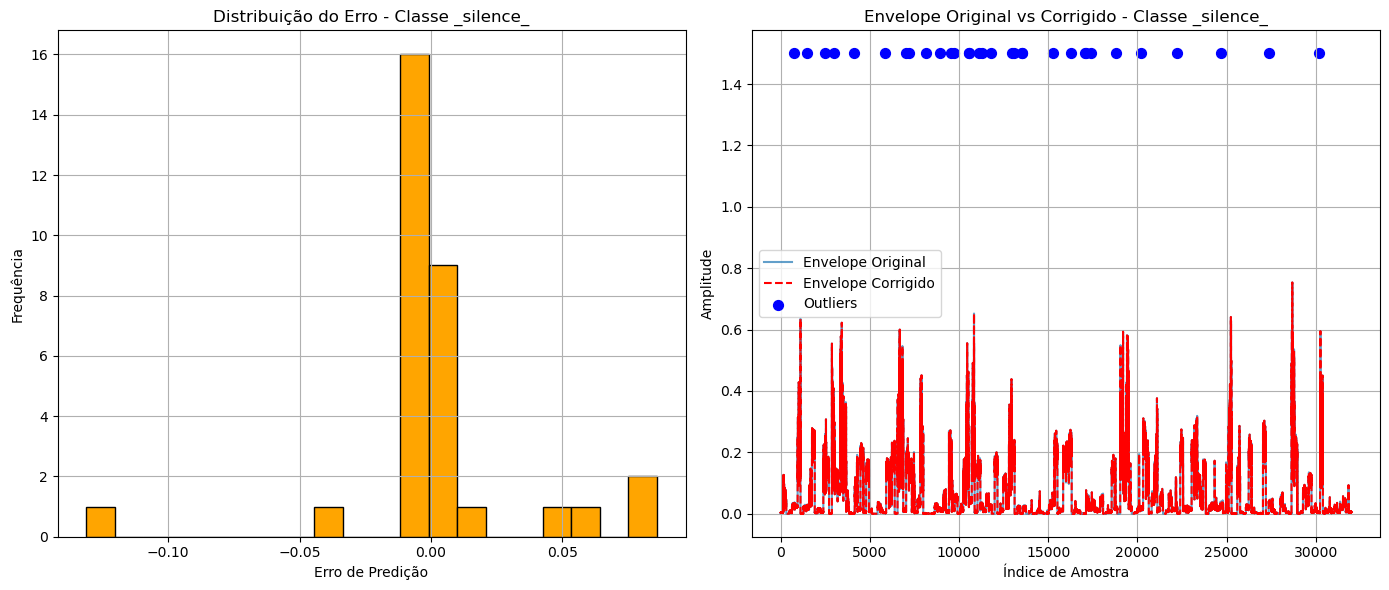

Análise feita com p = 5 para a classe _silence_


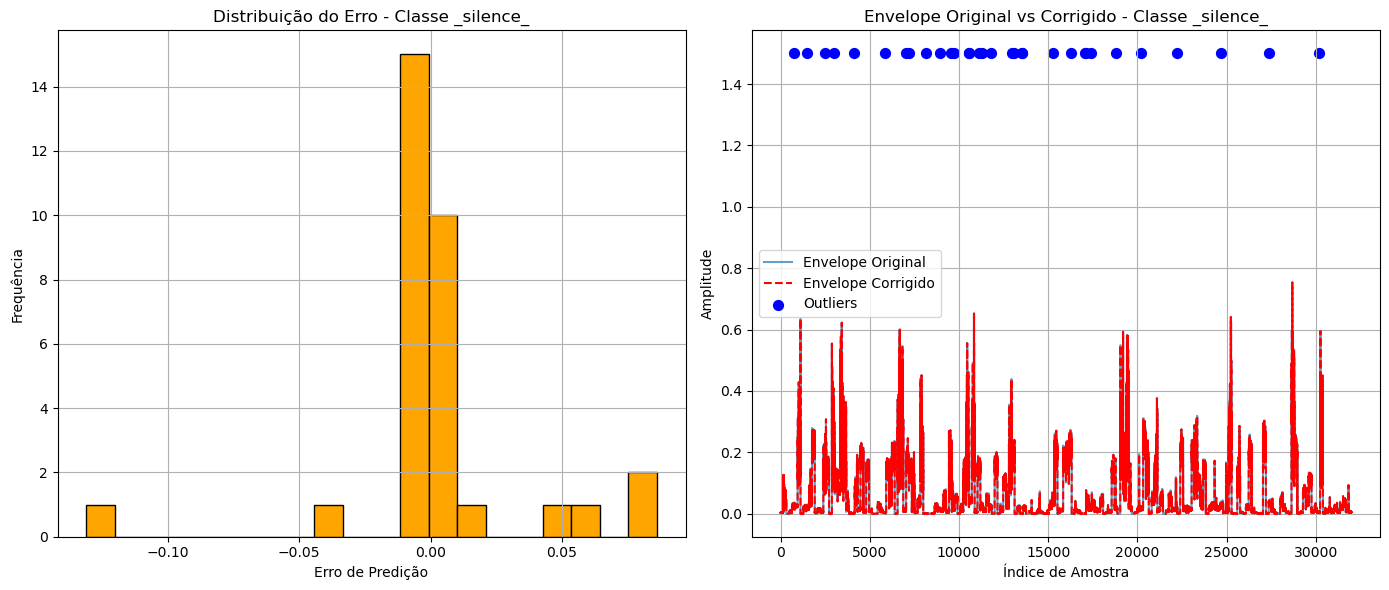

Análise feita com p = 7 para a classe _silence_


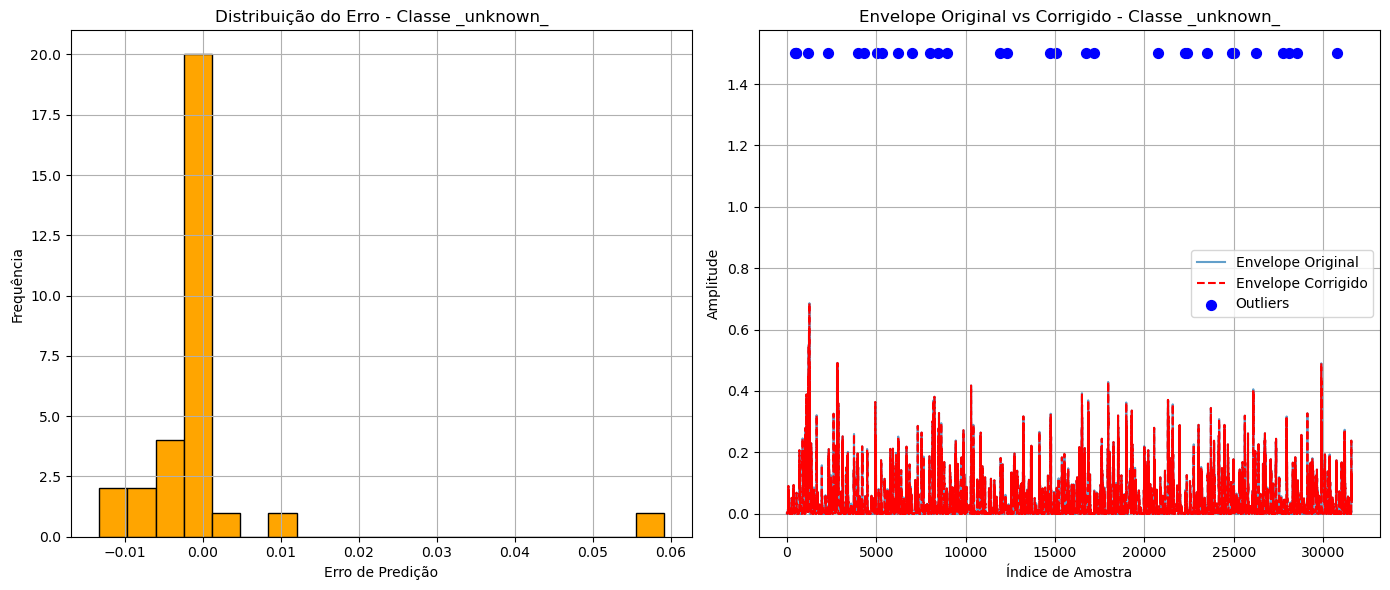

Análise feita com p = 3 para a classe _unknown_


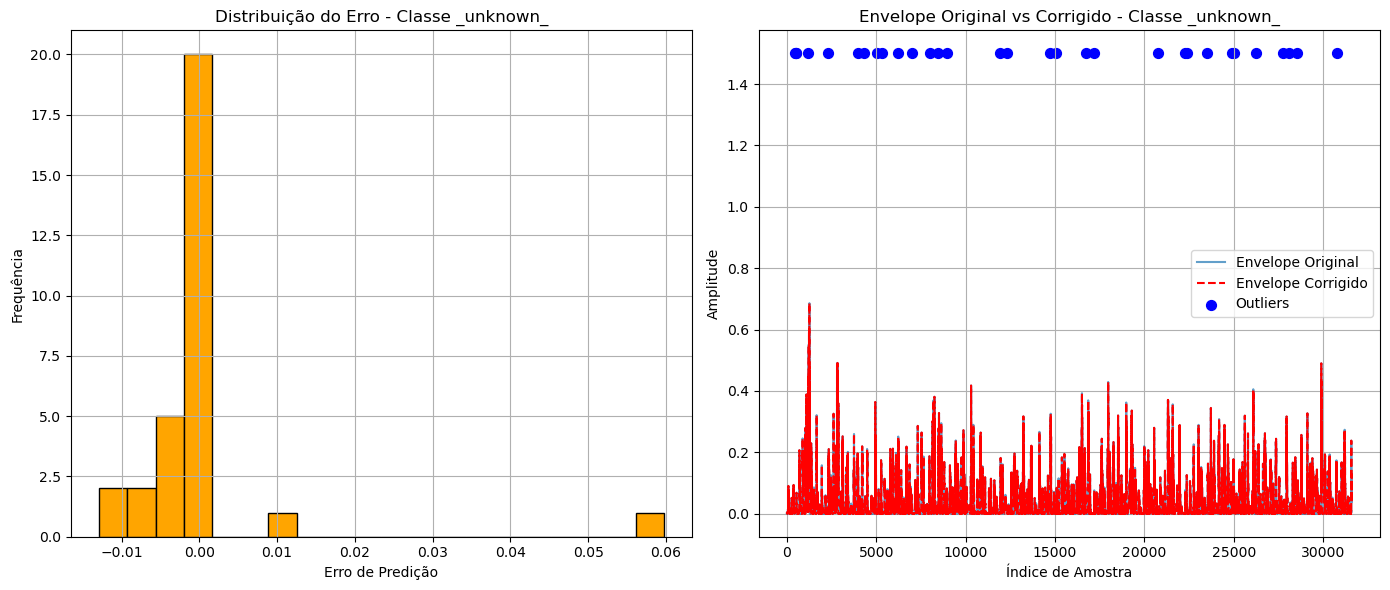

Análise feita com p = 5 para a classe _unknown_


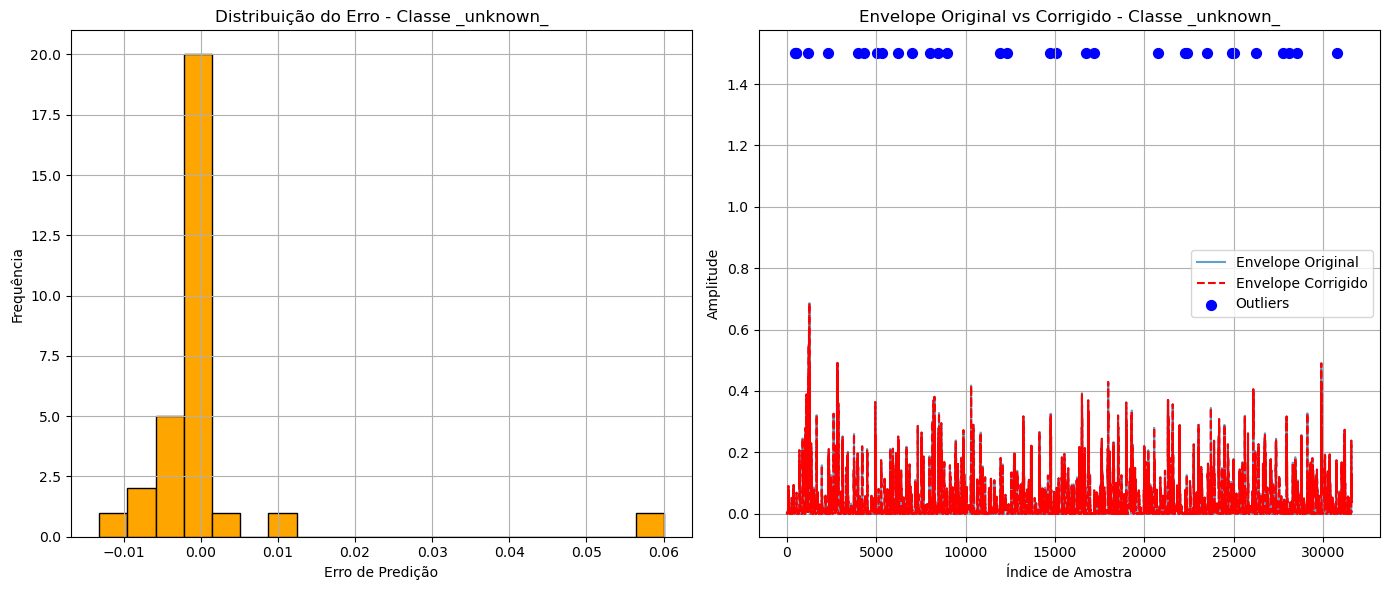

Análise feita com p = 7 para a classe _unknown_


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def predict_with_linear_model(X, beta):
    """
    Usa o modelo linear (beta) para fazer previsões baseadas nos valores de X.
    
    :param X: numpy array com os dados de entrada para previsão.
    :param beta: coeficientes do modelo linear.
    :return: valores previstos (Y_pred).
    """
    n_samples = X.shape[0]
    X_design = np.hstack((np.ones((n_samples, 1)), X))  # Matriz de design
    Y_pred = X_design @ beta  # Multiplicação de matrizes para prever os valores
    return Y_pred

def replace_outliers_with_prediction(envelope, p, outlier_indices, beta):
    """
    Substitui os outliers pelos valores previstos usando o modelo linear.
    
    :param envelope: array com o envelope original.
    :param p: número de amostras anteriores consideradas no modelo.
    :param outlier_indices: índices dos outliers no array.
    :param beta: coeficientes do modelo linear.
    :return: envelope modificado com previsões no lugar dos outliers.
    """
    corrected_envelope = envelope.copy()

    for idx in outlier_indices:
        if idx >= p:
            # Seleciona as p amostras anteriores
            X = envelope[idx-p:idx].reshape(1, -1)
            # Prever o valor para o outlier
            predicted_value = predict_with_linear_model(X, beta)
            # Substituir o outlier com o valor previsto (pegando o escalar do array)
            corrected_envelope[idx] = predicted_value.item()  # .item() extrai o valor escalar
    
    return corrected_envelope

def analyze_error_and_plot(original, corrected, envelopes, outlier_indices, class_name):
    """
    Analisa o erro de predição e gera os gráficos comparando o envelope original
    com o envelope corrigido.
    
    :param original: array original com outliers.
    :param corrected: array com os outliers corrigidos.
    :param envelopes: array de envelopes originais (sem outliers).
    :param outlier_indices: índices dos outliers.
    :param class_name: nome da classe analisada.
    """
    # Calcular erro com base nos valores reais do envelope original (sem outliers)
    error = envelopes[outlier_indices] - corrected[outlier_indices]
    
    # Mostrar distribuição do erro
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.title(f'Distribuição do Erro - Classe {class_name}')
    plt.hist(error, bins=20, color='orange', edgecolor='black')
    plt.xlabel('Erro de Predição')
    plt.ylabel('Frequência')
    plt.grid()
    
    # Mostrar gráfico comparativo dos envelopes e destacar os outliers com bolas
    plt.subplot(1, 2, 2)
    plt.title(f'Envelope Original vs Corrigido - Classe {class_name}')
    plt.plot(envelopes, label='Envelope Original', alpha=0.7)
    plt.plot(corrected, label='Envelope Corrigido', color='red', linestyle='--')

    # Plotar os outliers como bolas
    plt.scatter(outlier_indices, original[outlier_indices], color='blue', label='Outliers', s=50, marker='o')

    plt.xlabel('Índice de Amostra')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# Exemplo de uso para o ponto 4.4
p_values = [3, 5, 7]  # Testar diferentes valores de p

for class_name, envelopes in mini_dataset.items():
    # Selecionar alguns outliers
    envelope_with_outliers = inject_outliers(envelopes, 0.001)  # 1% de outliers
    outlier_indices = np.where(envelope_with_outliers == 1.5)[0]

    for p in p_values:
        # Criar as matrizes de treinamento (X) e saída (Y) para o modelo linear
        X_train = []
        Y_train = []
        for i in range(p, len(envelopes)):
            X_train.append(envelopes[i-p:i])
            Y_train.append(envelopes[i])
        
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)

        # Calcular os pesos beta do modelo linear
        beta = linear_model(X_train, Y_train)
        
        # Substituir os outliers pelos valores previstos
        corrected_envelope = replace_outliers_with_prediction(envelope_with_outliers, p, outlier_indices, beta)

        # Analisar o erro e plotar resultados, comparando com o envelope original
        analyze_error_and_plot(envelope_with_outliers, corrected_envelope, envelopes, outlier_indices, class_name)

        # Mostrar qual valor de p foi utilizado
        print(f"Análise feita com p = {p} para a classe {class_name}")


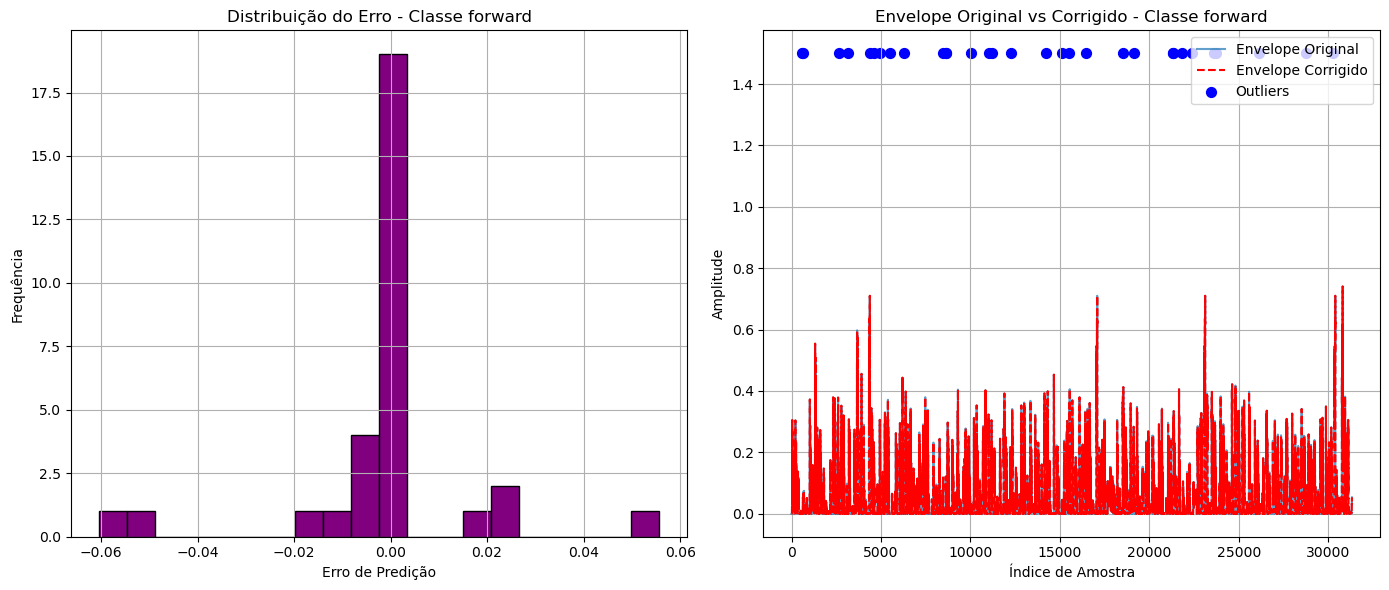

Análise feita com p = 4 para a classe forward


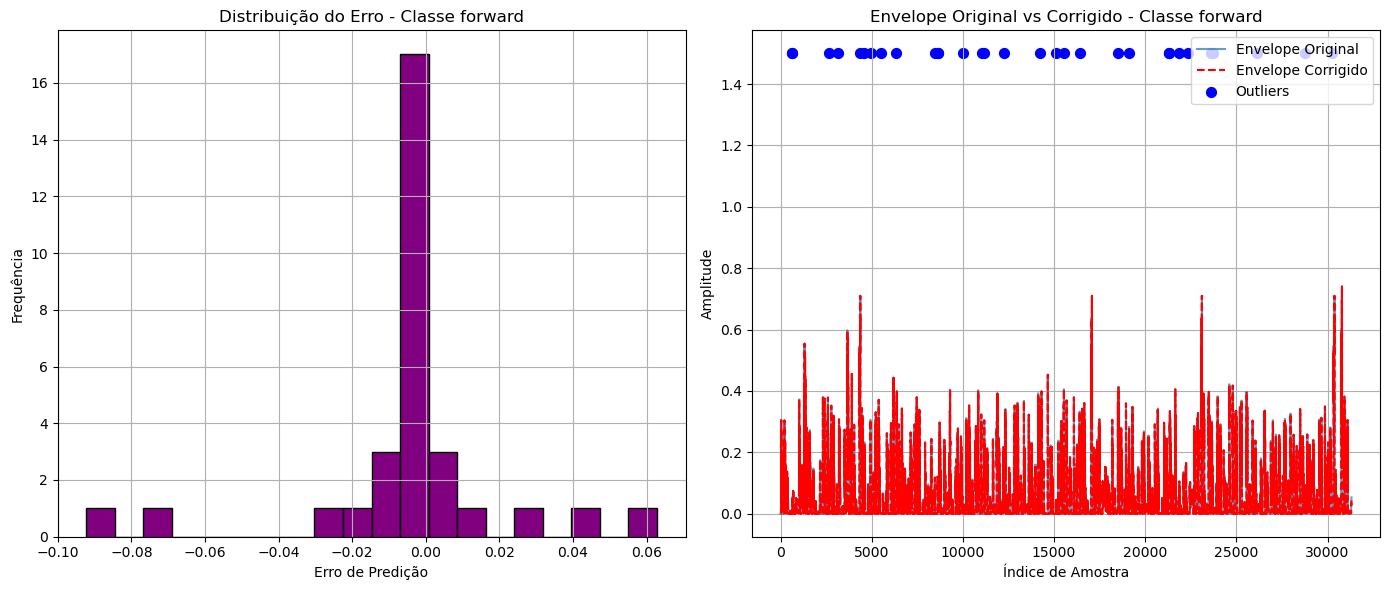

Análise feita com p = 6 para a classe forward


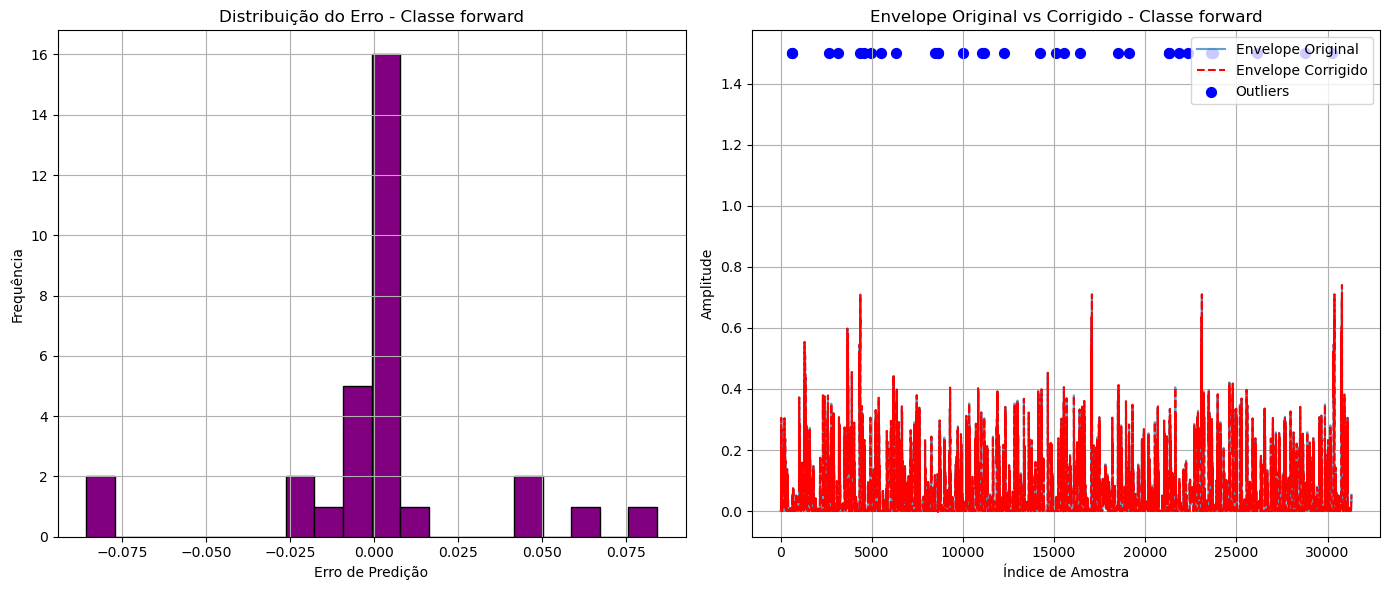

Análise feita com p = 8 para a classe forward


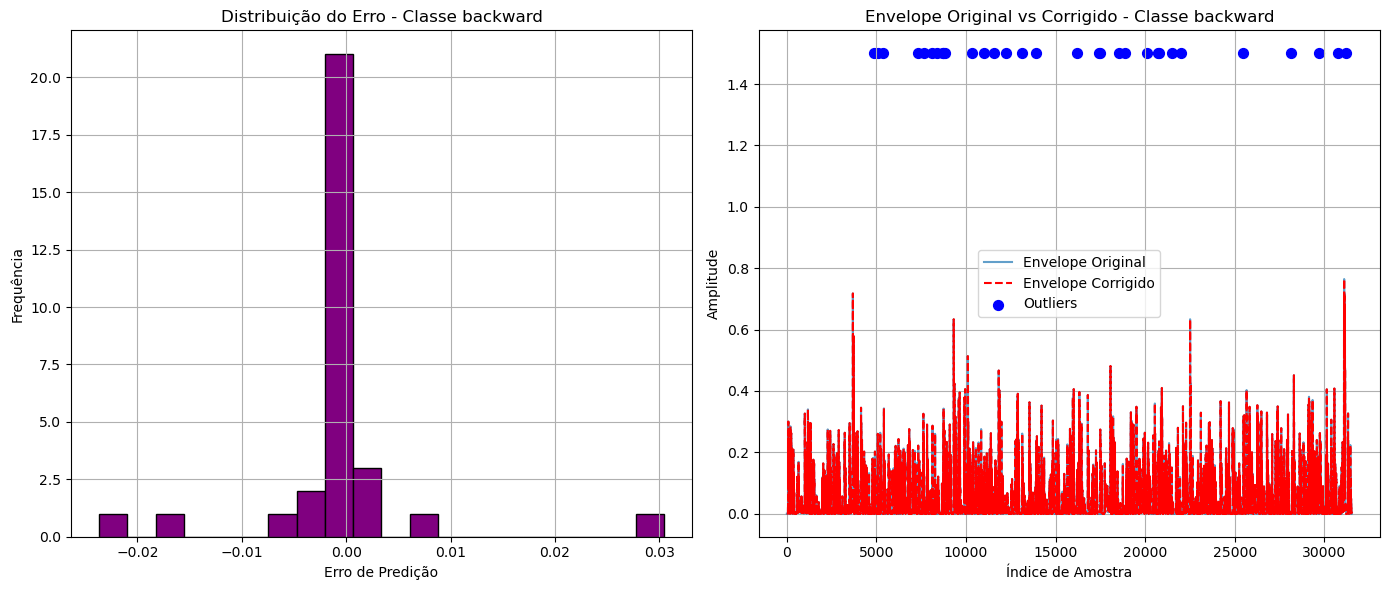

Análise feita com p = 4 para a classe backward


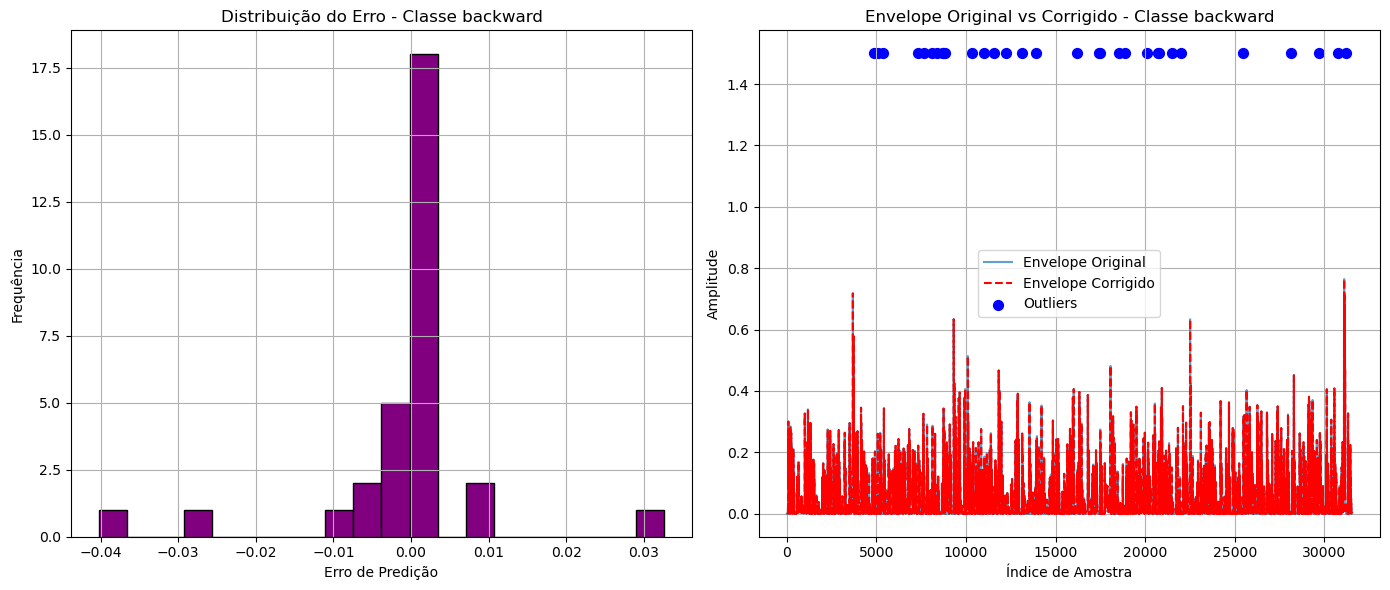

Análise feita com p = 6 para a classe backward


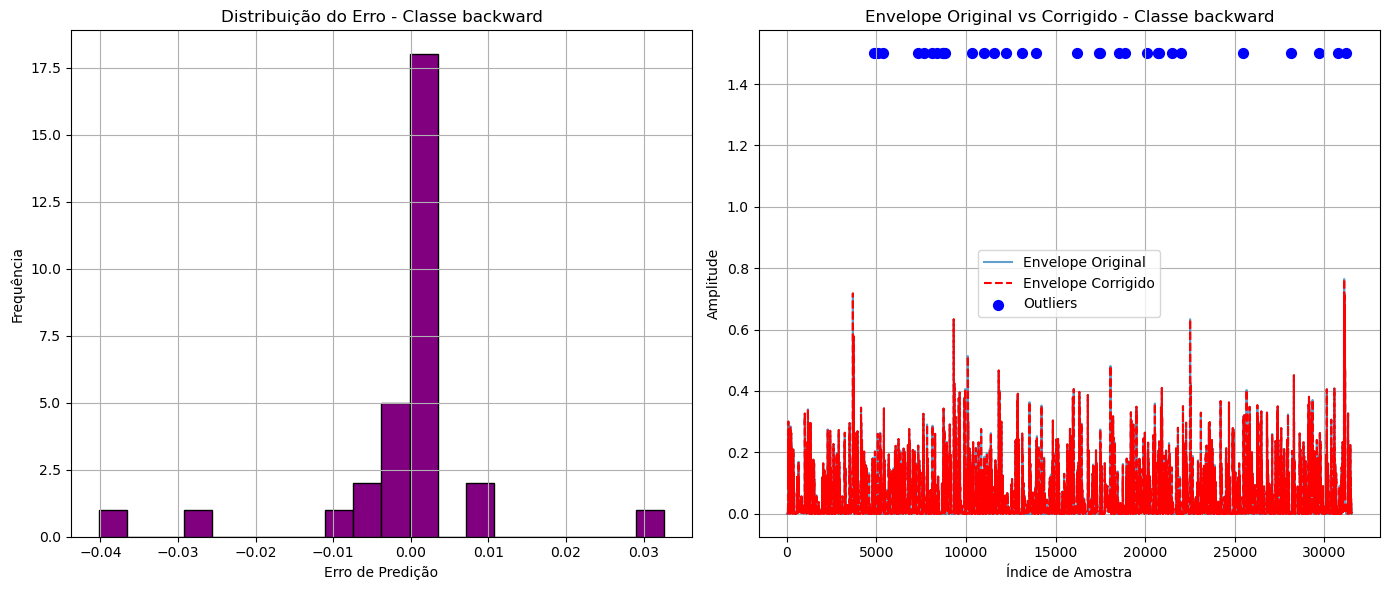

Análise feita com p = 8 para a classe backward


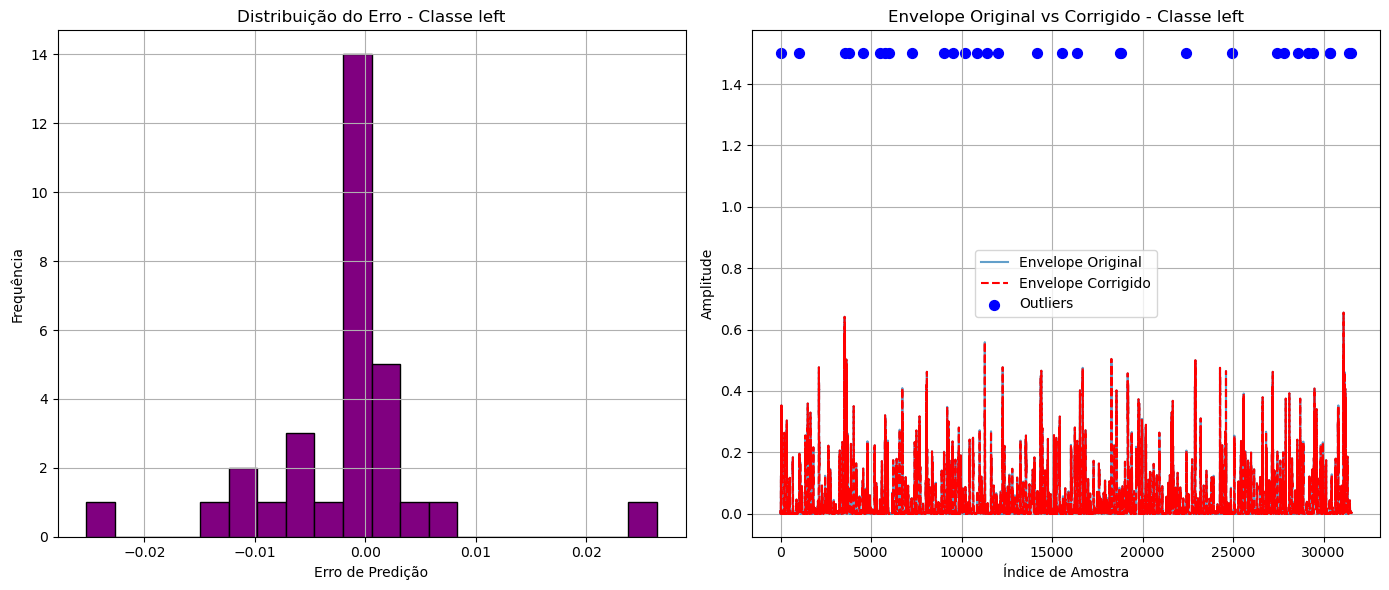

Análise feita com p = 4 para a classe left


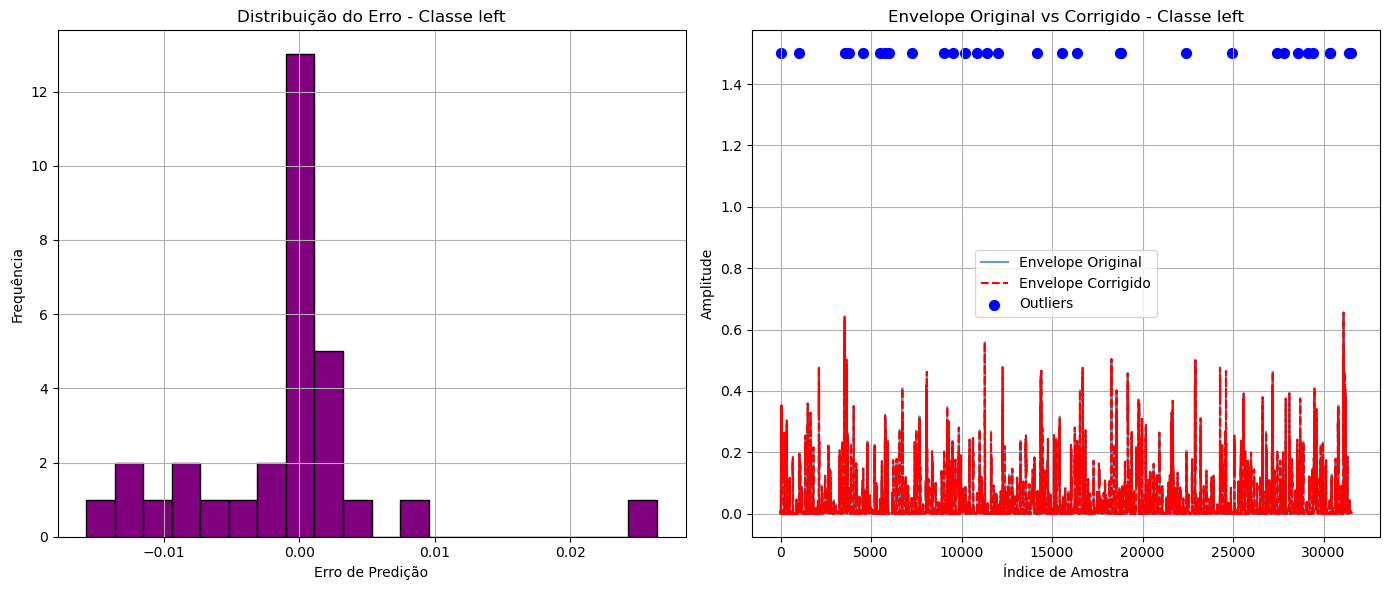

Análise feita com p = 6 para a classe left


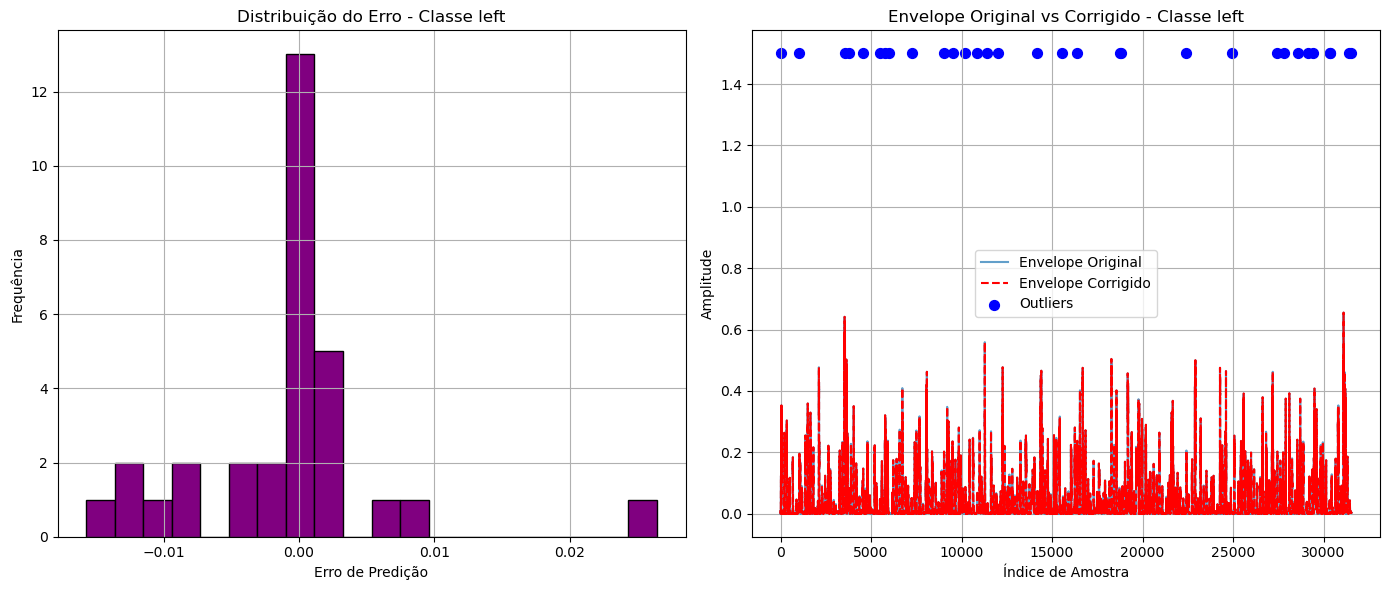

Análise feita com p = 8 para a classe left


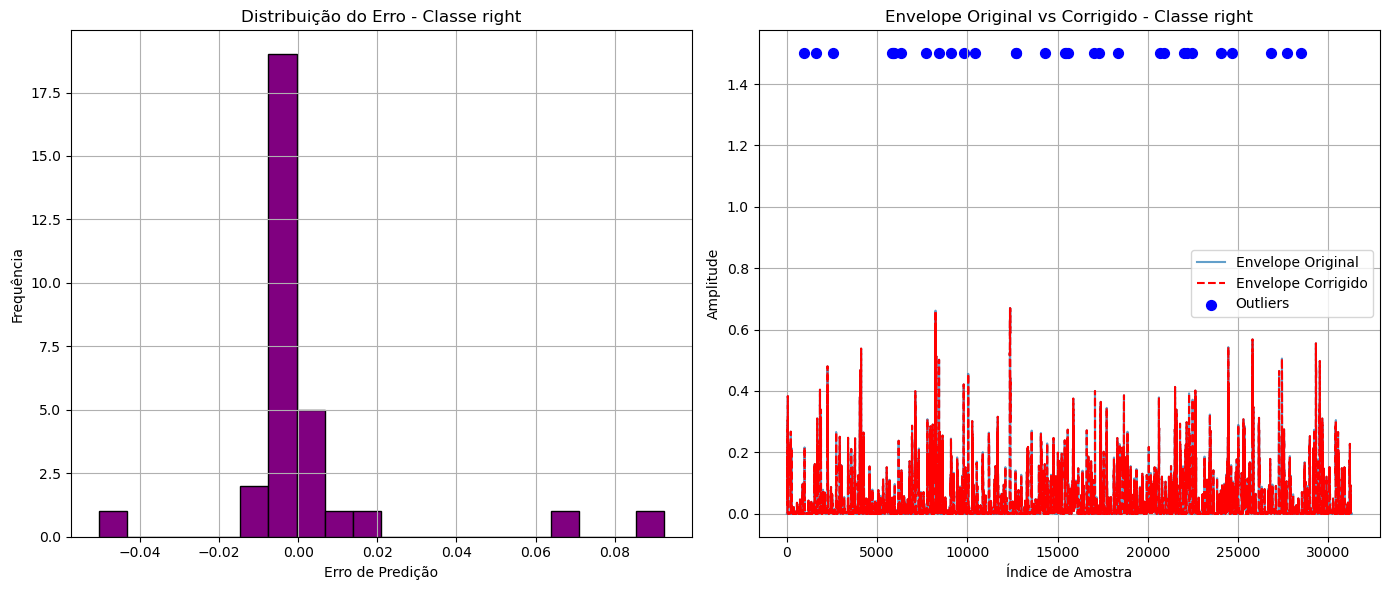

Análise feita com p = 4 para a classe right


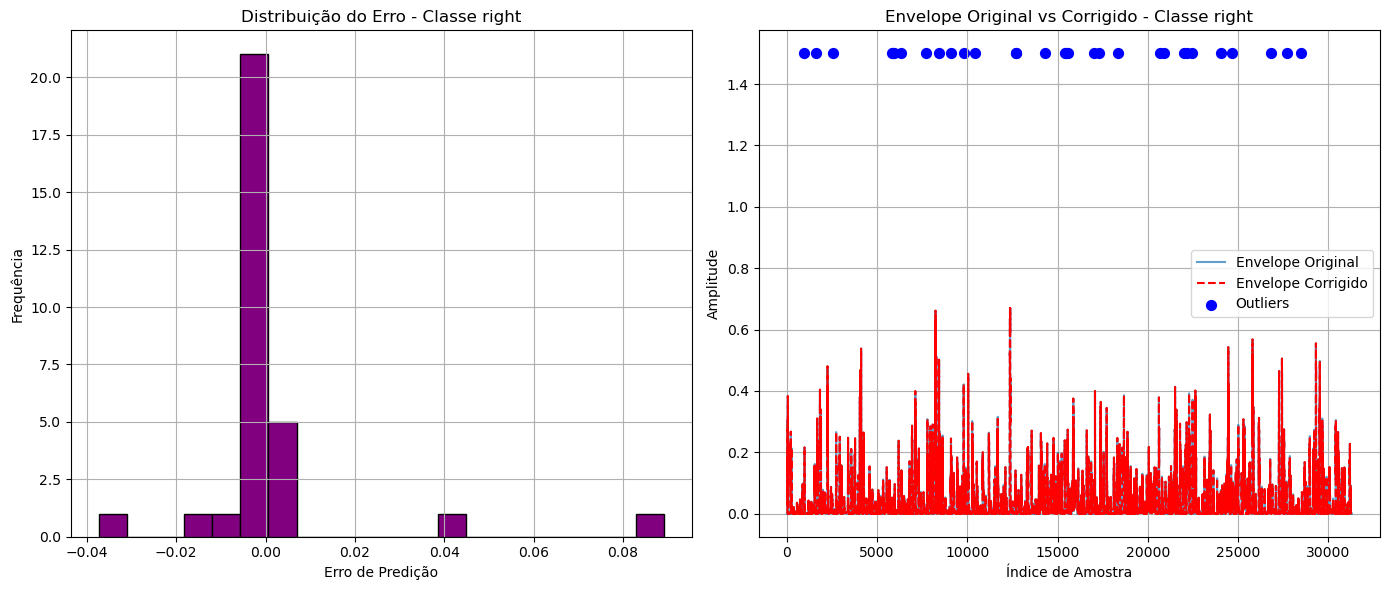

Análise feita com p = 6 para a classe right


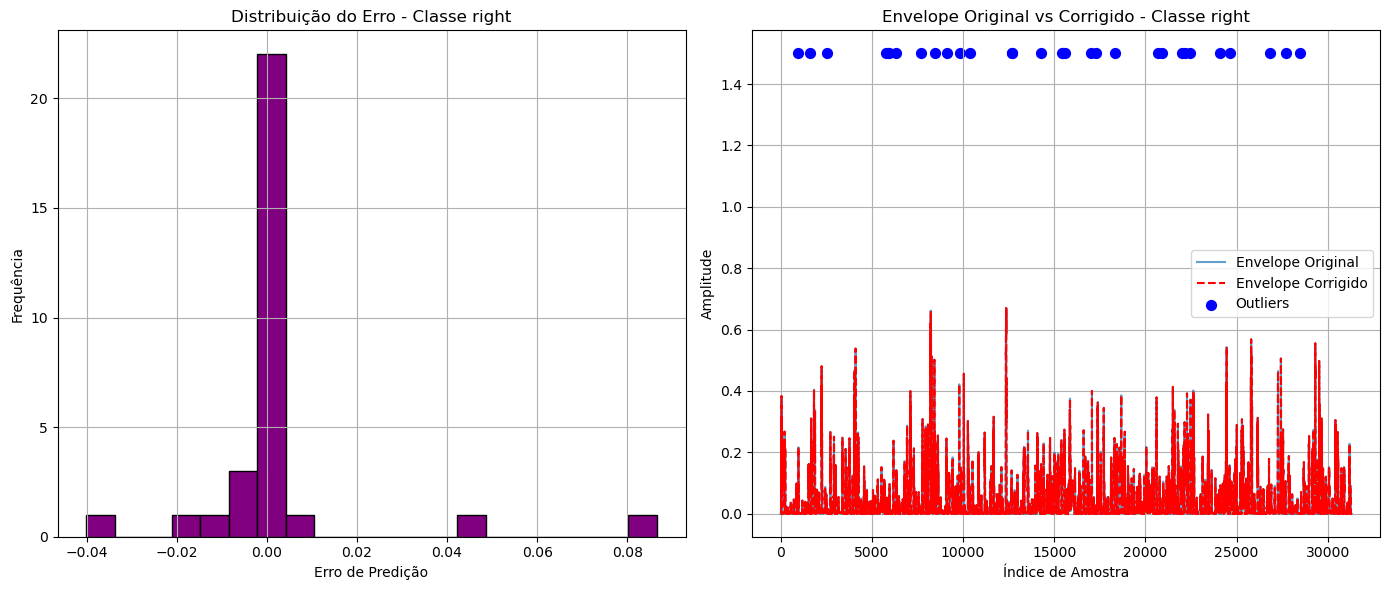

Análise feita com p = 8 para a classe right


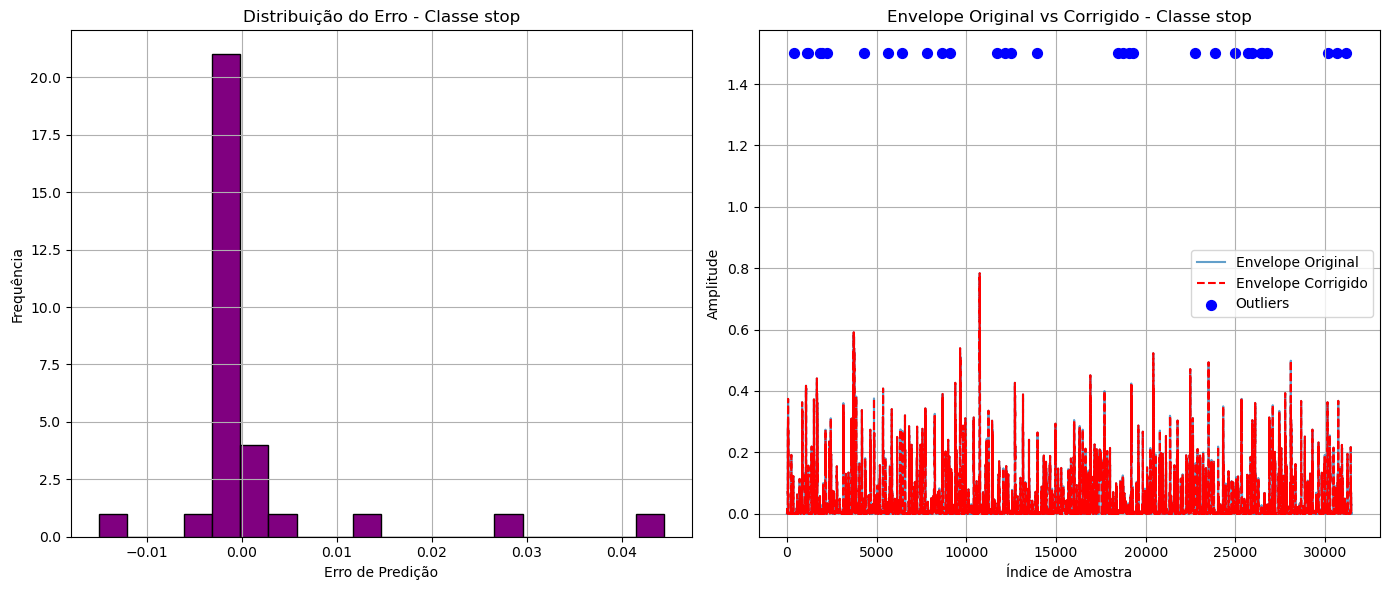

Análise feita com p = 4 para a classe stop


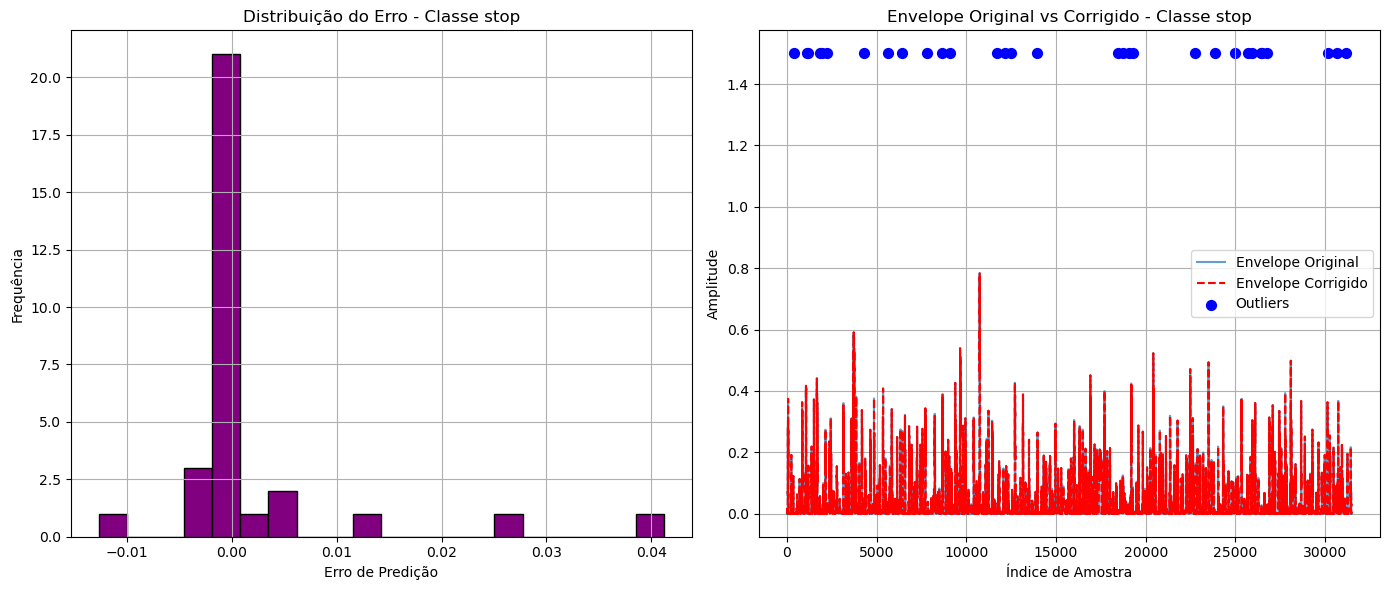

Análise feita com p = 6 para a classe stop


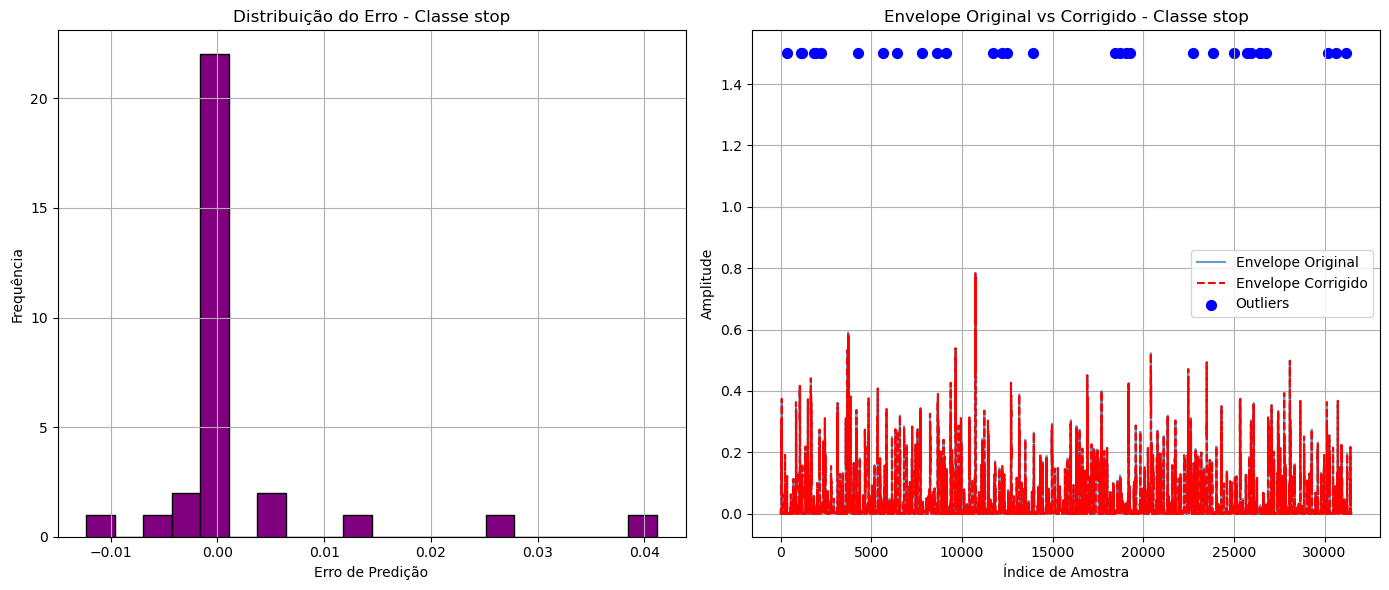

Análise feita com p = 8 para a classe stop


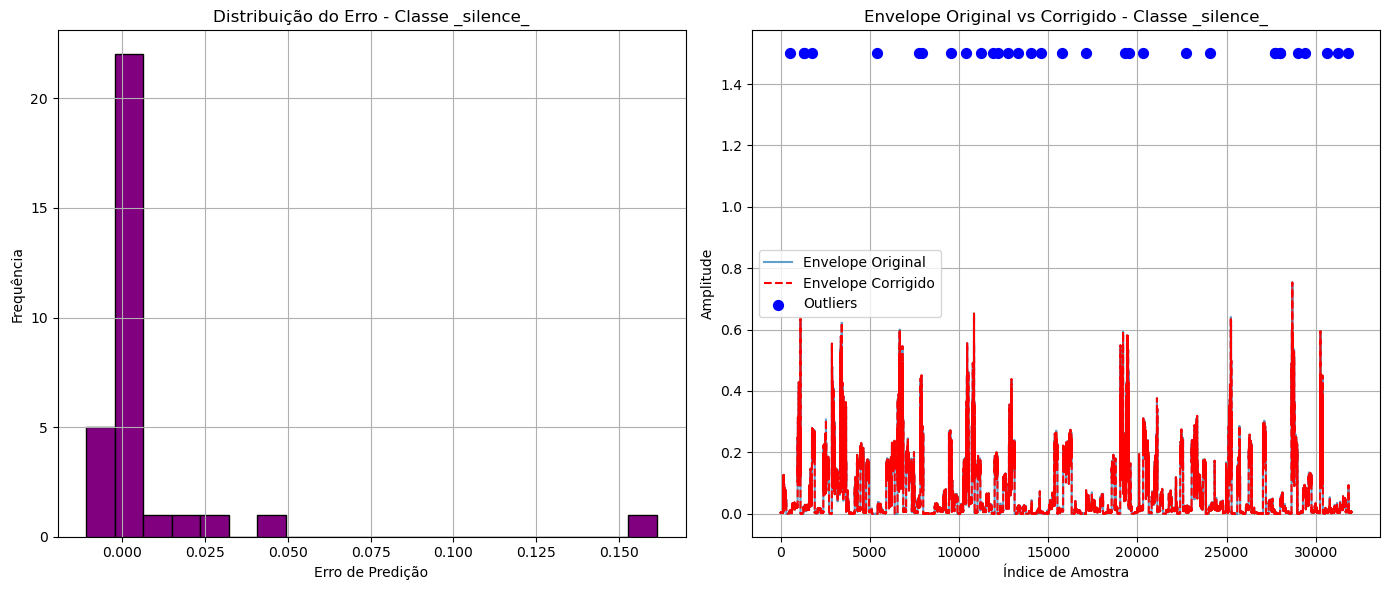

Análise feita com p = 4 para a classe _silence_


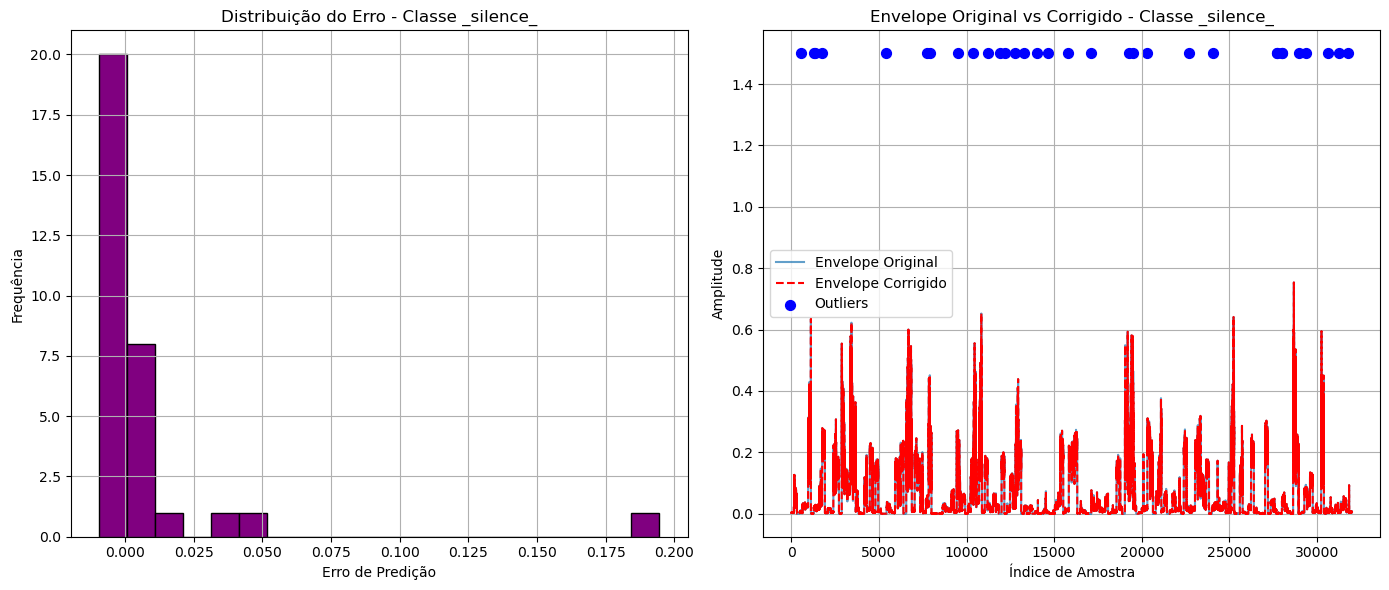

Análise feita com p = 6 para a classe _silence_


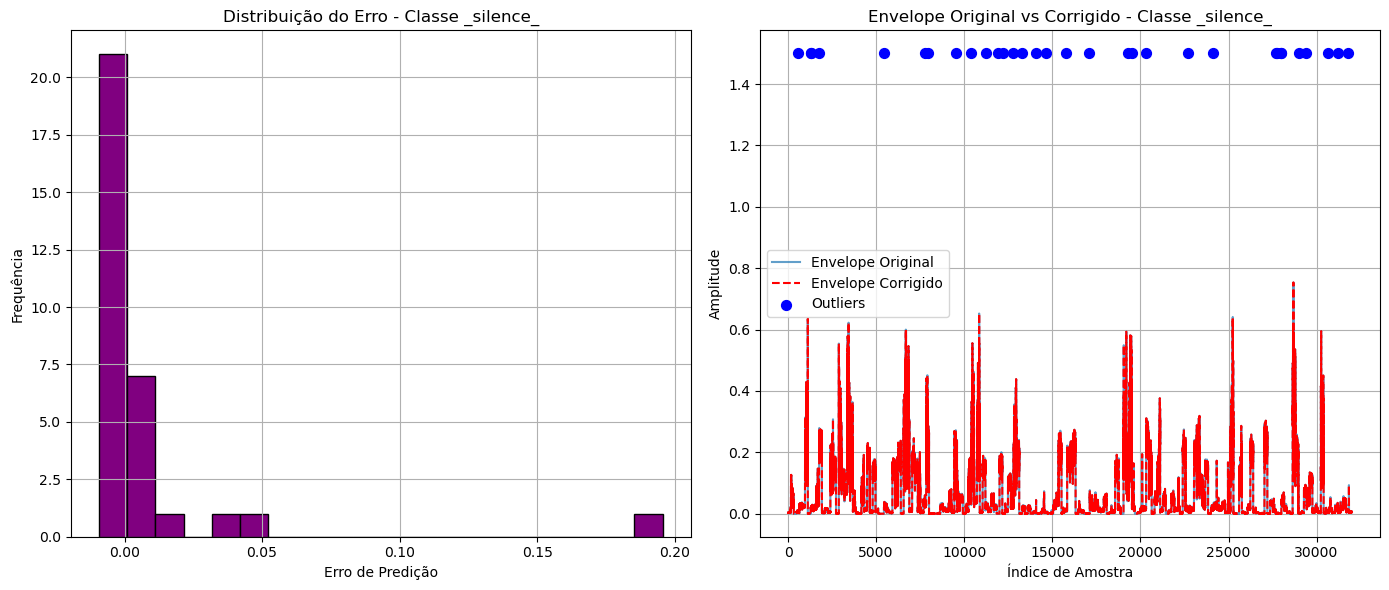

Análise feita com p = 8 para a classe _silence_


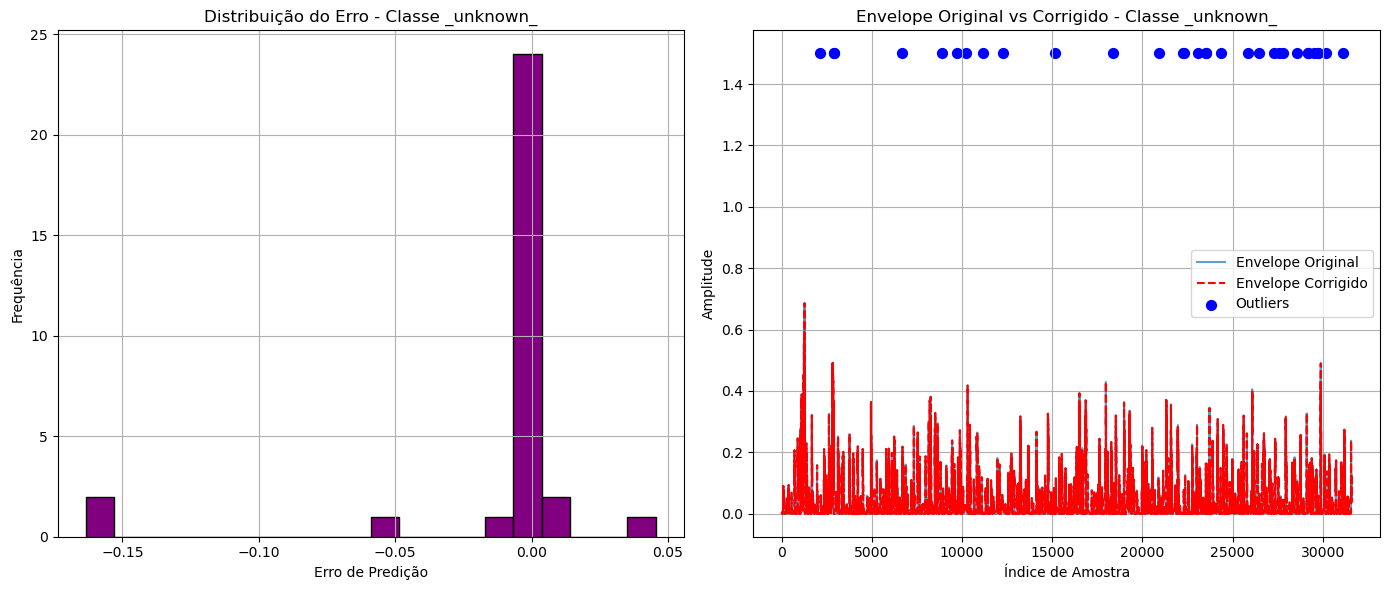

Análise feita com p = 4 para a classe _unknown_


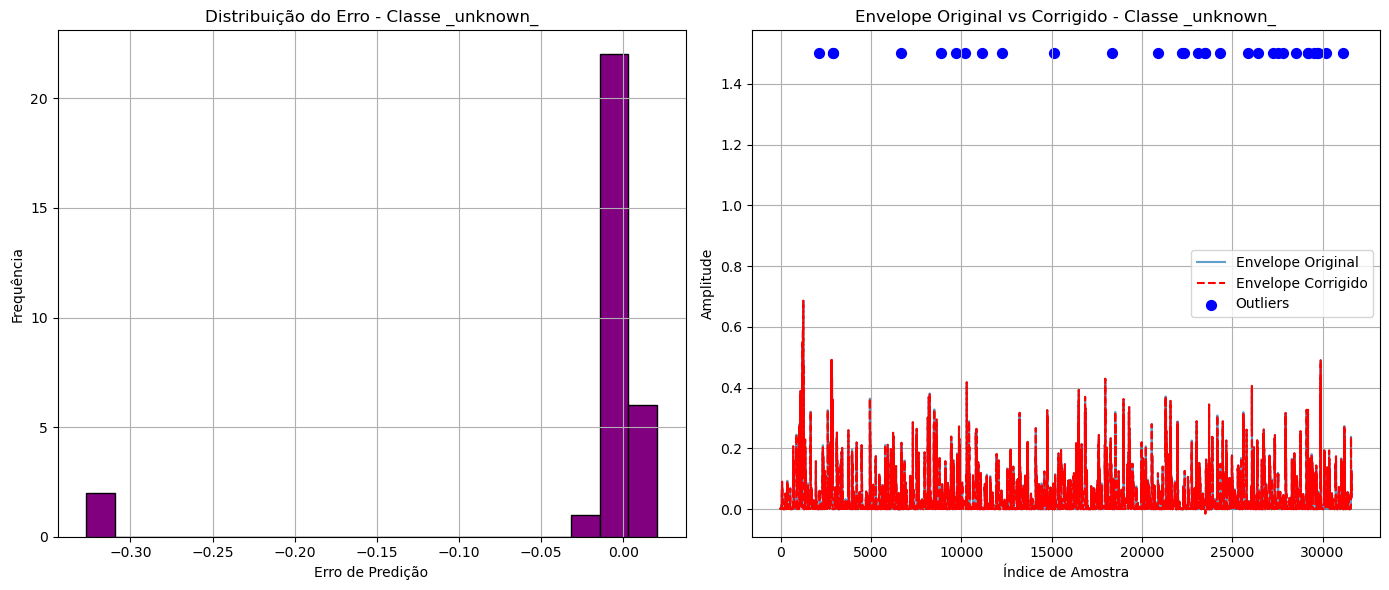

Análise feita com p = 6 para a classe _unknown_


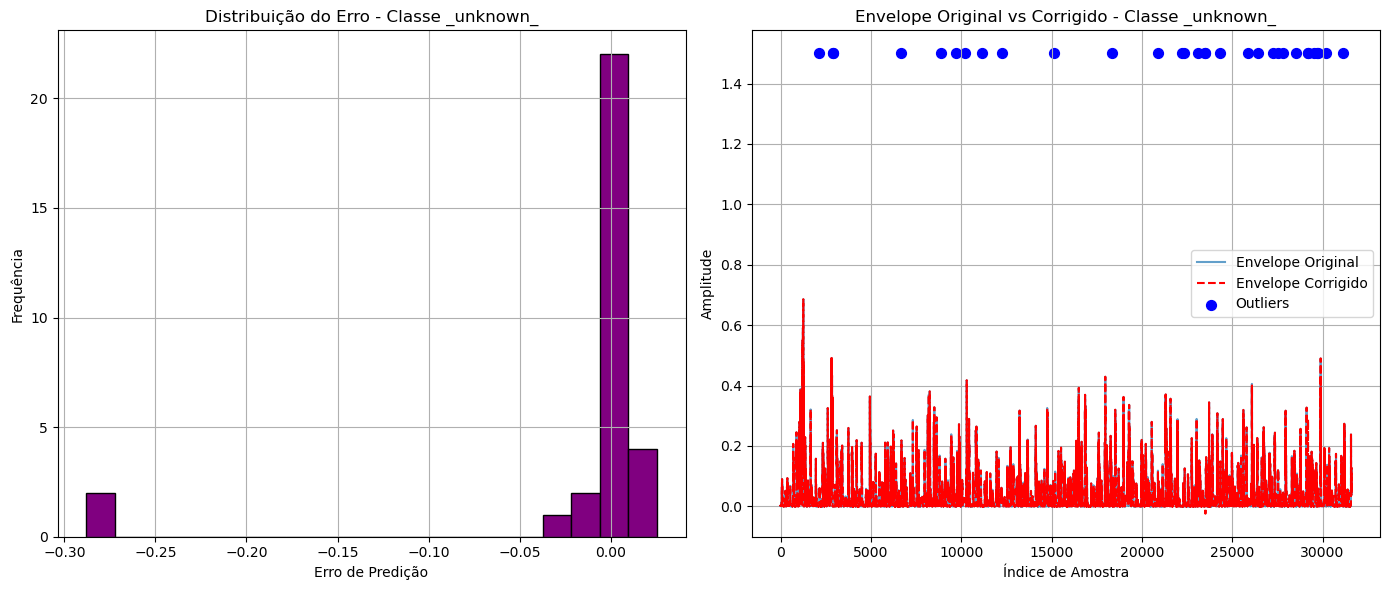

Análise feita com p = 8 para a classe _unknown_


In [20]:
 def analyze_error_and_plot_centered(original, corrected, envelopes, outlier_indices, class_name):
            """
            Analisa o erro de predição e gera os gráficos comparando o envelope original
            com o envelope corrigido usando janela centrada.
            
            :param original: array original com outliers.
            :param corrected: array com os outliers corrigidos.
            :param envelopes: array de envelopes originais (sem outliers).
            :param outlier_indices: índices dos outliers.
            :param class_name: nome da classe analisada.
            """
            # Calcular erro com base nos valores reais do envelope original (sem outliers)
            error = envelopes[outlier_indices] - corrected[outlier_indices]
            
            # Mostrar distribuição do erro
            plt.figure(figsize=(14, 6))
            
            plt.subplot(1, 2, 1)
            plt.title(f'Distribuição do Erro - Classe {class_name}')
            plt.hist(error, bins=20, color='purple', edgecolor='black')
            plt.xlabel('Erro de Predição')
            plt.ylabel('Frequência')
            plt.grid()
            
            # Mostrar gráfico comparativo dos envelopes e destacar os outliers com bolas
            plt.subplot(1, 2, 2)
            plt.title(f'Envelope Original vs Corrigido - Classe {class_name}')
            plt.plot(envelopes, label='Envelope Original', alpha=0.7)
            plt.plot(corrected, label='Envelope Corrigido', color='red', linestyle='--')

            # Plotar os outliers como bolas
            plt.scatter(outlier_indices, original[outlier_indices], color='blue', label='Outliers', s=50, marker='o')

            plt.xlabel('Índice de Amostra')
            plt.ylabel('Amplitude')
            plt.legend()
            plt.grid()
            
            plt.tight_layout()
            plt.show()
        
def replace_outliers_with_centered_window(envelope, p, outlier_indices, beta):
    """
    Substitui os outliers usando uma janela centrada de tamanho p.
    
    :param envelope: array com o envelope original.
    :param p: número total de amostras na janela (deve ser par).
    :param outlier_indices: índices dos outliers no array.
    :param beta: coeficientes do modelo linear.
    :return: envelope modificado com previsões no lugar dos outliers.
    """
    corrected_envelope = envelope.copy()
    half_p = p // 2  # Metade da janela para cada lado

    for idx in outlier_indices:
        if idx >= half_p and idx < len(envelope) - half_p:
            # Seleciona as amostras antes e depois do índice do outlier
            X = np.concatenate((envelope[idx-half_p:idx], envelope[idx+1:idx+half_p+1])).reshape(1, -1)
            # Prever o valor para o outlier
            predicted_value = predict_with_linear_model(X, beta)
            # Substituir o outlier com o valor previsto (pegando o escalar do array)
            corrected_envelope[idx] = predicted_value.item()  # .item() extrai o valor escalar
    
    return corrected_envelope

# Exemplo de uso com valores ajustados
p_values = [4, 6, 8]  # Testar diferentes valores de p (pares para garantir que p/2 seja um inteiro)

for class_name, envelopes in mini_dataset.items():
    # Selecionar alguns outliers
    envelope_with_outliers = inject_outliers(envelopes, 0.001)  # 1% de outliers
    outlier_indices = np.where(envelope_with_outliers == 1.5)[0]

    for p in p_values:
        half_p = p // 2  # Metade da janela para criar X_train

        # Criar as matrizes de treinamento (X) e saída (Y) para o modelo linear com janela centrada
        X_train = []
        Y_train = []
        for i in range(half_p, len(envelopes) - half_p):
            # Janela centrada com p/2 amostras antes e depois
            X_train.append(np.concatenate((envelopes[i-half_p:i], envelopes[i+1:i+half_p+1])))
            Y_train.append(envelopes[i])
        
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)

        # Calcular os pesos beta do modelo linear
        beta = linear_model(X_train, Y_train)
        
        # Substituir os outliers pelos valores previstos usando janela centrada
        corrected_envelope = replace_outliers_with_centered_window(envelope_with_outliers, p, outlier_indices, beta)

        # Analisar o erro e plotar resultados, comparando com o envelope original
        analyze_error_and_plot_centered(envelope_with_outliers, corrected_envelope, envelopes, outlier_indices, class_name)
       

        # Mostrar qual valor de p foi utilizado
        print(f"Análise feita com p = {p} para a classe {class_name}")


In [21]:
import numpy as np
import pandas as pd

def calculate_absolute_error(envelopes, corrected_envelope, outlier_indices):
    """
    Calcula o erro absoluto entre os valores reais (envelopes) e os valores corrigidos.
    
    :param envelopes: array de envelopes originais (sem outliers).
    :param corrected_envelope: array de envelopes corrigidos (com predições).
    :param outlier_indices: índices dos outliers.
    :return: erro absoluto médio.
    """
    error = np.abs(envelopes[outlier_indices] - corrected_envelope[outlier_indices])
    return np.mean(error)

# Inicializar um dataframe para armazenar os resultados de erro
comparison_data = []  # Lista para armazenar os dados

# Exemplo de uso para cálculo de erro e comparação
p_values = [3, 5, 7]  # Testar diferentes valores de p

for class_name, envelopes in mini_dataset.items():
    # Selecionar alguns outliers
    envelope_with_outliers = inject_outliers(envelopes, 0.001)  # 1% de outliers
    outlier_indices = np.where(envelope_with_outliers == 1.5)[0]

    for p in p_values:
        # ---------------- Cálculo do erro para o Ponto 4.4 (Amostras anteriores) ---------------- #
        # Criar as matrizes de treinamento (X) e saída (Y) para o modelo linear do Ponto 4.4
        X_train = []
        Y_train = []
        for i in range(p, len(envelopes)):
            X_train.append(envelopes[i-p:i])
            Y_train.append(envelopes[i])
        
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)

        # Calcular os pesos beta do modelo linear para o Ponto 4.4
        beta_4_4 = linear_model(X_train, Y_train)
        
        # Substituir os outliers pelos valores previstos no Ponto 4.4
        corrected_envelope_4_4 = replace_outliers_with_prediction(envelope_with_outliers, p, outlier_indices, beta_4_4)

        # Calcular o erro absoluto médio para o Ponto 4.4
        error_4_4 = calculate_absolute_error(envelopes, corrected_envelope_4_4, outlier_indices)

        # ---------------- Cálculo do erro para o Ponto 4.5 (Janela centrada) ---------------- #
        # Criar as matrizes de treinamento (X) e saída (Y) para o modelo linear do Ponto 4.5
        X_train_centered = []
        Y_train_centered = []
        half_p = p // 2
        for i in range(half_p, len(envelopes) - half_p):
            X_train_centered.append(np.concatenate((envelopes[i-half_p:i], envelopes[i+1:i+half_p+1])))
            Y_train_centered.append(envelopes[i])
        
        X_train_centered = np.array(X_train_centered)
        Y_train_centered = np.array(Y_train_centered)

        # Calcular os pesos beta do modelo linear para o Ponto 4.5
        beta_4_5 = linear_model(X_train_centered, Y_train_centered)
        
        # Substituir os outliers pelos valores previstos no Ponto 4.5
        corrected_envelope_4_5 = replace_outliers_with_centered_window(envelope_with_outliers, p, outlier_indices, beta_4_5)

        # Calcular o erro absoluto médio para o Ponto 4.5
        error_4_5 = calculate_absolute_error(envelopes, corrected_envelope_4_5, outlier_indices)

        # ---------------- Comparação e adição na lista ---------------- #
        # Calcular a diferença de erro entre os dois métodos
        error_difference = error_4_4 - error_4_5

        # Armazenar os dados na lista
        comparison_data.append({
            'Classe': class_name,
            'p': p,
            'Erro Ponto 4.4': error_4_4,
            'Erro Ponto 4.5': error_4_5,
            'Diferença': error_difference
        })

# Converter a lista em DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Exibir a tabela de comparação
print(comparison_df)


       Classe  p  Erro Ponto 4.4  Erro Ponto 4.5  Diferença
0     forward  3        0.020004        0.012812   0.007192
1     forward  5        0.020120        0.014729   0.005390
2     forward  7        0.020136        0.015320   0.004816
3    backward  3        0.015315        0.007701   0.007614
4    backward  5        0.015497        0.007890   0.007607
5    backward  7        0.017687        0.006995   0.010692
6        left  3        0.006855        0.004440   0.002415
7        left  5        0.006897        0.004585   0.002311
8        left  7        0.007022        0.004661   0.002361
9       right  3        0.008573        0.012190  -0.003617
10      right  5        0.008628        0.011423  -0.002795
11      right  7        0.008801        0.007108   0.001693
12       stop  3        0.017957        0.010867   0.007090
13       stop  5        0.017923        0.010521   0.007402
14       stop  7        0.018083        0.011125   0.006958
15  _silence_  3        0.009792        

In [22]:
!pip install librosa

In [23]:
!pip install PyWavelets

In [24]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
from scipy.stats import kurtosis, skew
from scipy.fftpack import dct
import librosa
import pywt  # Necessário para a Transformada Wavelet
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="librosa")


def extrair_features(file_path, class_name):
    # Carregar o áudio usando librosa para garantir compatibilidade com tonnetz e outras features
    audio, sr = librosa.load(file_path, sr=None)  # Lê o áudio em mono
    
    # Características no Domínio do Tempo
    zcr = np.mean(np.diff(np.sign(audio)) != 0) / len(audio)  # Zero-Crossing Rate
    rms = np.sqrt(np.mean(audio**2))  # Root Mean Square
    crest_factor = np.max(np.abs(audio)) / rms if rms > 0 else 0  # Crest Factor
    signal_energy = np.sum(audio**2)  # Signal Energy
    audio_kurtosis = kurtosis(audio)  # Kurtosis
    audio_skewness = skew(audio)  # Skewness
    mean_time = np.mean(audio)  # Mean Time
    duration = len(audio) / sr  # Duration

    # Características no Domínio da Frequência
    freqs = np.fft.rfftfreq(len(audio), d=1/sr)
    spectrum = np.abs(np.fft.rfft(audio))

    spectral_centroid = np.sum(freqs * spectrum) / np.sum(spectrum)  # Spectral Centroid
    spectral_bandwidth = np.sqrt(np.sum((freqs - spectral_centroid)**2 * spectrum) / np.sum(spectrum))  # Spectral Bandwidth
    spectral_rolloff = freqs[np.where(np.cumsum(spectrum) >= 0.85 * np.sum(spectrum))[0][0]]  # Spectral Roll-off
    spectral_flatness = np.exp(np.mean(np.log(spectrum + 1e-10))) / (np.mean(spectrum) + 1e-10)  # Spectral Flatness
    spectral_entropy = -np.sum((spectrum / np.sum(spectrum) + 1e-10) * np.log(spectrum / np.sum(spectrum) + 1e-10))  # Spectral Entropy
    spectral_contrast = np.mean(np.abs(np.diff(spectrum)))  # Spectral Contrast (simplificado)
    harmonic_to_noise_ratio = 10 * np.log10(np.sum(spectrum**2) / (np.sum((spectrum - np.mean(spectrum))**2) + 1e-10))  # HNR
    pitch = freqs[np.argmax(spectrum)]  # Pitch (Frequência Fundamental)

    # MFCC (Simplificado usando DCT)
    mfcc = dct(audio, type=2, norm='ortho')[:13]  # Coeficientes MFCC
    delta_mfcc = np.gradient(mfcc)  # Delta MFCC
    delta_delta_mfcc = np.gradient(delta_mfcc)  # Delta-Delta MFCC
    cepstral_peak_prominence = np.max(mfcc) - np.mean(mfcc)  # Cepstral Peak Prominence

    # Extração do Chroma Feature (usando FFT)
    chroma = np.zeros(12)
    for i in range(12):
        chroma[i] = np.sum(spectrum[i::12])  # Soma as magnitudes das bandas de frequência para cada pitch class
    
    # Cálculo do Tonnetz usando librosa
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    tonnetz_mean = np.mean(tonnetz, axis=1)  # Média ao longo do tempo para cada componente do tonnetz
    energy_entropy = -np.sum((audio**2 / np.sum(audio**2 + 1e-10)) * np.log(audio**2 / np.sum(audio**2 + 1e-10) + 1e-10))  # Energy Entropy

    # Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(audio))
    stft_mean = np.mean(stft)  # Média do módulo da STFT
    stft_std = np.std(stft)    # Desvio padrão do módulo da STFT
    
    # Wavelet Transform usando Wavelet de Daubechies (db4)
    coeffs = pywt.wavedec(audio, 'db4', level=5)
    wavelet_energy = np.sum(np.square(coeffs[0]))  # Energia da aproximação de nível mais alto
    wavelet_entropy = -np.sum((coeffs[0]**2 / np.sum(coeffs[0]**2 + 1e-10)) * np.log(coeffs[0]**2 / np.sum(coeffs[0]**2 + 1e-10) + 1e-10))  # Entropia da Wavelet

    # Organização dos resultados em um dicionário, com 'filename' e 'class' no início
    features = {
        "filename": os.path.basename(file_path),
        "class": class_name,
        "mean_zcr": zcr,
        "mean_rms": rms,
        "crest_factor": crest_factor,
        "signal_energy": signal_energy,
        "kurtosis": audio_kurtosis,
        "skewness": audio_skewness,
        "mean_time": mean_time,
        "duration": duration,
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_rolloff": spectral_rolloff,
        "spectral_flatness": spectral_flatness,
        "spectral_entropy": spectral_entropy,
        "spectral_contrast": spectral_contrast,
        "harmonic_to_noise_ratio": harmonic_to_noise_ratio,
        "pitch": pitch,
        "mfcc_mean": np.mean(mfcc),
        "delta_mfcc_mean": np.mean(delta_mfcc),
        "delta_delta_mfcc_mean": np.mean(delta_delta_mfcc),
        "cepstral_peak_prominence": cepstral_peak_prominence,
        "chroma": np.mean(chroma),
        "tonnetz": np.mean(tonnetz_mean),
        "energy_entropy": energy_entropy,
        "stft_mean": stft_mean,
        "stft_std": stft_std,
        "wavelet_energy": wavelet_energy,
        "wavelet_entropy": wavelet_entropy
    }

    return features

def processar_diretorio(dataset_path):
    # Criação da lista de características
    features_list = []
    
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(class_path, file_name)
                    features = extrair_features(file_path, class_name)
                    features_list.append(features)
    
    # Converte a lista de características em um DataFrame
    df_features = pd.DataFrame(features_list)
    return df_features

# Caminho para a pasta onde está o dataset
dataset_path = '/Users/josecunha/Documents/Mestrado/Tópicos de Ciencia de dados/tps/tp1/dataset (1)'

# Extração de características
df_features = processar_diretorio(dataset_path)

# Exibe as primeiras linhas do DataFrame com as características extraídas
print(df_features.head())

# Para salvar as características em um arquivo CSV, se necessário
df_features.to_csv("caracteristicas_extraidas.csv", index=False)


                filename  class  mean_zcr  mean_rms  crest_factor  \
0  8e523821_nohash_2.wav  right  0.000012  0.094650      8.361109   
1  bb05582b_nohash_3.wav  right  0.000023  0.086450      9.871221   
2  988e2f9a_nohash_0.wav  right  0.000009  0.009369      8.442851   
3  a69b9b3e_nohash_0.wav  right  0.000005  0.013336      6.656801   
4  1eddce1d_nohash_3.wav  right  0.000011  0.017413      7.809385   

   signal_energy   kurtosis  skewness  mean_time  duration  spectral_centroid  \
0     143.338989  16.226038  0.434905  -0.000047  1.000000         931.736925   
1     119.576523  22.464815 -0.214051   0.000101  1.000000        2423.357812   
2       1.404468  15.691217 -0.111574  -0.000009  1.000000        1657.725504   
3       2.670967   6.771504  0.226105  -0.000058  0.938625        1443.169695   
4       4.851510  12.869228  0.047062   0.000002  1.000000        1520.911667   

   spectral_bandwidth  spectral_rolloff  spectral_flatness  spectral_entropy  \
0          812.219

In [25]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, f_oneway, kruskal
import pandas as pd

def avaliar_poder_discriminante(df, feature, target):
    grupos = [df[df[target] == classe][feature].dropna().values for classe in df[target].unique()]
    todas_normais = True

    for grupo in grupos:
        if len(grupo) > 0 and (grupo.max() - grupo.min()) > 0:  # Verifica se o grupo não tem intervalo zero
            _, p_valor_normalidade = shapiro(grupo)
            if p_valor_normalidade < 0.05:
                todas_normais = False
                break
        else:
            todas_normais = False
            break

    if len(grupos) == 2:  # Comparação entre duas classes
        if todas_normais:
            teste = "Teste t de Student"
            estatistica, p_valor = ttest_ind(grupos[0], grupos[1])
        else:
            teste = "Teste de Mann-Whitney U"
            estatistica, p_valor = mannwhitneyu(grupos[0], grupos[1])
    else:  # Comparação entre mais de duas classes
        if todas_normais:
            teste = "ANOVA"
            estatistica, p_valor = f_oneway(*grupos)
        else:
            teste = "Kruskal-Wallis"
            estatistica, p_valor = kruskal(*grupos)
    
    return {
        "feature": feature,
        "normalidade": "Normal" if todas_normais else "Não Normal",
        "teste": teste,
        "p_valor": p_valor
    }

# Aplicação da função a todas as features e geração de uma tabela de resultados
def avaliar_todas_as_features(df, target):
    resultados = []
    features = [col for col in df.columns if col not in [target, "filename"]]
    
    for feature in features:
        resultado = avaliar_poder_discriminante(df, feature, target)
        resultados.append(resultado)
    
    # Converte a lista de resultados em DataFrame e ordena pelo p_valor
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values(by="p_valor").reset_index(drop=True)
    
    # Formatar valores p para exibir com precisão
    df_resultados["p_valor"] = df_resultados["p_valor"].apply(lambda x: f"{x:.10f}" if x > 0 else "<1e-10")
    
    return df_resultados

# Carregar o dataset com as features
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# Avaliar o poder discriminante de todas as features e exibir a tabela de resultados
df_resultados = avaliar_todas_as_features(df_features, "class")

# Exibir a tabela de resultados
print(df_resultados[["feature", "normalidade", "teste", "p_valor"]])

                     feature normalidade           teste       p_valor
0                   mean_zcr  Não Normal  Kruskal-Wallis        <1e-10
1             energy_entropy  Não Normal  Kruskal-Wallis        <1e-10
2    harmonic_to_noise_ratio  Não Normal  Kruskal-Wallis        <1e-10
3           spectral_entropy  Não Normal  Kruskal-Wallis        <1e-10
4          spectral_flatness  Não Normal  Kruskal-Wallis        <1e-10
5           spectral_rolloff  Não Normal  Kruskal-Wallis        <1e-10
6         spectral_bandwidth  Não Normal  Kruskal-Wallis        <1e-10
7          spectral_centroid  Não Normal  Kruskal-Wallis        <1e-10
8            wavelet_entropy  Não Normal  Kruskal-Wallis        <1e-10
9                   kurtosis  Não Normal  Kruskal-Wallis        <1e-10
10              crest_factor  Não Normal  Kruskal-Wallis        <1e-10
11         spectral_contrast  Não Normal  Kruskal-Wallis  0.0000000000
12            wavelet_energy  Não Normal  Kruskal-Wallis  0.0000000000
13    

Valores NaN nas features: False
Valores infinitos nas features: False
Número de componentes necessários para explicar 75% da variância: 6
Variância explicada por cada componente principal: [2.36554503e-01 2.10435111e-01 1.15690688e-01 9.39187655e-02
 5.45479181e-02 4.23751150e-02 3.89068711e-02 3.62726562e-02
 3.59376031e-02 2.57713612e-02 2.25204398e-02 1.82760546e-02
 1.45627425e-02 1.25628417e-02 9.07690211e-03 6.96205154e-03
 5.14841778e-03 4.39082118e-03 4.09516143e-03 3.80440667e-03
 3.00750717e-03 1.57194894e-03 1.33905574e-03 1.06995008e-03
 9.00828998e-04 2.78623115e-04 2.16548971e-05]


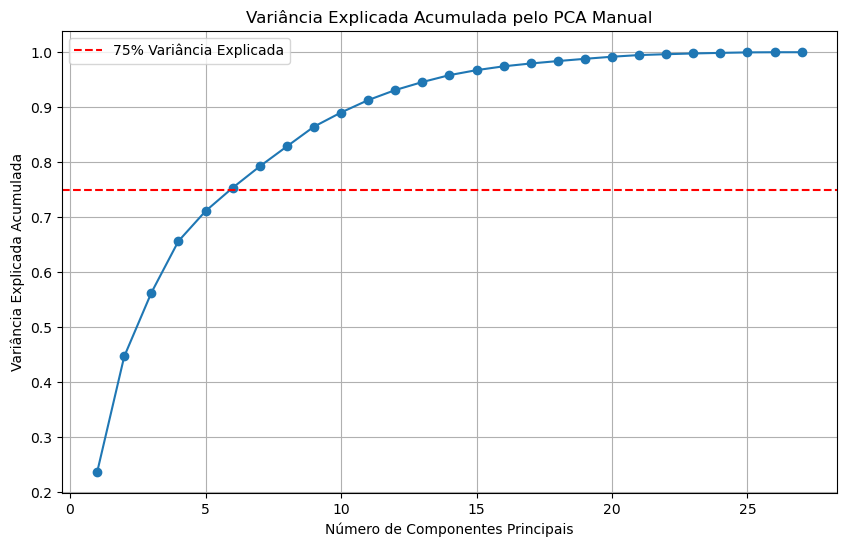

Shape das componentes principais selecionadas: (6, 27)


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para normalizar os dados usando z-score
def normalize_features(features):
    means = np.mean(features, axis=0)
    stds = np.std(features, axis=0)
    normalized_features = (features - means) / stds
    return normalized_features, means, stds

# Função para calcular PCA manualmente usando SVD
def pca_manual(features, num_components=None):
    # Calcular SVD da matriz de características
    U, S, Vt = np.linalg.svd(features, full_matrices=False)
    
    # Variância explicada por cada componente principal
    eigenvalues = (S ** 2) / (features.shape[0] - 1)
    explained_variance = eigenvalues / np.sum(eigenvalues)
    
    # Selecionar o número de componentes principais
    if num_components is not None:
        Vt = Vt[:num_components]
    
    # Transformar os dados
    transformed_data = np.dot(features, Vt.T)
    
    return transformed_data, explained_variance, Vt

# 1. Carregar os dados de features do arquivo CSV
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# 2. Selecionar apenas as colunas de features para o PCA (removendo 'filename' e 'class' se presentes)
feature_columns = df_features.columns.drop(["filename", "class"], errors='ignore')
features = df_features[feature_columns].values

# Verificar valores NaN ou infinitos
print("Valores NaN nas features:", np.isnan(features).any())
print("Valores infinitos nas features:", np.isinf(features).any())

# Remover colunas com std = 0
stds = np.std(features, axis=0)
features = features[:, stds != 0]

# 3. Normalizar os dados usando o z-score
features_normalized, means, stds = normalize_features(features)

# 4. Aplicar PCA manualmente usando SVD
transformed_data, explained_variance, eigenvectors = pca_manual(features_normalized)

# 5. Variância explicada por cada componente principal
cumulative_variance = np.cumsum(explained_variance)
num_components_75 = np.argmax(cumulative_variance >= 0.75) + 1

# Exibir resultados
print(f"Número de componentes necessários para explicar 75% da variância: {num_components_75}")
print("Variância explicada por cada componente principal:", explained_variance)

# 6. Visualizar a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada Acumulada pelo PCA Manual")
plt.axhline(y=0.75, color='r', linestyle='--', label="75% Variância Explicada")
plt.legend()
plt.grid()
plt.show()

# 7. Componentes principais
components_shape = eigenvectors[:num_components_75].shape
print(f"Shape das componentes principais selecionadas: {components_shape}")


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Carregar os dados de features do arquivo CSV
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# 2. Selecionar apenas as colunas de features para o PCA (removendo 'filename' e 'class' se presentes)
feature_columns = df_features.columns.drop(["filename", "class"], errors='ignore')
features = df_features[feature_columns].values

# Verificar e tratar valores NaN ou infinitos
features[np.isnan(features)] = 0
features[np.isinf(features)] = 0

# Remover colunas com desvio padrão zero
stds = np.std(features, axis=0)
features = features[:, stds != 0]

# 3. Normalizar os dados usando o z-score
features_normalized, means, stds = normalize_features(features)

# Verificação adicional para NaN ou infinitos após a normalização
features_normalized[np.isnan(features_normalized)] = 0
features_normalized[np.isinf(features_normalized)] = 0

# 4. Aplicar PCA manualmente usando SVD
transformed_data, explained_variance, eigenvectors = pca_manual(features_normalized)

# 5. Determinar o número de componentes necessários para explicar 75% da variabilidade
cumulative_variance = np.cumsum(explained_variance)
num_components_75 = np.argmax(cumulative_variance >= 0.75) + 1

# 6. Selecionar apenas as primeiras 5 componentes
transformed_data_75 = transformed_data[:, :num_components_75]

# 7. Criar um DataFrame com as componentes principais transformadas
pca_transformed_df = pd.DataFrame(transformed_data_75, columns=[f'PC{i+1}' for i in range(num_components_75)])
pca_transformed_df.insert(0, 'filename', df_features['filename'])
pca_transformed_df.insert(1, 'class', df_features['class'])

# 8. Guardar o DataFrame transformado em um arquivo CSV
pca_transformed_df.to_csv('pca_transformed_features.csv', index=False)

print("CSV com as features transformadas foi criado com sucesso e guardado como 'pca_transformed_features.csv'")


CSV com as features transformadas foi criado com sucesso e guardado como 'pca_transformed_features.csv'


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Função para normalizar um novo som usando os mesmos parâmetros de normalização
def normalize_new_sound(new_sound, means, stds):
    return (new_sound - means) / stds

# Função para transformar um novo som usando PCA
def transform_new_sound(new_sound, means, stds, eigenvectors, num_components):
    # Normalizar o novo som
    new_sound_normalized = normalize_new_sound(new_sound, means, stds)
    
    # Aplicar a transformação PCA usando os autovetores selecionados
    new_sound_pca = np.dot(new_sound_normalized, eigenvectors[:num_components].T)
    
    return new_sound_pca

# Exemplo de uso com um novo som
# Suponha que new_sound seja um DataFrame com as características de um novo som
new_sound = pd.DataFrame({
    'feature1': [1.2],
    'feature2': [0.8],
    'feature3': [-0.6],
    'feature4': [2.1],
    'feature5': [1.9],
    'feature6': [3.4],
    'feature7': [2.3],
    'feature8': [2.8],
    'feature9': [1.6],
    'feature10': [1.2],
    'feature11': [0.7],
    'feature12': [0.8],
    'feature13': [2.9],
    'feature14': [1.4],
    'feature15': [2.1],
    'feature16': [2.2],
    'feature17': [1.5],
    'feature18': [2.3],
    'feature19': [1.8],
    'feature20': [2.0],
    'feature21': [2.5],
    'feature22': [2.7],
    'feature23': [2.0],
    'feature24': [2.5],
    'feature25': [3.7],
    'feature26': [1.7],
    'feature27': [1.7]
})

# Normalizar e transformar o novo som
new_sound_normalized = normalize_new_sound(new_sound, means, stds)
new_sound_transformed = transform_new_sound(new_sound.values, means, stds, eigenvectors, num_components_75)

# Exibir as componentes transformadas do novo som
print("Componentes transformadas do novo som:", new_sound_transformed)


Componentes transformadas do novo som: [[ 20608.5093652  -56842.47705607   1711.30790577 -32970.36402946
   38879.62713941 -49202.35985495]]


In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

# Função para calcular o Fisher Score
def fisher_score(features, labels):
    scores = []
    unique_classes = np.unique(labels)
    for col in features.columns:
        feature_values = [features[labels == c][col].values for c in unique_classes]
        # Calcula a estatística F para cada feature
        if any(np.all(feature == feature[0]) for feature in feature_values):  # Verifica se todos os valores são iguais
            scores.append(0)
        else:
            f_score, _ = f_oneway(*feature_values)
            scores.append(f_score)
    return np.array(scores)

# Função para calcular o ReliefF manualmente
def reliefF_score_manual (features,labels, n_neighbors=100):
    n_instances, n_features = features.shape
    scores = np.zeros(n_features)
    classes = np.unique(labels)

    for i in range(n_instances):
        instance = features[i]
        true_label = labels[i]

        # Encontrar os n_neighbors mais próximos
        distances = np.linalg.norm(features - instance, axis=1)
        neighbor_indices = np.argsort(distances)[1:n_neighbors+1]
        
        hit_distances = []
        miss_distances = {c: [] for c in classes if c != true_label}

        for idx in neighbor_indices:
            neighbor_label = labels[idx]
            if neighbor_label == true_label:
                hit_distances.append(features[idx] - instance)
            else:
                miss_distances[neighbor_label].append(features[idx] - instance)

        # Atualizar os scores
        for j in range(n_features):
            scores[j] -= np.sum([hd[j] for hd in hit_distances]) / n_neighbors
            for c in miss_distances:
                scores[j] += np.sum([md[j] for md in miss_distances[c]]) / (n_neighbors * (len(classes) - 1))

    return scores / n_instances

# Certifica-te de que df_features contém a coluna 'class'
if 'class' not in df_features.columns:
    raise ValueError("A coluna 'class' não está presente no DataFrame df_features.")

# Calcular os scores para cada método
features = df_features.drop(columns=['filename'])  # Retira a coluna de filename se ainda estiver presente
labels = features['class']
features_only = features.drop(columns=['class'])

# Remover features constantes (sem variação)
features_only = features_only.loc[:, features_only.apply(pd.Series.nunique) != 1]

# Calcula os scores para Fisher e ReliefF
fisher_scores = fisher_score(features_only, labels)
relief_scores = reliefF_score_manual(features_only.values, labels.values)

# Top 10 features pelo Fisher Score
top10_fisher_indices = np.argsort(fisher_scores)[-10:][::-1]
top10_fisher_features = features_only.columns[top10_fisher_indices]
print("Top 10 features (Fisher Score):", top10_fisher_features)

# Top 10 features pelo ReliefF
top10_relief_indices = np.argsort(relief_scores)[-10:][::-1]
top10_relief_features = features_only.columns[top10_relief_indices]
print("Top 10 features (ReliefF):", top10_relief_features)


Top 10 features (Fisher Score): Index(['harmonic_to_noise_ratio', 'spectral_flatness', 'spectral_centroid',
       'spectral_rolloff', 'spectral_entropy', 'spectral_bandwidth',
       'energy_entropy', 'wavelet_entropy', 'mean_zcr', 'spectral_contrast'],
      dtype='object')
Top 10 features (ReliefF): Index(['chroma', 'pitch', 'spectral_centroid', 'spectral_rolloff',
       'signal_energy', 'wavelet_energy', 'stft_std', 'wavelet_entropy',
       'energy_entropy', 'harmonic_to_noise_ratio'],
      dtype='object')


In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import f_oneway

# Certifica-te de que df_features contém a coluna 'class'
if 'class' not in df_features.columns:
    raise ValueError("A coluna 'class' não está presente no DataFrame df_features.")

# Calcular os scores para cada método
features = df_features.drop(columns=['filename'])  # Retira a coluna de filename se ainda estiver presente
labels = features['class']
features_only = features.drop(columns=['class'])

# Remover features constantes (sem variação)
features_only = features_only.loc[:, features_only.apply(pd.Series.nunique) != 1]

# Calcula os scores para Fisher e ReliefF
fisher_scores = fisher_score(features_only, labels)
relief_scores = reliefF_score_manual(features_only.values, labels.values)

# Top 10 features pelo Fisher Score
top10_fisher_indices = np.argsort(fisher_scores)[-10:][::-1]
top10_fisher_features = features_only.columns[top10_fisher_indices]

# Top 10 features pelo ReliefF
top10_relief_indices = np.argsort(relief_scores)[-10:][::-1]
top10_relief_features = features_only.columns[top10_relief_indices]

# Criar um DataFrame apenas com as top 10 características
top_features_df_fisher = df_features[['filename', 'class'] + top10_fisher_features.tolist()]
top_features_df_reliefF = df_features[['filename', 'class'] + top10_relief_features.tolist()]

# Guardar os resultados num ficheiro CSV
top_features_df_fisher.to_csv('top_10_features_fisher.csv', index=False)
top_features_df_reliefF.to_csv('top_10_features_reliefF.csv', index=False)

print("Resultados guardados nos ficheiros 'top_10_features_fisher.csv' e 'top_10_features_reliefF.csv'")


Resultados guardados nos ficheiros 'top_10_features_fisher.csv' e 'top_10_features_reliefF.csv'


In [31]:
import pandas as pd
import numpy as np

# Função para retornar as top 10 características para um novo som
def top_10_features(new_sound, method='fisher'):
    if method == 'fisher':
        selected_features = top10_fisher_features
    elif method == 'reliefF':
        selected_features = top10_relief_features
    else:
        raise ValueError("Método inválido. Escolha 'fisher' ou 'reliefF'.")
    
    # Selecionar as top 10 características do novo som
    top_features = new_sound[selected_features]
    return top_features, selected_features

# Exemplo de uso com um novo som
new_sound = pd.DataFrame({
    'spectral_contrast': [0.5],
    'harmonic_to_noise_ratio': [0.6],
    'spectral_flatness': [0.3],
    'chroma': [0.7],
    'spectral_centroid': [0.5],
    'spectral_rolloff': [0.4],
    'spectral_entropy': [0.5],
    'spectral_bandwidth': [0.6],
    'energy_entropy': [0.3],
    'mean_zcr': [0.2],
    'pitch': [0.4],
    'signal_energy': [0.7],
    'cepstral_peak_prominence': [0.6],
    'mean_time': [0.5],
    'delta_mfcc_mean': [0.4],
    'delta_delta_mfcc_mean': [0.3],
    'duration': [0.2],
    'mfcc_mean': [0.4],
    'skewness': [0.3],
    'tonnetz': [0.5]
})

# Normalizar o novo som com os mesmos parâmetros de normalização
means = np.mean(df_features.drop(columns=['filename', 'class']), axis=0)
stds = np.std(df_features.drop(columns=['filename', 'class']), axis=0)
new_sound_normalized = (new_sound - means) / stds

# Transformar o novo som
top_features, feature_names = top_10_features(new_sound_normalized, method='fisher')

print("Top 10 Features (Fisher Score):")
print(top_features)


Top 10 Features (Fisher Score):
   harmonic_to_noise_ratio  spectral_flatness  spectral_centroid  \
0                -0.310651            0.32018          -2.318899   

   spectral_rolloff  spectral_entropy  spectral_bandwidth  energy_entropy  \
0         -1.986091        -15.305119           -3.109952      -12.957707   

   wavelet_entropy      mean_zcr  spectral_contrast  
0              NaN  35826.089726          -0.222315  


1.Divisão de dados e métricas de desempenho.

1.1. Divisão de dados. Utilizando a biblioteca scikit-learn, implemente funções para a divisão de dados considerando três abordagens:

1.1.1.Divisão Train-Test (TT) 


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar o ficheiro CSV, ignorando a primeira linha (rótulos das colunas)
data = pd.read_csv('caracteristicas_extraidas.csv', skiprows=1, header=None)

# Remover a primeira coluna (filename)
data = data.iloc[:, 1:]

# Supondo que a última coluna é a coluna de rótulos (labels)
X = data.iloc[:, :-1]  # Todas as colunas exceto a última
y = data.iloc[:, -1]   # A última coluna

def TT_split(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and testing sets.
    
    Parameters:
    X: Features
    y: Labels
    test_size: Proportion of the dataset to include in the test split
    random_state: Controls the shuffling applied to the data before applying the split
    
    Returns:
    X_train, X_test, y_train, y_test: Split data
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Aplicar a função TT_split
X_train_tt, X_test_tt, y_train_tt, y_test_tt = TT_split(X, y)

# Verificar as dimensões dos conjuntos de treino e teste
print("Dimensões do conjunto de treino:", X_train_tt.shape, y_train_tt.shape)
print("Dimensões do conjunto de teste:", X_test_tt.shape, y_test_tt.shape)

Dimensões do conjunto de treino: (12572, 27) (12572,)
Dimensões do conjunto de teste: (3143, 27) (3143,)


1.1.2.Divisão TVT , usando a divisão TT

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

def TVT_split(X, y, val_size=0.2, test_size=0.2, random_state=42):
    """
    Divida os dados em conjuntos de treino, validação e teste.

    Parâmetros:
    X: Features
    y: Labels
    val_size: Proporção do conjunto de treino que será usada para validação
    test_size: Proporção do dataset completo para teste
    random_state: Controle para a aleatoriedade

    Retorna:
    X_train, X_val, X_test, y_train, y_val, y_test: Dados divididos
    """
    # Primeiro split: separa o conjunto de teste
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Ajustar o val_size relativo ao tamanho restante
    val_relative_size = val_size / (1 - test_size)
    
    # Segundo split: separa validação do conjunto de treino
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_relative_size, random_state=random_state
    )
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Carregar o ficheiro CSV
data = pd.read_csv('caracteristicas_extraidas.csv')

# Remover a primeira linha (nomes das features) e a primeira coluna (filenames)
data = data.iloc[1:, 1:].reset_index(drop=True)  # Resetar índice para evitar problemas

# Supondo que a última coluna é a coluna de rótulos (labels)
X = data.iloc[:, :-1]  # Todas as colunas exceto a última
y = data.iloc[:, -1]   # A última coluna
# Aplicar a função TVT_split
X_train_tvt, X_val_tvt, X_test_tvt, y_train_tvt, y_val_tvt, y_test_tvt = TVT_split(X, y)

# Verificar as dimensões dos conjuntos
print("Dimensões do conjunto de treino:", X_train_tvt.shape, y_train_tvt.shape)
print("Dimensões do conjunto de validação:", X_val_tvt.shape, y_val_tvt.shape)
print("Dimensões do conjunto de teste:", X_test_tvt.shape, y_test_tvt.shape)


Dimensões do conjunto de treino: (9428, 27) (9428,)
Dimensões do conjunto de validação: (3143, 27) (3143,)
Dimensões do conjunto de teste: (3143, 27) (3143,)


1.1.3.K-Fold Cross-Validation 

In [3]:
from sklearn.model_selection import KFold

def k_fold_split(X, y, n_splits=5, random_state=42):
    """
    Splits the data into K-Folds for cross-validation.
    
    Parameters:
    X: Features
    y: Labels
    n_splits: Number of folds
    random_state: Controls the shuffling applied to the data before applying the split
    
    Returns:
    List of tuples containing train and test indices for each fold
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    folds = [(train_index, test_index) for train_index, test_index in kf.split(X)]
    return folds

# Apply the function to get the K-Fold splits
folds = k_fold_split(X, y)

# Example of how to use the folds
for i, (train_index, test_index) in enumerate(folds):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    print(f"Fold {i+1}:")
    print("  Train set size:", X_train_kf.shape, y_train_kf.shape)
    print("  Test set size:", X_test_kf.shape, y_test_kf.shape)

Fold 1:
  Train set size: (12571, 27) (12571,)
  Test set size: (3143, 27) (3143,)
Fold 2:
  Train set size: (12571, 27) (12571,)
  Test set size: (3143, 27) (3143,)
Fold 3:
  Train set size: (12571, 27) (12571,)
  Test set size: (3143, 27) (3143,)
Fold 4:
  Train set size: (12571, 27) (12571,)
  Test set size: (3143, 27) (3143,)
Fold 5:
  Train set size: (12572, 27) (12572,)
  Test set size: (3142, 27) (3142,)


1.1.4.Comentar as vantagens e desvantagens de cada um dos approachs

Train-Test Split (TT Split): Simples e eficiente, é ideal para datasets grandes, pois divide os dados em treino e teste rapidamente. Contudo, sofre com variabilidade, especialmente em datasets pequenos, e pode não representar bem todas as partes do conjunto de dados, limitando a avaliação da generalização do modelo.

Train-Validation-Test Split (TVT Split): Útil para pipelines completos, separa dados para treino, validação e teste, permitindo ajuste de hiperparâmetros sem expor o conjunto de teste. Porém, reduz os dados disponíveis para treino, sendo menos eficiente em datasets pequenos.

K-Fold Cross-Validation: Excelente para avaliações robustas, usa o dataset inteiro ao dividir os dados em múltiplos folds, garantindo uma estimativa estável do desempenho, especialmente em datasets pequenos. No entanto, é mais complexo e computacionalmente caro, tornando-se excessivo em datasets grandes.

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

def evaluate_classification(y_true, y_pred):
    """
    Avalia o desempenho de um modelo de classificação usando várias métricas.

    Parâmetros:
    y_true: array-like de forma (n_samples,)
        Valores verdadeiros das classes.
    y_pred: array-like de forma (n_samples,)
        Valores previstos pelo modelo.

    Retorna:
    dict: Um dicionário contendo a matriz de confusão, recall, precisão e F1-score.
    """
    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')
    
    # Precisão
    precision = precision_score(y_true, y_pred, average='weighted')
    
    # F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Retornar os resultados em um dicionário
    return {
        'Confusion Matrix': conf_matrix,
        'Recall': recall,
        'Precision': precision,
        'F1-score': f1
    }

In [6]:
# Aplicar a função TVT_split
X_train, X_val, X_test, y_train, y_val, y_test = TVT_split(
    X, y, test_size=0.30, val_size=0.30, random_state=42
)

# Verificar as dimensões dos conjuntos de treino, validação e teste
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 6285
Tamanho do conjunto de validação: 4714
Tamanho do conjunto de teste: 4715


In [7]:
#Exercício 2.1.2

from sklearn.model_selection import train_test_split, StratifiedKFold
import pandas as pd

df_features = pd.read_csv("caracteristicas_extraidas.csv")

X = df_features.drop(columns=["filename", "class"])
y = df_features["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

folds = k_fold_split(X_train, y_train)

for fold_idx, (train_index, val_index) in enumerate(folds):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    print(f"Fold {fold_idx + 1}:")
    print(f"  Treino: {len(X_train_kf)} amostras")
    print(f"  Validação: {len(X_val_kf)} amostras")
    print()


Tamanho do conjunto de treino: 11000
Tamanho do conjunto de teste: 4715
Fold 1:
  Treino: 8800 amostras
  Validação: 2200 amostras

Fold 2:
  Treino: 8800 amostras
  Validação: 2200 amostras

Fold 3:
  Treino: 8800 amostras
  Validação: 2200 amostras

Fold 4:
  Treino: 8800 amostras
  Validação: 2200 amostras

Fold 5:
  Treino: 8800 amostras
  Validação: 2200 amostras



In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Carregar os dados
df_features_tt = pd.read_csv("caracteristicas_extraidas.csv")

# Separar features (X) e classes (y)
X_tt = df_features_tt.drop(columns=["filename", "class"])
y_tt = df_features_tt["class"]

# Função de normalização (do Módulo A)
def normalize_features_tt(features):
    means_tt = features.mean(axis=0)
    stds_tt = features.std(axis=0)
    normalized_features_tt = (features - means_tt) / stds_tt
    return normalized_features_tt, means_tt, stds_tt

# Normalizar os dados de treino
X_tt_normalized, train_means_tt, train_stds_tt = normalize_features_tt(X_tt)

# Função para dividir em K-Folds
def k_fold_split_tt(X, y, n_splits=5, random_state=42):
    skf_tt = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    folds_tt = list(skf_tt.split(X, y))
    return folds_tt

folds_tt = k_fold_split_tt(X_tt_normalized, y_tt)

# Função para calcular métricas
def calculate_metrics_tt(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted'),
    }

# Resultados por fold
fold_results_tt = []
knn_tt = KNeighborsClassifier(n_neighbors=15)  # Modelo kNN com k=15

for fold_idx_tt, (train_index_tt, val_index_tt) in enumerate(folds_tt):
    # Dividir o conjunto de treino e validação
    X_train_kf_tt, X_val_kf_tt = X_tt.iloc[train_index_tt], X_tt.iloc[val_index_tt]
    y_train_kf_tt, y_val_kf_tt = y_tt.iloc[train_index_tt], y_tt.iloc[val_index_tt]
    
    # Normalizar o conjunto de treino e obter médias/desvios padrão
    X_train_kf_tt_normalized, kf_means_tt, kf_stds_tt = normalize_features_tt(X_train_kf_tt)
    
    # Normalizar o conjunto de validação com os mesmos parâmetros
    X_val_kf_tt_normalized = (X_val_kf_tt - kf_means_tt) / kf_stds_tt
    
    # Treinar o modelo no fold atual
    knn_tt.fit(X_train_kf_tt_normalized, y_train_kf_tt)
    
    # Prever no conjunto de validação
    y_pred_kf_tt = knn_tt.predict(X_val_kf_tt_normalized)
    
    # Calcular métricas
    metrics_tt = calculate_metrics_tt(y_val_kf_tt, y_pred_kf_tt)
    metrics_tt["Fold"] = fold_idx_tt + 1
    fold_results_tt.append(metrics_tt)

# Calcular a média das métricas dos 5 folds
mean_metrics_tt = {
    "Accuracy": sum(result["Accuracy"] for result in fold_results_tt) / len(fold_results_tt),
    "Recall": sum(result["Recall"] for result in fold_results_tt) / len(fold_results_tt),
    "Precision": sum(result["Precision"] for result in fold_results_tt) / len(fold_results_tt),
    "F1-Score": sum(result["F1-Score"] for result in fold_results_tt) / len(fold_results_tt),
}

# Resultados por fold
print("\nResultados por Fold:")
for result_tt in fold_results_tt:
    print(result_tt)

# Resultados médios
print("\nMédia dos Resultados para os 5 Folds:")
print(mean_metrics_tt)



Resultados por Fold:
{'Accuracy': 0.5348393254852052, 'Recall': 0.5348393254852052, 'Precision': 0.5215091804398748, 'F1-Score': 0.5271879470442659, 'Fold': 1}
{'Accuracy': 0.5233853006681515, 'Recall': 0.5233853006681515, 'Precision': 0.5134996006595056, 'F1-Score': 0.515257281970658, 'Fold': 2}
{'Accuracy': 0.5284759783646198, 'Recall': 0.5284759783646198, 'Precision': 0.5155320349934561, 'F1-Score': 0.5206312104043752, 'Fold': 3}
{'Accuracy': 0.5214762965319758, 'Recall': 0.5214762965319758, 'Precision': 0.5278855208976823, 'F1-Score': 0.514234042490324, 'Fold': 4}
{'Accuracy': 0.5437480114540248, 'Recall': 0.5437480114540248, 'Precision': 0.541632941138942, 'F1-Score': 0.5361256343334158, 'Fold': 5}

Média dos Resultados para os 5 Folds:
{'Accuracy': 0.5303849825007954, 'Recall': 0.5303849825007954, 'Precision': 0.5240118556258923, 'F1-Score': 0.5226872232486077}


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Carregar os dados
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# Separar features (X) e classes (y)
X = df_features.drop(columns=["filename", "class"])
y = df_features["class"]

# Divisão dos dados usando a função TVT_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Função de normalização (do Módulo A)
def normalize_features(features):
    means = features.mean(axis=0)
    stds = features.std(axis=0)
    normalized_features = (features - means) / stds
    return normalized_features, means, stds

# Normalizar os dados de treino
X_train_normalized, train_means, train_stds = normalize_features(X_train)

# Aplicar os mesmos parâmetros de normalização às partições de validação
X_val_normalized = (X_val - train_means) / train_stds

# Função para calcular métricas
def calculate_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted'),
    }

# Modelo kNN com k=15
knn = KNeighborsClassifier(n_neighbors=15)

# Treinar no conjunto de treino
knn.fit(X_train_normalized, y_train)

# Avaliar no conjunto de treino
y_pred_train = knn.predict(X_train_normalized)
train_metrics = calculate_metrics(y_train, y_pred_train)

# Avaliar no conjunto de validação
y_pred_val = knn.predict(X_val_normalized)
val_metrics = calculate_metrics(y_val, y_pred_val)

# Resultados
print("\nResultados no Conjunto de Treino:")
print(train_metrics)

print("\nResultados no Conjunto de Validação:")
print(val_metrics)



Resultados no Conjunto de Treino:
{'Accuracy': 0.6007272727272728, 'Recall': 0.6007272727272728, 'Precision': 0.6012711727991689, 'F1-Score': 0.5914991085112653}

Resultados no Conjunto de Validação:
{'Accuracy': 0.5244962884411453, 'Recall': 0.5244962884411453, 'Precision': 0.5191486205102559, 'F1-Score': 0.5169191749091256}


In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold

# Carregar os dados
df_features_tt = pd.read_csv("caracteristicas_extraidas.csv")

# Separar features (X) e classes (y)
X_tt = df_features_tt.drop(columns=["filename", "class"])
y_tt = df_features_tt["class"]

# Identificar e codificar colunas categóricas em X
categorical_columns = X_tt.select_dtypes(include=['object']).columns
X_tt[categorical_columns] = X_tt[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

# Função de normalização (do Módulo A)
def normalize_features_tt(features):
    means_tt = features.mean(axis=0)
    stds_tt = features.std(axis=0)
    normalized_features_tt = (features - means_tt) / stds_tt
    return normalized_features_tt, means_tt, stds_tt

# Normalizar os dados de treino
X_tt_normalized, train_means_tt, train_stds_tt = normalize_features_tt(X_tt)

# Função para dividir em K-Folds
def k_fold_split_tt(X, y, n_splits=5, random_state=42):
    skf_tt = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    folds_tt = list(skf_tt.split(X, y))
    return folds_tt

folds_tt = k_fold_split_tt(X_tt_normalized, y_tt)

# Função para calcular métricas
def calculate_metrics_tt(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted'),
    }

# Resultados por fold
fold_results_tt = []
knn_tt = KNeighborsClassifier(n_neighbors=15)  # Modelo kNN com k=15

for fold_idx_tt, (train_index_tt, val_index_tt) in enumerate(folds_tt):
    # Dividir o conjunto de treino e validação
    X_train_tt, X_val_tt = X_tt.iloc[train_index_tt], X_tt.iloc[val_index_tt]
    y_train_tt, y_val_tt = y_tt.iloc[train_index_tt], y_tt.iloc[val_index_tt]
    
    # Codificar categorias (necessário caso seja categórico no subset)
    X_train_tt[categorical_columns] = X_train_tt[categorical_columns].astype('category').apply(lambda x: x.cat.codes)
    X_val_tt[categorical_columns] = X_val_tt[categorical_columns].astype('category').apply(lambda x: x.cat.codes)
    
    # Normalizar o conjunto de treino e obter médias/desvios padrão
    X_train_tt_normalized, kf_means_tt, kf_stds_tt = normalize_features_tt(X_train_kf_tt)
    
    # Normalizar o conjunto de validação com os mesmos parâmetros
    X_val_tt_normalized = (X_val_tt - kf_means_tt) / kf_stds_tt
    
    # Treinar o modelo no fold atual
    knn_tt.fit(X_train_tt_normalized, y_train_tt)
    
    # Prever no conjunto de validação
    y_pred_tt = knn_tt.predict(X_val_tt_normalized)
    
    # Calcular métricas
    metrics_tt = calculate_metrics_tt(y_val_kf_tt, y_pred_kf_tt)
    metrics_tt["Fold"] = fold_idx_tt + 1
    fold_results_tt.append(metrics_tt)

# Calcular a média das métricas dos 5 folds
mean_metrics_tt = {
    "Accuracy": sum(result["Accuracy"] for result in fold_results_tt) / len(fold_results_tt),
    "Recall": sum(result["Recall"] for result in fold_results_tt) / len(fold_results_tt),
    "Precision": sum(result["Precision"] for result in fold_results_tt) / len(fold_results_tt),
    "F1-Score": sum(result["F1-Score"] for result in fold_results_tt) / len(fold_results_tt),
}

# Resultados por fold
print("\nResultados por Fold:")
for result_tt in fold_results_tt:
    print(result_tt)

# Resultados médios
print("\nMédia dos Resultados para os 5 Folds:")
print(mean_metrics_tt)



Resultados por Fold:
{'Accuracy': 0.5437480114540248, 'Recall': 0.5437480114540248, 'Precision': 0.541632941138942, 'F1-Score': 0.5361256343334158, 'Fold': 1}
{'Accuracy': 0.5437480114540248, 'Recall': 0.5437480114540248, 'Precision': 0.541632941138942, 'F1-Score': 0.5361256343334158, 'Fold': 2}
{'Accuracy': 0.5437480114540248, 'Recall': 0.5437480114540248, 'Precision': 0.541632941138942, 'F1-Score': 0.5361256343334158, 'Fold': 3}
{'Accuracy': 0.5437480114540248, 'Recall': 0.5437480114540248, 'Precision': 0.541632941138942, 'F1-Score': 0.5361256343334158, 'Fold': 4}
{'Accuracy': 0.5437480114540248, 'Recall': 0.5437480114540248, 'Precision': 0.541632941138942, 'F1-Score': 0.5361256343334158, 'Fold': 5}

Média dos Resultados para os 5 Folds:
{'Accuracy': 0.5437480114540248, 'Recall': 0.5437480114540248, 'Precision': 0.541632941138942, 'F1-Score': 0.5361256343334158}


In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Função para avaliar todas as features individualmente
def evaluate_features(X_train, y_train, n_neighbors=3):
    """
    Avalia todas as features individualmente no Train Set.

    Parâmetros:
    - X_train: Matriz de treino normalizada.
    - y_train: Labels de treino.
    - n_neighbors: Número de vizinhos para o kNN.

    Retorna:
    - Um dicionário com o nome das features e as respectivas acurácias.
    """
    feature_scores = {}
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    for i, feature_name in enumerate(X.columns):
        # Selecionar uma única feature (coluna)
        X_train_feature = X_train[:, i].reshape(-1, 1)
        
        # Treinar o modelo com a feature
        knn.fit(X_train_feature, y_train)
        
        # Avaliar a acurácia no treino
        accuracy = knn.score(X_train_feature, y_train)
        
        # Armazenar o resultado
        feature_scores[feature_name] = accuracy
    
    return feature_scores

# Carregar os dados
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# Separar features (X) e classes (y)
X = df_features.drop(columns=["filename", "class"])
y = df_features["class"]

# Divisão dos dados entre treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar os dados
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

# Avaliar todas as features no conjunto de treino
feature_scores = evaluate_features(X_train_normalized, y_train)

# Criar um DataFrame com os resultados
ranking_df = pd.DataFrame({
    "Feature": list(feature_scores.keys()),
    "Train Accuracy": list(feature_scores.values())
}).sort_values(by="Train Accuracy", ascending=False)

# Exibir o ranking completo das features
print("Implementação no TVT")
print("Ranking Completo das Features (Baseado no Train Set):")
print(ranking_df)

# Avaliar o modelo utilizando todas as features para referência
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_normalized, y_train)

# Acurácia no conjunto de treino
train_accuracy_all_features = knn.score(X_train_normalized, y_train)

# Acurácia no conjunto de validação
val_accuracy_all_features = knn.score(X_val_normalized, y_val)

# Exibir as acurácias no conjunto de treino e validação
print(f"\nAcurácia no Train Set usando todas as features: {train_accuracy_all_features:.2f}")
print(f"Acurácia no Validation Set usando todas as features: {val_accuracy_all_features:.2f}")


Implementação no TVT
Ranking Completo das Features (Baseado no Train Set):
                     Feature  Train Accuracy
12          spectral_entropy        0.589273
9         spectral_bandwidth        0.585455
8          spectral_centroid        0.583273
11         spectral_flatness        0.583091
22            energy_entropy        0.574909
26           wavelet_entropy        0.572364
14   harmonic_to_noise_ratio        0.567909
10          spectral_rolloff        0.565909
4                   kurtosis        0.556455
2               crest_factor        0.550818
13         spectral_contrast        0.544273
3              signal_energy        0.543455
1                   mean_rms        0.541727
19  cepstral_peak_prominence        0.541182
24                  stft_std        0.539818
25            wavelet_energy        0.538182
18     delta_delta_mfcc_mean        0.538091
23                 stft_mean        0.535182
20                    chroma        0.534818
16                 mfcc_m

Implementação no TT_split com 5 folds


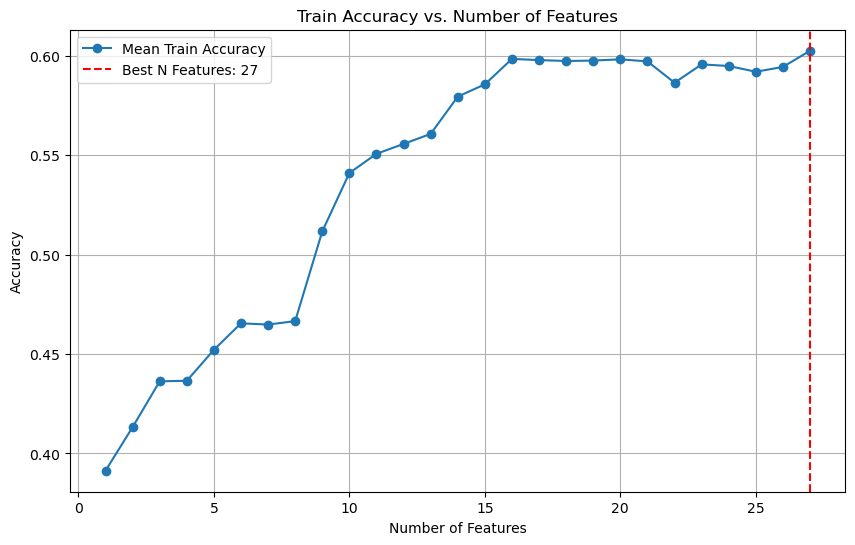

Melhor número de features (baseado no treino): 27
    N Features  Mean Train Accuracy  Std Train Accuracy
0            1             0.391326            0.002261
1            2             0.413260            0.002938
2            3             0.436307            0.004774
3            4             0.436565            0.004618
4            5             0.452156            0.000969
5            6             0.465479            0.002473
6            7             0.464862            0.001938
7            8             0.466592            0.002423
8            9             0.511752            0.001597
9           10             0.541103            0.002801
10          11             0.550768            0.002799
11          12             0.555739            0.002324
12          13             0.560790            0.002300
13          14             0.579542            0.000692
14          15             0.585726            0.001990
15          16             0.598513            0.00258

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Avaliar modelos variando o número de features para cada fold
results = []

# Número de vizinhos
n_neighbors = 15

# Configuração dos folds (5-fold cross-validation)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for n_features in range(1, X_train_tt_normalized.shape[1] + 1):
    fold_train_accuracies = []

    # Dividir os dados em 5 folds
    for train_index_tt, _ in kf.split(X_train_tt, y_train_tt):  # Não precisamos do índice de teste
        # Dividir os dados em treino (sem o teste)
        X_train_kf_tt = X_train_tt.iloc[train_index_tt, :n_features]
        y_train_kf_tt = y_train_tt.iloc[train_index_tt]
        
        # Normalizar o conjunto de treino
        X_train_kf_tt_normalized, kf_means_tt, kf_stds_tt = normalize_features_tt(X_train_kf_tt)
        
        # Treinar o modelo
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_kf_tt_normalized, y_train_kf_tt)
        
        # Avaliar no conjunto de treino
        train_accuracy = knn.score(X_train_kf_tt_normalized, y_train_kf_tt)
        fold_train_accuracies.append(train_accuracy)
    
    # Armazenar a média das acurácias de treino
    results.append({
        "N Features": n_features,
        "Mean Train Accuracy": np.mean(fold_train_accuracies),
        "Std Train Accuracy": np.std(fold_train_accuracies),
    })

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Identificar o melhor número de features baseado no conjunto de treino
best_n_features_train = results_df["N Features"][results_df["Mean Train Accuracy"].idxmax()]

# Criar o gráfico
print("Implementação no TT_split com 5 folds")
plt.figure(figsize=(10, 6))
plt.plot(
    results_df["N Features"], 
    results_df["Mean Train Accuracy"], 
    label="Mean Train Accuracy", marker="o"
)

# Adicionar uma linha vertical para o melhor número de features no treino
plt.axvline(x=best_n_features_train, color="red", linestyle="--", label=f"Best N Features: {int(best_n_features_train)}")

# Configurações do gráfico
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Train Accuracy vs. Number of Features")
plt.legend()
plt.grid()
plt.show()

# Exibir os resultados
print(f"Melhor número de features (baseado no treino): {best_n_features_train}")
print(results_df)


Implementação no TVT_split


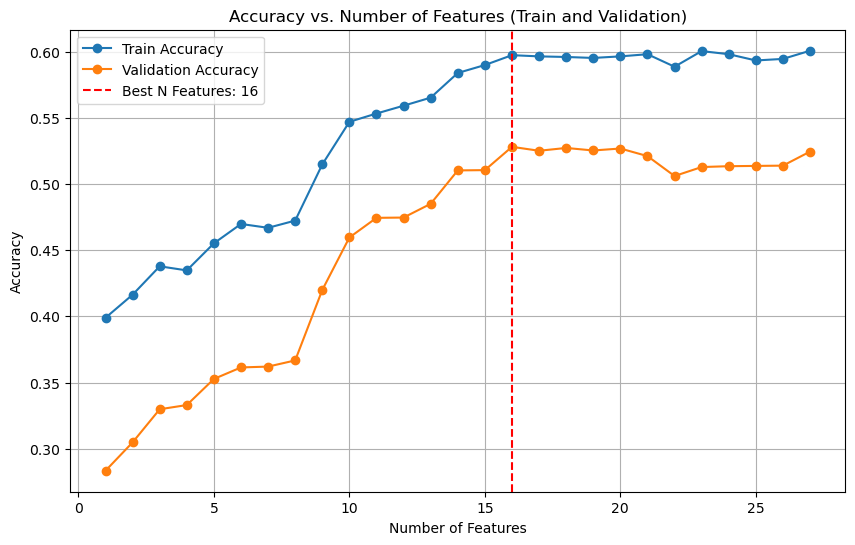

Melhor número de features (baseado na validação): 16
Acurácia no Train Set com 16 features: 0.60
Acurácia no Validation Set com 16 features: 0.53


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Avaliar modelos variando o número de features
results = []

for n_features in range(1, X_train_normalized.shape[1] + 1):
    # Selecionar as top N features utilizando indexação numpy
    if isinstance(X_train_normalized, pd.DataFrame):
        X_train_subset = X_train_normalized.iloc[:, :n_features].to_numpy()  # Usando .iloc se for DataFrame
        X_val_subset = X_val_normalized.iloc[:, :n_features].to_numpy() if isinstance(X_val_normalized, pd.DataFrame) else X_val_normalized[:, :n_features]
    else:
        X_train_subset = X_train_normalized[:, :n_features]  # Usando indexação numpy se for ndarray
        X_val_subset = X_val_normalized[:, :n_features] if isinstance(X_val_normalized, np.ndarray) else X_val_normalized.iloc[:, :n_features]
    
    # Treinar e avaliar o modelo kNN
    knn = KNeighborsClassifier(n_neighbors=15)  # Mantendo k=15 como nos códigos prévios
    knn.fit(X_train_subset, y_train)

    train_accuracy = knn.score(X_train_subset, y_train)
    val_accuracy = knn.score(X_val_subset, y_val)

    # Armazenar os resultados
    results.append({
        "N Features": n_features,
        "Train Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy
    })

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Identificar o melhor valor de acurácia no conjunto de validação
best_val_accuracy = results_df["Validation Accuracy"].max()
best_n_features_val = results_df.loc[results_df["Validation Accuracy"].idxmax(), "N Features"]

# Criar o gráfico
print("Implementação no TVT_split")
plt.figure(figsize=(10, 6))
plt.plot(results_df["N Features"], results_df["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(results_df["N Features"], results_df["Validation Accuracy"], label="Validation Accuracy", marker="o")

# Adicionar uma linha vertical para o melhor número de features
plt.axvline(x=best_n_features_val, color="red", linestyle="--", label=f"Best N Features: {int(best_n_features_val)}")

# Configurações do gráfico
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Features (Train and Validation)")
plt.legend()
plt.grid()
plt.show()

# Exibir os resultados
print(f"Melhor número de features (baseado na validação): {best_n_features_val}")
print(f"Acurácia no Train Set com {best_n_features_val} features: {results_df.loc[results_df['N Features'] == best_n_features_val, 'Train Accuracy'].values[0]:.2f}")
print(f"Acurácia no Validation Set com {best_n_features_val} features: {results_df.loc[results_df['N Features'] == best_n_features_val, 'Validation Accuracy'].values[0]:.2f}")


Implementação no TT_split com 5 folds


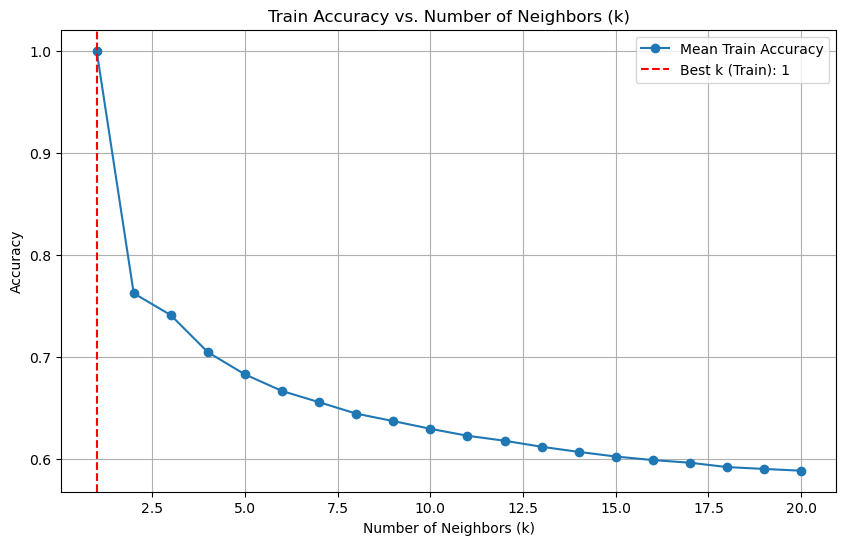

Melhor k (baseado no treino): 1
     k  Mean Train Accuracy  Std Train Accuracy
0    1             1.000000            0.000000
1    2             0.762508            0.000687
2    3             0.741071            0.003515
3    4             0.704760            0.004107
4    5             0.683046            0.002748
5    6             0.666799            0.004516
6    7             0.655822            0.004680
7    8             0.644627            0.004120
8    9             0.637349            0.003488
9   10             0.629792            0.003579
10  11             0.622972            0.004067
11  12             0.618100            0.003447
12  13             0.612174            0.001600
13  14             0.607163            0.003105
14  15             0.602629            0.002682
15  16             0.599169            0.003149
16  17             0.596564            0.003245
17  18             0.592308            0.003278
18  19             0.590479            0.004090
19  20  

In [14]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Avaliar modelos variando o número de vizinhos (k) para cada fold
results_k = []

# Faixa de valores para o número de vizinhos
k_values = range(1, 21)

# Configuração dos folds (5-fold cross-validation)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    fold_train_accuracies = []

    # Dividir os dados em 5 folds
    for train_index_tt, test_index_tt in kf.split(X_train_tt, y_train_tt):
        # Dividir os dados em treino
        X_train_kf_tt, _ = X_train_tt.iloc[train_index_tt], X_train_tt.iloc[test_index_tt]
        y_train_kf_tt, _ = y_train_tt.iloc[train_index_tt], y_train_tt.iloc[test_index_tt]
        
        # Normalizar o conjunto de treino e obter médias/desvios padrão
        X_train_kf_tt_normalized, kf_means_tt, kf_stds_tt = normalize_features_tt(X_train_kf_tt)
        
        # Treinar o modelo com o número de vizinhos k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_kf_tt_normalized, y_train_kf_tt)
        
        # Avaliar no conjunto de treino
        train_accuracy = knn.score(X_train_kf_tt_normalized, y_train_kf_tt)
        fold_train_accuracies.append(train_accuracy)
    
    # Armazenar a média da acurácia de treino
    results_k.append({
        "k": k,
        "Mean Train Accuracy": np.mean(fold_train_accuracies),
        "Std Train Accuracy": np.std(fold_train_accuracies),
    })

# Criar um DataFrame com os resultados
results_k_df = pd.DataFrame(results_k)

# Identificar o melhor k baseado no conjunto de treino
best_k_train = results_k_df["k"][results_k_df["Mean Train Accuracy"].idxmax()]

# Criar o gráfico
print("Implementação no TT_split com 5 folds")
plt.figure(figsize=(10, 6))
plt.plot(
    results_k_df["k"], 
    results_k_df["Mean Train Accuracy"], 
    label="Mean Train Accuracy", marker="o"
)

# Adicionar uma linha vertical para o melhor k baseado no treino
plt.axvline(x=best_k_train, color="red", linestyle="--", label=f"Best k (Train): {int(best_k_train)}")

# Configurações do gráfico
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Train Accuracy vs. Number of Neighbors (k)")
plt.legend()
plt.grid()
plt.show()

# Exibir os resultados
print(f"Melhor k (baseado no treino): {best_k_train}")
print(results_k_df)


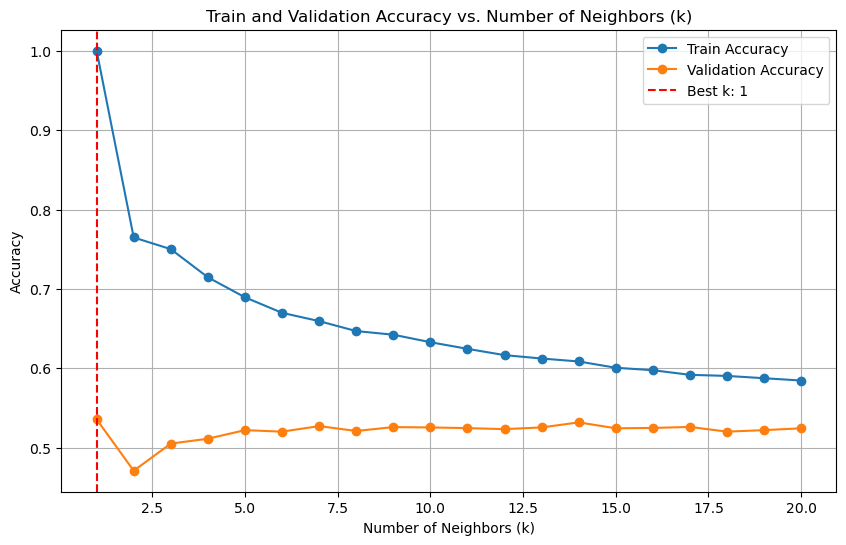

Melhor número de vizinhos (k) baseado na validação: 1
Acurácia no Train Set com k=1: 1.00
Acurácia no Validation Set com k=1: 0.54


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Avaliar modelos variando o número de vizinhos (k)
results = []

# Variar o número de vizinhos (k) de 1 até 20
for k in range(1, 21):
    # Converter os dados para arrays NumPy se forem DataFrames
    X_train_subset = X_train_normalized.to_numpy() if isinstance(X_train_normalized, pd.DataFrame) else X_train_normalized
    X_val_subset = X_val_normalized.to_numpy() if isinstance(X_val_normalized, pd.DataFrame) else X_val_normalized

    # Treinar e avaliar o modelo kNN com o valor de k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_subset, y_train)

    # Calcular as acurácias apenas para treino e validação
    train_accuracy = knn.score(X_train_subset, y_train)
    val_accuracy = knn.score(X_val_subset, y_val)

    # Armazenar os resultados
    results.append({
        "k": k,
        "Train Accuracy": train_accuracy,
        "Validation Accuracy": val_accuracy,
    })

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Identificar o melhor valor de k com base na acurácia de validação
best_val_accuracy = results_df["Validation Accuracy"].max()
best_k_val = results_df.loc[results_df["Validation Accuracy"].idxmax(), "k"]

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(results_df["k"], results_df["Train Accuracy"], label="Train Accuracy", marker="o")
plt.plot(results_df["k"], results_df["Validation Accuracy"], label="Validation Accuracy", marker="o")

# Adicionar uma linha vertical para o melhor valor de k
plt.axvline(x=best_k_val, color="red", linestyle="--", label=f"Best k: {int(best_k_val)}")

# Configurações do gráfico
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy vs. Number of Neighbors (k)")
plt.legend()
plt.grid()
plt.show()

# Exibir os resultados
print(f"Melhor número de vizinhos (k) baseado na validação: {best_k_val}")
print(f"Acurácia no Train Set com k={best_k_val}: {results_df.loc[results_df['k'] == best_k_val, 'Train Accuracy'].values[0]:.2f}")
print(f"Acurácia no Validation Set com k={best_k_val}: {results_df.loc[results_df['k'] == best_k_val, 'Validation Accuracy'].values[0]:.2f}")


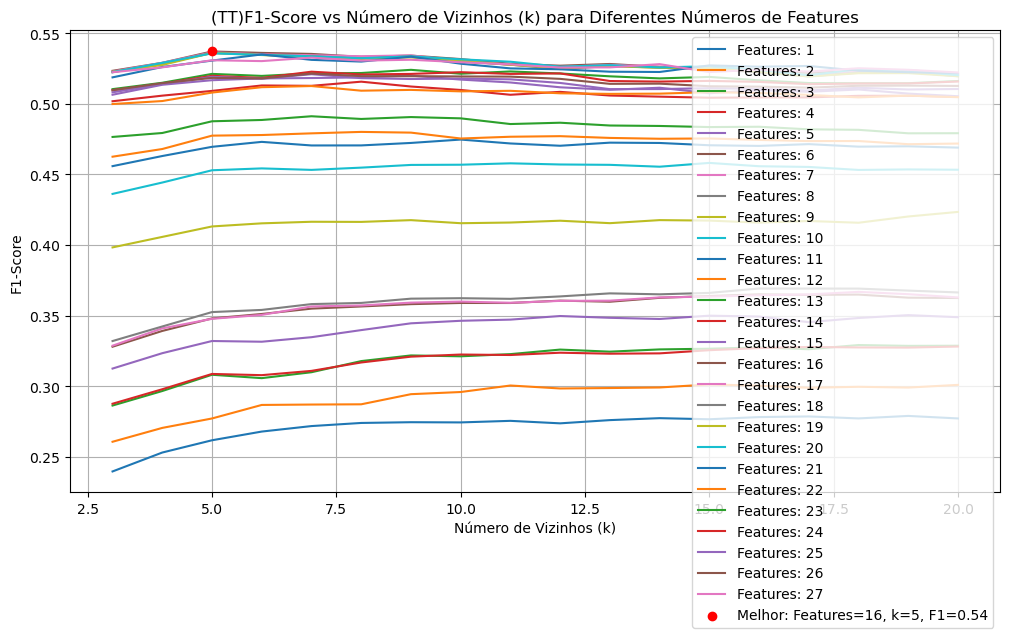

In [29]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Função para selecionar as features com base nos índices
def select_features(X, feature_indices):
    return X.iloc[:, feature_indices]

# Número de vizinhos a testar (k), ignorando k=1 e k=2
n_neighbors_range = range(3, 21)  # Começa de k=3

# Número de features a testar (1 até o número total de features)
n_features_to_test = range(1, X_tt.shape[1] + 1)  # 1 até todas as features

# Dicionário para armazenar os resultados de F1-Score
f1_scores_tt = {n_features: [] for n_features in n_features_to_test}

# Variáveis para armazenar o melhor F1-Score
best_f1 = -1
best_k = None
best_n_features = None

# Realizar a validação cruzada usando StratifiedKFold
n_splits = 5  # Número de folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Avaliação para diferentes números de features e valores de k
for n_features in n_features_to_test:
    selected_indices = range(n_features)  # Seleciona as primeiras n_features
    
    # Lista para armazenar o F1-Score de cada valor de k
    f1_scores_tt_list = []

    # Realizar validação cruzada
    for train_index, val_index in skf.split(X_tt_normalized, y_tt):
        X_train_kf_tt, X_val_kf_tt = X_tt_normalized.iloc[train_index], X_tt_normalized.iloc[val_index]
        y_train_kf_tt, y_val_kf_tt = y_tt.iloc[train_index], y_tt.iloc[val_index]

        # Selecionar as features
        X_train_selected = select_features(X_train_kf_tt, selected_indices)
        X_val_selected = select_features(X_val_kf_tt, selected_indices)

        # Testar diferentes valores de k
        f1_scores_for_k = []  # Armazenar F1-Score para cada valor de k
        for k in n_neighbors_range:
            # Criar e treinar o modelo kNN
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_selected, y_train_kf_tt)  # Treinamento com os dados de treino
            
            # Previsões no conjunto de validação
            y_pred = knn.predict(X_val_selected)
            
            # Calcular o F1-Score
            f1 = f1_score(y_val_kf_tt, y_pred, average='weighted')
            f1_scores_for_k.append(f1)
        
        # Armazenar os F1-Score para os diferentes valores de k para este número de features
        f1_scores_tt[n_features].append(f1_scores_for_k)

# Identificar a melhor combinação de features e k
for n_features, scores in f1_scores_tt.items():
    mean_scores = np.mean(scores, axis=0)  # Média dos F1-Scores para cada valor de k
    best_score_for_n_features = np.max(mean_scores)
    best_k_for_n_features = n_neighbors_range[np.argmax(mean_scores)]

    # Atualizar a melhor combinação se necessário
    if best_score_for_n_features > best_f1:
        best_f1 = best_score_for_n_features
        best_k = best_k_for_n_features
        best_n_features = n_features

# Gráfico 1: F1-Score para diferentes números de features e k
plt.figure(figsize=(12, 6))
for n_features, scores in f1_scores_tt.items():
    mean_scores = np.mean(scores, axis=0)  # Média dos F1-Scores para cada valor de k
    plt.plot(n_neighbors_range, mean_scores, label=f"Features: {n_features}")

# Adicionar ponto vermelho para a melhor combinação
plt.scatter(best_k, best_f1, color='red', 
            label=f"Melhor: Features={best_n_features}, k={best_k}, F1={best_f1:.2f}", 
            zorder=5)

plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("F1-Score")
plt.title("(TT)F1-Score vs Número de Vizinhos (k) para Diferentes Números de Features")
plt.legend()
plt.grid(True)
plt.show()


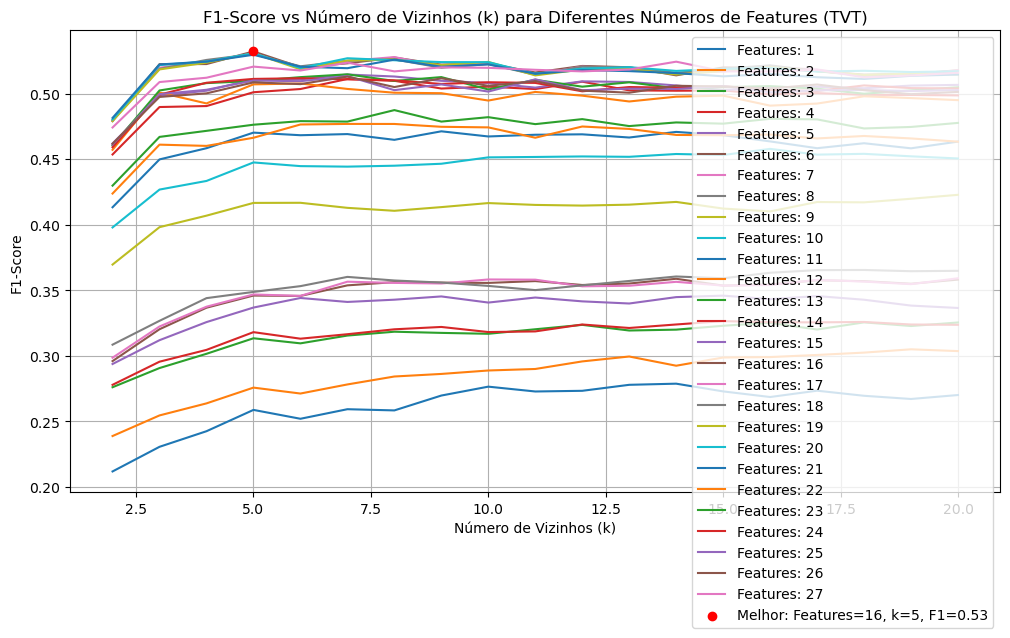

In [48]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import pandas as pd

# Carregar os dados
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# Separar features (X) e classes (y)
X = df_features.drop(columns=["filename", "class"])
y = df_features["class"]

# Divisão dos dados usando a função TVT_split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Função de normalização
def normalize_features(features):
    means = features.mean(axis=0)
    stds = features.std(axis=0)
    normalized_features = (features - means) / stds
    return normalized_features, means, stds

# Normalizar os dados de treino
X_train_normalized, train_means, train_stds = normalize_features(X_train)

# Aplicar os mesmos parâmetros de normalização às partições de validação
X_val_normalized = (X_val - train_means) / train_stds

# Função para selecionar as features com base nos índices
def select_features(X, feature_indices):
    return X.iloc[:, feature_indices]

# Número de vizinhos a testar (k)
n_neighbors_range = range(2, 21)  # Ignorar k=1, começando de k=2

# Número de features a testar (1 até o número total de features)
n_features_to_test = range(1, X.shape[1] + 1)  # 1 até todas as features

# Dicionário para armazenar os resultados de F1-Score no conjunto de validação (TVT)
f1_scores_val = {n_features: [] for n_features in n_features_to_test}

# Variáveis para guardar a melhor combinação
best_f1 = -1
best_k = None
best_n_features = None

# Avaliação para diferentes números de features e valores de k
for n_features in n_features_to_test:
    selected_indices = range(n_features)  # Seleciona as primeiras n_features
    
    # Dividir os dados em treino e validação (TVT)
    X_train_selected = select_features(X_train_normalized, selected_indices)
    X_val_selected = select_features(X_val_normalized, selected_indices)
    
    # Lista para armazenar F1-Score de cada valor de k
    f1_scores_val_list = []
    
    # Testar diferentes valores de k
    for k in n_neighbors_range:
        # Criar e treinar o modelo kNN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_selected, y_train)  # Treinamento com os dados de treino
        
        # Previsões no conjunto de validação
        y_pred = knn.predict(X_val_selected)
        
        # Calcular o F1-Score
        f1 = f1_score(y_val, y_pred, average='weighted')
        f1_scores_val_list.append(f1)
        
        # Atualizar a melhor combinação, se necessário
        if f1 > best_f1:
            best_f1 = f1
            best_k = k
            best_n_features = n_features
    
    # Armazenar F1-Score para o número atual de features
    f1_scores_val[n_features] = f1_scores_val_list

# Gráfico 1: F1-Score para diferentes números de features e k
plt.figure(figsize=(12, 6))
for n_features, scores in f1_scores_val.items():
    plt.plot(n_neighbors_range, scores, label=f"Features: {n_features}")

# Adicionar ponto vermelho para a melhor combinação
plt.scatter(best_k, best_f1, color='red', 
            label=f"Melhor: Features={best_n_features}, k={best_k}, F1={best_f1:.2f}", 
            zorder=5)

# Configurar o gráfico
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("F1-Score")
plt.title("F1-Score vs Número de Vizinhos (k) para Diferentes Números de Features (TVT)")
plt.legend()
plt.grid(True)
plt.show()



F1-Score para funções de peso no TT (dados de treino):
Peso: uniform - F1-Score: 0.7522
Peso: distance - F1-Score: 1.0000

F1-Score para funções de peso no TVT (dados de validação):
Peso: uniform - F1-Score: 0.5321
Peso: distance - F1-Score: 0.5497


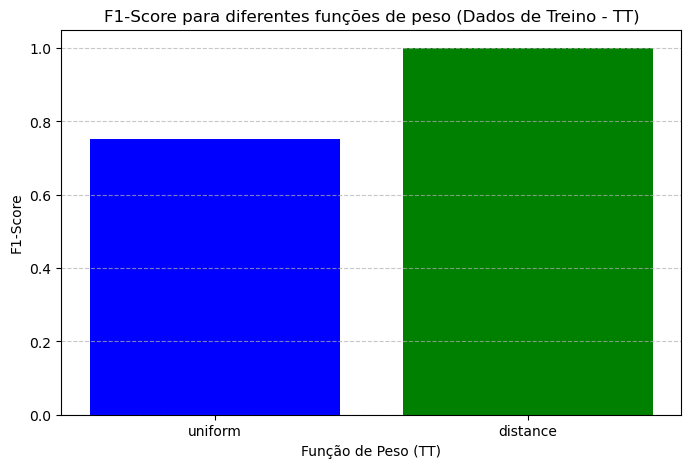

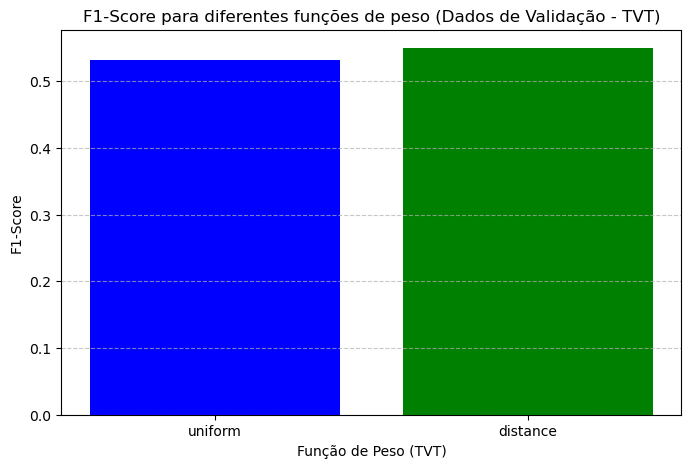

In [49]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Lista de opções de pesos
weights_options = ['uniform', 'distance']

# Parâmetros ótimos fornecidos
optimal_features_tt = 27
optimal_neighbors_tt = 3
optimal_features_tvt = 16
optimal_neighbors_tvt = 5

# Seleção das melhores features
X_train_selected_tt = X_train_normalized.iloc[:, :optimal_features_tt]
X_train_selected_tvt = X_train_normalized.iloc[:, :optimal_features_tvt]
X_val_selected_tvt = X_val_normalized.iloc[:, :optimal_features_tvt]

# Dicionários para armazenar os resultados
f1_scores_tt_weights = {}
f1_scores_tvt_weights = {}

# Avaliar diferentes funções de peso
for weight in weights_options:
    # **TT (Treino sobre os dados de treino)**
    knn_tt = KNeighborsClassifier(n_neighbors=optimal_neighbors_tt, weights=weight)
    knn_tt.fit(X_train_selected_tt, y_train)
    y_train_pred = knn_tt.predict(X_train_selected_tt)  # Previsão nos dados de treino
    f1_tt = f1_score(y_train, y_train_pred, average='weighted')
    f1_scores_tt_weights[weight] = f1_tt

    # **TVT (Validação sobre os dados de validação)**
    knn_tvt = KNeighborsClassifier(n_neighbors=optimal_neighbors_tvt, weights=weight)
    knn_tvt.fit(X_train_selected_tvt, y_train)
    y_val_pred = knn_tvt.predict(X_val_selected_tvt)  # Previsão nos dados de validação
    f1_tvt = f1_score(y_val, y_val_pred, average='weighted')
    f1_scores_tvt_weights[weight] = f1_tvt

# Exibir os resultados
print("\nF1-Score para funções de peso no TT (dados de treino):")
for weight, f1 in f1_scores_tt_weights.items():
    print(f"Peso: {weight} - F1-Score: {f1:.4f}")

print("\nF1-Score para funções de peso no TVT (dados de validação):")
for weight, f1 in f1_scores_tvt_weights.items():
    print(f"Peso: {weight} - F1-Score: {f1:.4f}")

# Plotar os resultados para TT (dados de treino)
plt.figure(figsize=(8, 5))
plt.bar(f1_scores_tt_weights.keys(), f1_scores_tt_weights.values(), color=['blue', 'green'])
plt.xlabel("Função de Peso (TT)")
plt.ylabel("F1-Score")
plt.title("F1-Score para diferentes funções de peso (Dados de Treino - TT)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotar os resultados para TVT (dados de validação)
plt.figure(figsize=(8, 5))
plt.bar(f1_scores_tvt_weights.keys(), f1_scores_tvt_weights.values(), color=['blue', 'green'])
plt.xlabel("Função de Peso (TVT)")
plt.ylabel("F1-Score")
plt.title("F1-Score para diferentes funções de peso (Dados de Validação - TVT)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



F1-Score para métricas de distância no TT (dados de treino):
Métrica: Minkowski (p=1) - F1-Score: 0.7636
Métrica: Minkowski (p=2) - F1-Score: 0.7522
Métrica: Minkowski (p=3) - F1-Score: 0.7433

F1-Score para métricas de distância no TVT (dados de validação):
Métrica: Minkowski (p=1) - F1-Score: 0.5375
Métrica: Minkowski (p=2) - F1-Score: 0.5321
Métrica: Minkowski (p=3) - F1-Score: 0.5253


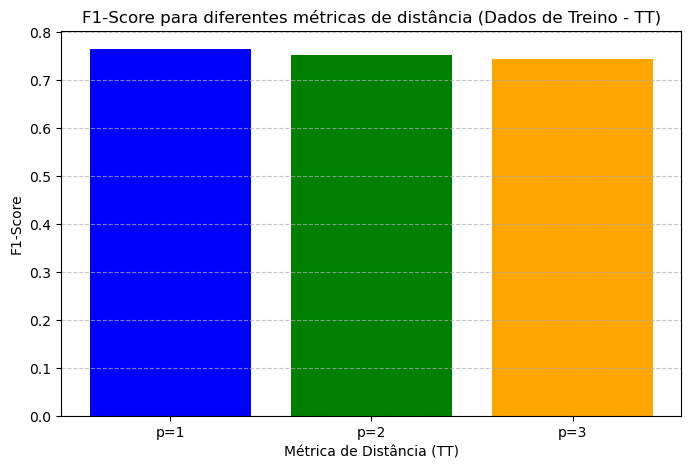

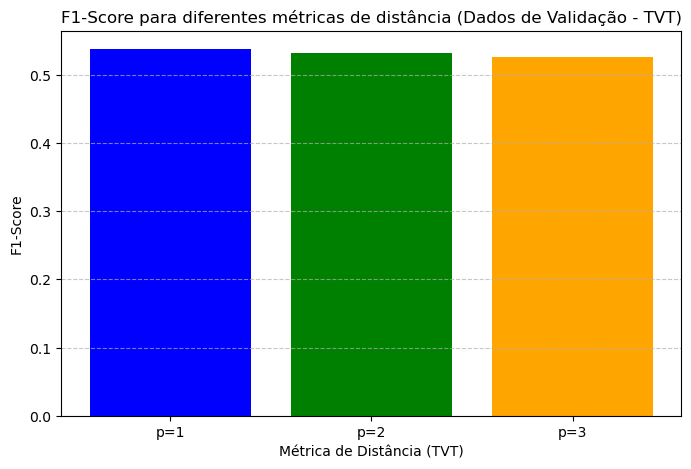

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Lista de métricas a serem testadas
distance_metrics = [1, 2, 3]  # Minkowski com p=1 (Manhattan), p=2 (Euclidean), p=3

# Dicionários para armazenar os resultados
f1_scores_tt_metrics = {}
f1_scores_tvt_metrics = {}

# Seleção das melhores features
X_train_selected_tt = X_train_normalized.iloc[:, :optimal_features_tt]
X_train_selected_tvt = X_train_normalized.iloc[:, :optimal_features_tvt]
X_val_selected_tvt = X_val_normalized.iloc[:, :optimal_features_tvt]

# Avaliar diferentes métricas de distância
for p in distance_metrics:
    # **TT (Treino sobre os dados de treino)**
    knn_tt = KNeighborsClassifier(n_neighbors=optimal_neighbors_tt, metric='minkowski', p=p)
    knn_tt.fit(X_train_selected_tt, y_train)
    y_train_pred = knn_tt.predict(X_train_selected_tt)  # Previsão nos dados de treino
    f1_tt = f1_score(y_train, y_train_pred, average='weighted')
    f1_scores_tt_metrics[p] = f1_tt

    # **TVT (Validação sobre os dados de validação)**
    knn_tvt = KNeighborsClassifier(n_neighbors=optimal_neighbors_tvt, metric='minkowski', p=p)
    knn_tvt.fit(X_train_selected_tvt, y_train)
    y_val_pred = knn_tvt.predict(X_val_selected_tvt)  # Previsão nos dados de validação
    f1_tvt = f1_score(y_val, y_val_pred, average='weighted')
    f1_scores_tvt_metrics[p] = f1_tvt

# Exibir os resultados
print("\nF1-Score para métricas de distância no TT (dados de treino):")
for p, f1 in f1_scores_tt_metrics.items():
    print(f"Métrica: Minkowski (p={p}) - F1-Score: {f1:.4f}")

print("\nF1-Score para métricas de distância no TVT (dados de validação):")
for p, f1 in f1_scores_tvt_metrics.items():
    print(f"Métrica: Minkowski (p={p}) - F1-Score: {f1:.4f}")

# Plotar os resultados para TT (dados de treino)
plt.figure(figsize=(8, 5))
plt.bar([f"p={p}" for p in distance_metrics], f1_scores_tt_metrics.values(), color=['blue', 'green', 'orange'])
plt.xlabel("Métrica de Distância (TT)")
plt.ylabel("F1-Score")
plt.title("F1-Score para diferentes métricas de distância (Dados de Treino - TT)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotar os resultados para TVT (dados de validação)
plt.figure(figsize=(8, 5))
plt.bar([f"p={p}" for p in distance_metrics], f1_scores_tvt_metrics.values(), color=['blue', 'green', 'orange'])
plt.xlabel("Métrica de Distância (TVT)")
plt.ylabel("F1-Score")
plt.title("F1-Score para diferentes métricas de distância (Dados de Validação - TVT)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

# Carregar os dados
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# Separar features (X) e classes (y)
X = df_features.drop(columns=["filename", "class"])
y = df_features["class"]

# Divisão dos dados com a função TVT_split
X_train, X_val, X_test, y_train, y_val, y_test = TVT_split(X, y)

# Função de normalização
def normalize_features(features):
    means = features.mean(axis=0)
    stds = features.std(axis=0)
    normalized_features = (features - means) / stds
    return normalized_features, means, stds

# Normalizar os dados de treino, validação e teste
X_train_normalized, train_means, train_stds = normalize_features(X_train)
X_val_normalized = (X_val - train_means) / train_stds
X_test_normalized = (X_test - train_means) / train_stds

# Selecionar as 16 features mais importantes (já dado por você como número ótimo)
X_train_normalized_selected = X_train_normalized.iloc[:, :16]
X_val_normalized_selected = X_val_normalized.iloc[:, :16]
X_test_normalized_selected = X_test_normalized.iloc[:, :16]

# Unir treino e validação
X_train_val = pd.concat([X_train_normalized_selected, X_val_normalized_selected], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=1)

# Treinar o modelo com treino + validação
knn.fit(X_train_val, y_train_val)

# Avaliação no conjunto de teste
y_test_pred = knn.predict(X_test_normalized_selected)
test_results = evaluate_classification(y_test, y_test_pred)

# Avaliação no conjunto de treino
y_train_pred = knn.predict(X_train_normalized_selected)
train_results = evaluate_classification(y_train, y_train_pred)

# Exibir os resultados
print("Resultados no conjunto de teste:")
for metric, value in test_results.items():
    print(f"{metric}: {value}")

print("\nResultados no conjunto de treino:")
for metric, value in train_results.items():
    print(f"{metric}: {value}")

Resultados no conjunto de teste:
Confusion Matrix: [[ 88   0   0   0   1   1   0]
 [  0   8  16  18  27  35  22]
 [  0   0 187  32  58  70  17]
 [  0   2  13 229  23  23   8]
 [  0   6  23  23 404 191 120]
 [  0   6  36  34 193 387  83]
 [  3   6  17   8 144  88 493]]
Recall: 0.5714285714285714
Precision: 0.5671101157641925
F1-score: 0.5647813357046061

Resultados no conjunto de treino:
Confusion Matrix: [[ 231    0    0    0    0    0    0]
 [   0  385    0    0    0    0    0]
 [   0    0  966    0    0    0    0]
 [   0    0    0  959    0    0    0]
 [   0    0    0    0 2292    0    0]
 [   0    0    0    0    0 2259    0]
 [   0    0    0    0    0    0 2337]]
Recall: 1.0
Precision: 1.0
F1-score: 1.0


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

# Carregar os dados
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# Separar features (X) e classes (y)
X = df_features.drop(columns=["filename", "class"])
y = df_features["class"]

# Dividir os dados usando a função TVT_split
X_train, X_val, X_test, y_train, y_val, y_test = TVT_split(X, y, val_size=0.2, test_size=0.2, random_state=42)

# Função de normalização
def normalize_features(train_features, val_features, test_features):
    """
    Normalizar features de treino, validação e teste.
    """
    means = train_features.mean(axis=0)
    stds = train_features.std(axis=0)
    train_normalized = (train_features - means) / stds
    val_normalized = (val_features - means) / stds
    test_normalized = (test_features - means) / stds
    return train_normalized, val_normalized, test_normalized

# Normalizar os dados
X_train_normalized, X_val_normalized, X_test_normalized = normalize_features(
    X_train, X_val, X_test
)

# Definir o modelo MLP com ajustes
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),     # Tamanho da camada oculta (100 unidades)
    activation='relu',             # Função de ativação ReLU
    solver='adam',                 # Algoritmo de otimização Adam
    batch_size=32,                 # Tamanho do batch
    max_iter=500,                  # Número máximo de iterações
    tol=1e-4,                      # Tolerância para convergência
    early_stopping=True,           # Parar treinamento se não houver melhoria
    random_state=42
)

# Treinar o modelo no conjunto de treino
mlp.fit(X_train_normalized, y_train)

# Avaliar o modelo no conjunto de treino
train_accuracy = mlp.score(X_train_normalized, y_train)
print(f"Acurácia no conjunto de treino: {train_accuracy:.2f}")

# Avaliar o modelo no conjunto de validação
val_accuracy = mlp.score(X_val_normalized, y_val)
print(f"Acurácia no conjunto de validação: {val_accuracy:.2f}")



Acurácia no conjunto de treino: 0.71
Acurácia no conjunto de validação: 0.65


In [53]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Calcular pesos para lidar com classes desbalanceadas
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Criar um dicionário de pesos para o MLP
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
num_classes=7

# Criar o MLP com ajustes
mlp_lbfgs_tuned = MLPClassifier(
    hidden_layer_sizes=(num_classes,),  # Uma camada oculta com número de neurônios igual ao número de classes
    solver='lbfgs',                    # Usar solver 'lbfgs'
    max_iter=5000,                     # Aumentar o número de iterações
    random_state=42,                   # Reprodutibilidade
    alpha=0.001                        # Regularização L2 padrão, pode ser ajustada se necessário
)

# Treinar o modelo
mlp_lbfgs_tuned.fit(X_train_normalized, y_train)

# Avaliar o modelo
train_accuracy = mlp_lbfgs_tuned.score(X_train_normalized, y_train)
val_accuracy = mlp_lbfgs_tuned.score(X_val_normalized, y_val)

print(f"Acurácia no conjunto de treino (solver='lbfgs', ajustado): {train_accuracy:.2f}")
print(f"Acurácia no conjunto de validação (solver='lbfgs', ajustado): {val_accuracy:.2f}")

# Fazer previsões no conjunto de validação
y_pred_val_tuned = mlp_lbfgs_tuned.predict(X_val_normalized)

# Avaliar o modelo com métricas detalhadas no conjunto de validação
print("\n=== Avaliação no Conjunto de Validação (solver='lbfgs', ajustado) ===")
print("Matriz de Confusão:")
print(confusion_matrix(y_val, y_pred_val_tuned))
print("\nRelatório de Classificação:")
# Adicionando o parâmetro zero_division=1 para corrigir o aviso
print(classification_report(y_val, y_pred_val_tuned, zero_division=1))


Acurácia no conjunto de treino (solver='lbfgs', ajustado): 0.63
Acurácia no conjunto de validação (solver='lbfgs', ajustado): 0.61

=== Avaliação no Conjunto de Validação (solver='lbfgs', ajustado) ===
Matriz de Confusão:
[[ 83   0   0   0   1   1   2]
 [  0   0   8   9  26  50  31]
 [  0   0 233  29  32  35   5]
 [  1   0  14 210  34  23  18]
 [  4   0  15  21 395 188 119]
 [  1   0  22  26 201 438  92]
 [  3   0  14  18 116  68 557]]

Relatório de Classificação:
              precision    recall  f1-score   support

   _silence_       0.90      0.95      0.93        87
   _unknown_       1.00      0.00      0.00       124
    backward       0.76      0.70      0.73       334
     forward       0.67      0.70      0.69       300
        left       0.49      0.53      0.51       742
       right       0.55      0.56      0.55       780
        stop       0.68      0.72      0.70       776

    accuracy                           0.61      3143
   macro avg       0.72      0.59      0.59

Features: 1, Acurácia - Treino: 0.34, Validação: 0.33
Features: 2, Acurácia - Treino: 0.40, Validação: 0.40
Features: 3, Acurácia - Treino: 0.43, Validação: 0.43
Features: 4, Acurácia - Treino: 0.47, Validação: 0.48
Features: 5, Acurácia - Treino: 0.49, Validação: 0.50
Features: 6, Acurácia - Treino: 0.50, Validação: 0.50
Features: 7, Acurácia - Treino: 0.52, Validação: 0.51
Features: 8, Acurácia - Treino: 0.53, Validação: 0.53
Features: 9, Acurácia - Treino: 0.55, Validação: 0.55
Features: 10, Acurácia - Treino: 0.56, Validação: 0.55
Features: 11, Acurácia - Treino: 0.58, Validação: 0.59
Features: 12, Acurácia - Treino: 0.59, Validação: 0.59
Features: 13, Acurácia - Treino: 0.59, Validação: 0.60
Features: 14, Acurácia - Treino: 0.59, Validação: 0.59
Features: 15, Acurácia - Treino: 0.60, Validação: 0.59
Features: 16, Acurácia - Treino: 0.60, Validação: 0.59
Features: 17, Acurácia - Treino: 0.61, Validação: 0.60
Features: 18, Acurácia - Treino: 0.62, Validação: 0.60
Features: 19, Acurá

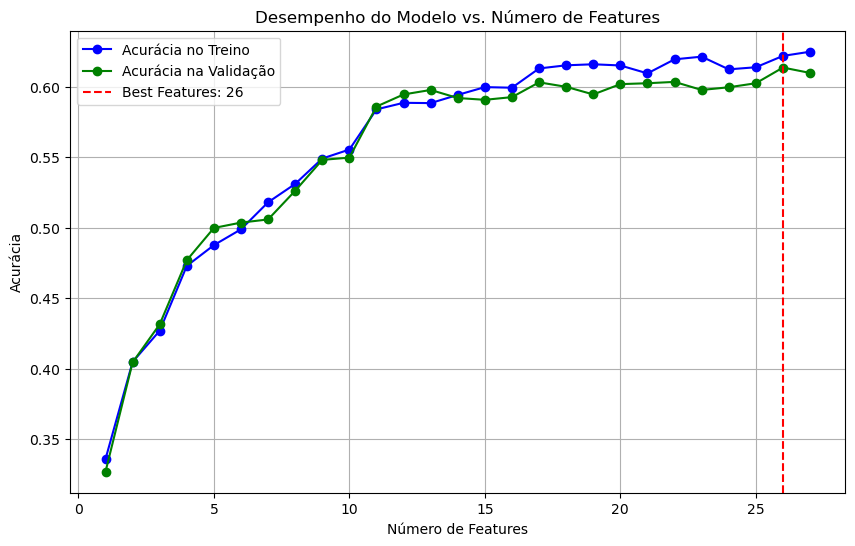

Melhor número de features com base na validação: 26


In [54]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Função para treinar e avaliar o modelo com diferentes números de features
def evaluate_features(X_train, X_val, y_train, y_val, max_features):
    train_results = []
    val_results = []

    for k in range(1, max_features + 1):
        # Selecionar as k melhores features com base no ANOVA F-test
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_k = selector.fit_transform(X_train, y_train)
        X_val_k = selector.transform(X_val)

        # Configurar e treinar o modelo MLP
        mlp = MLPClassifier(
            hidden_layer_sizes=(len(set(y_train)),),  # Número de classes
            solver='lbfgs',
            max_iter=5000,
            random_state=42
        )
        mlp.fit(X_train_k, y_train)

        # Avaliar no conjunto de treino e validação
        train_accuracy = mlp.score(X_train_k, y_train)
        val_accuracy = mlp.score(X_val_k, y_val)

        # Salvar os resultados
        train_results.append(train_accuracy)
        val_results.append(val_accuracy)

        print(f"Features: {k}, Acurácia - Treino: {train_accuracy:.2f}, Validação: {val_accuracy:.2f}")

    return train_results, val_results

# Avaliar o modelo variando o número de features
max_features = X_train.shape[1]  # Número total de features
train_results, val_results = evaluate_features(X_train_normalized, X_val_normalized, y_train, y_val, max_features)

# Identificar o número de features com a melhor acurácia de validação
best_k = val_results.index(max(val_results)) + 1  # +1 porque index é zero-based

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_features + 1), train_results, label='Acurácia no Treino', color='blue', marker='o')
plt.plot(range(1, max_features + 1), val_results, label='Acurácia na Validação', color='green', marker='o')

# Adicionar a linha vermelha no melhor número de features
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best Features: {best_k}')

# Configurações do gráfico
plt.title("Desempenho do Modelo vs. Número de Features")
plt.xlabel("Número de Features")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()

# Exibir o melhor número de features
print(f"Melhor número de features com base na validação: {best_k}")


In [55]:
# Importações necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, f_oneway, kruskal


# 1. Carregar os dados
df_features = pd.read_csv("caracteristicas_extraidas.csv")


# 2. Separar features (X) e classes (y)
X = df_features.drop(columns=["filename", "class"])
y = df_features["class"]


# 3. Função para normalizar as features
def normalize_features(features):
    """Função para normalizar as features usando média e desvio padrão."""
    means = features.mean(axis=0)
    stds = features.std(axis=0)
    normalized_features = (features - means) / stds
    return normalized_features, means, stds


# 4. Função TVT Split
def TVT_split(X, y, val_size=0.3, test_size=0.3, random_state=42):
    """
    Divide os dados em conjuntos de treino, validação e teste.
    """
    # Primeiro split: separa o conjunto de teste
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Ajustar o val_size relativo ao tamanho restante
    val_relative_size = val_size / (1 - test_size)
    
    # Segundo split: separa validação do conjunto de treino
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_relative_size, random_state=random_state
    )
    
    return X_train, X_val, y_train, y_val


# 5. Dividir os dados em treino e validação
X_train, X_val, y_train, y_val = TVT_split(X, y)


# 6. Normalizar os dados
X_train_normalized, means, stds = normalize_features(X_train)
X_val_normalized = (X_val - means) / stds


# 7. Avaliar poder discriminante para identificar as 26 melhores features
def avaliar_poder_discriminante(df, feature, target):
    grupos = [df[df[target] == classe][feature].dropna().values for classe in df[target].unique()]
    todas_normais = True

    for grupo in grupos:
        if len(grupo) > 0 and (grupo.max() - grupo.min()) > 0:  
            _, p_valor_normalidade = shapiro(grupo)
            if p_valor_normalidade < 0.05:
                todas_normais = False
                break
        else:
            todas_normais = False
            break

    if len(grupos) == 2:
        if todas_normais:
            teste = "Teste t de Student"
            estatistica, p_valor = ttest_ind(grupos[0], grupos[1])
        else:
            teste = "Teste de Mann-Whitney U"
            estatistica, p_valor = mannwhitneyu(grupos[0], grupos[1])
    else:
        if todas_normais:
            teste = "ANOVA"
            estatistica, p_valor = f_oneway(*grupos)
        else:
            teste = "Kruskal-Wallis"
            estatistica, p_valor = kruskal(*grupos)
    
    return {
        "feature": feature,
        "normalidade": "Normal" if todas_normais else "Não Normal",
        "teste": teste,
        "p_valor": p_valor
    }


# Avaliar todas as features e gerar tabela de resultados
def avaliar_todas_as_features(df, target):
    resultados = []
    features = [col for col in df.columns if col not in [target, "filename"]]
    
    for feature in features:
        resultado = avaliar_poder_discriminante(df, feature, target)
        resultados.append(resultado)
    
    # Converte a lista de resultados em DataFrame e ordena pelo p_valor
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values(by="p_valor").reset_index(drop=True)
    
    # Formatar valores p para exibir com precisão
    df_resultados["p_valor"] = df_resultados["p_valor"].apply(lambda x: f"{x:.10f}" if x > 0 else "<1e-10")
    
    return df_resultados


# Obter as 26 melhores features com base no p-valor
df_resultados = avaliar_todas_as_features(df_features, "class")

# Obter índices das 26 melhores features
top_features = df_resultados.head(26)  # Pega as 26 melhores features
top_feature_indices = [df_features.columns.get_loc(feature) for feature in top_features["feature"]]

# Filtrar os índices para garantir que estão no intervalo correto
top_feature_indices = [i for i in top_feature_indices if i < 27]

# Selecionar as melhores features com base nos índices corrigidos
X_train_selected = X_train_normalized.iloc[:, top_feature_indices]
X_val_selected = X_val_normalized.iloc[:, top_feature_indices]

# Criar e treinar o modelo
mlp = MLPClassifier(
    hidden_layer_sizes=(26,),
    solver='lbfgs',
    max_iter=10000,
    random_state=42,
    learning_rate_init=0.001
)

mlp.fit(X_train_selected, y_train)
# Avaliar acurácia nos conjuntos de treino e validação
train_accuracy = mlp.score(X_train_selected, y_train)
val_accuracy = mlp.score(X_val_selected, y_val)

print(f"Acurácia no conjunto de treino: {train_accuracy:.2f}")
print(f"Acurácia no conjunto de validação: {val_accuracy:.2f}")

# Avaliação final
y_pred_val = mlp.predict(X_val_selected)

print("\nMatriz de Confusão:")
print(confusion_matrix(y_val, y_pred_val))

print("\nRelatório de Classificação:")
print(classification_report(y_val, y_pred_val))


Acurácia no conjunto de treino: 0.70
Acurácia no conjunto de validação: 0.62

Matriz de Confusão:
[[105   0   0   1   8   0   7]
 [  0  16  10  20  50  49  26]
 [  0   7 327  44  39  53  18]
 [  0   3  45 333  34  37  36]
 [  1  13  32  27 614 293 162]
 [  3  26  45  31 260 661 106]
 [  2  17  14  19 176  91 854]]

Relatório de Classificação:
              precision    recall  f1-score   support

   _silence_       0.95      0.87      0.91       121
   _unknown_       0.20      0.09      0.13       171
    backward       0.69      0.67      0.68       488
     forward       0.70      0.68      0.69       488
        left       0.52      0.54      0.53      1142
       right       0.56      0.58      0.57      1132
        stop       0.71      0.73      0.72      1173

    accuracy                           0.62      4715
   macro avg       0.62      0.59      0.60      4715
weighted avg       0.61      0.62      0.61      4715



Configuração: (10,), Acurácia - Treino: 0.63, Validação: 0.61
Configuração: (20,), Acurácia - Treino: 0.69, Validação: 0.63
Configuração: (30,), Acurácia - Treino: 0.72, Validação: 0.64
Configuração: (40,), Acurácia - Treino: 0.76, Validação: 0.62
Configuração: (50,), Acurácia - Treino: 0.77, Validação: 0.61
Configuração: (10, 10), Acurácia - Treino: 0.65, Validação: 0.61
Configuração: (20, 20), Acurácia - Treino: 0.73, Validação: 0.61
Configuração: (30, 30), Acurácia - Treino: 0.82, Validação: 0.60
Configuração: (40, 40), Acurácia - Treino: 0.95, Validação: 0.56
Configuração: (50, 50), Acurácia - Treino: 1.00, Validação: 0.56

Melhor Configuração: (30,)
Acurácia no conjunto de treino: 0.72
Acurácia no conjunto de validação: 0.64

Matriz de Confusão:
[[114   0   3   1   2   1   0]
 [  0  17   7  25  48  53  21]
 [  0   3 336  42  27  63  17]
 [  1   7  39 342  38  36  25]
 [  1  13  27  29 609 291 172]
 [  0  20  49  34 265 685  79]
 [  1   8  17  14 159  74 900]]

Relatório de Classif

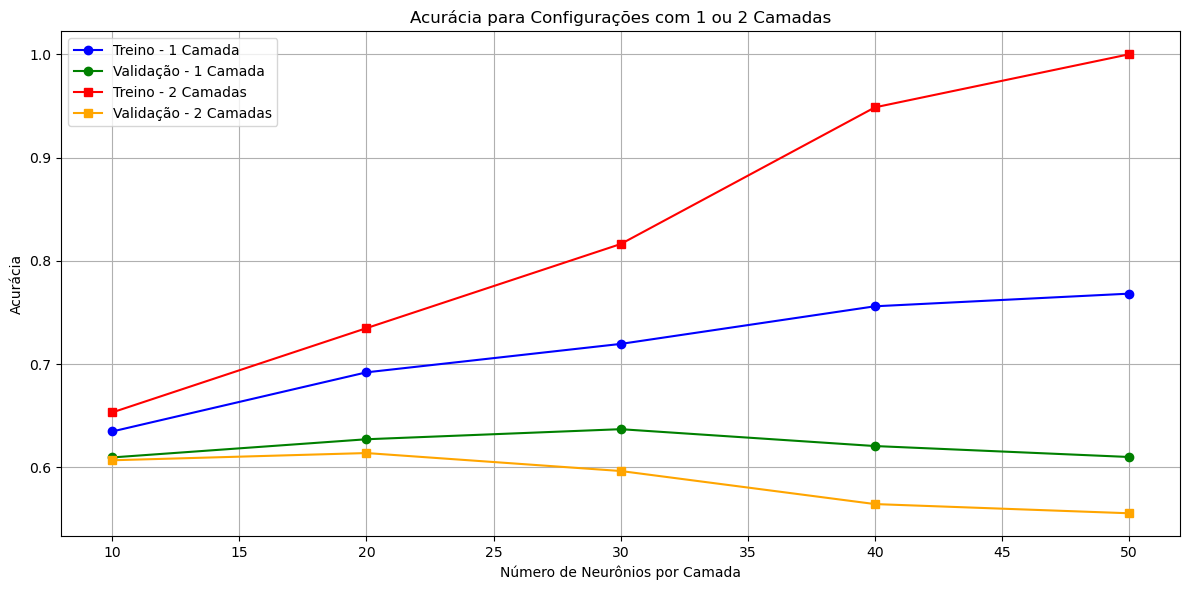

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suprimir ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# 6. Experimentar MLPs com 1 ou 2 camadas ocultas e número variável de neurônios
hidden_layer_configs = [
    (10,), (20,), (30,), (40,), (50,), 
    (10, 10), (20, 20), (30, 30), (40, 40), (50, 50)
]

val_results = []

# Testar diferentes configurações de MLP
for config in hidden_layer_configs:
    mlp = MLPClassifier(
        hidden_layer_sizes=config,
        solver='lbfgs',
        max_iter=200000,
        random_state=42,
        learning_rate_init=0.001,
        alpha=0.01,
        early_stopping=True,
        n_iter_no_change=10
    )
    mlp.fit(X_train_selected, y_train)
    train_accuracy = mlp.score(X_train_selected, y_train)
    val_accuracy = mlp.score(X_val_selected, y_val)
    val_results.append((config, train_accuracy, val_accuracy))
    print(f"Configuração: {config}, Acurácia - Treino: {train_accuracy:.2f}, Validação: {val_accuracy:.2f}")

# Identificar a melhor configuração com base na acurácia de validação
best_config = max(val_results, key=lambda x: x[2])
best_hidden_layer_config = best_config[0]

# Treinar o modelo final com a melhor configuração
mlp_best = MLPClassifier(
    hidden_layer_sizes=best_hidden_layer_config,
    solver='lbfgs',
    max_iter=5000000,
    random_state=42,
    learning_rate_init=0.001,
    alpha=0.01,
    early_stopping=True,
    n_iter_no_change=10
)
mlp_best.fit(X_train_selected, y_train)

# Avaliar o modelo final
train_accuracy_best = mlp_best.score(X_train_selected, y_train)
val_accuracy_best = mlp_best.score(X_val_selected, y_val)

print(f"\nMelhor Configuração: {best_hidden_layer_config}")
print(f"Acurácia no conjunto de treino: {train_accuracy_best:.2f}")
print(f"Acurácia no conjunto de validação: {val_accuracy_best:.2f}")

# Avaliação no Conjunto de Validação
y_pred_val_best = mlp_best.predict(X_val_selected)
print("\nMatriz de Confusão:")
print(confusion_matrix(y_val, y_pred_val_best))
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_pred_val_best))

# 7. Gerar gráfico
single_layer_configs = [config[0] for config in hidden_layer_configs if len(config) == 1]
single_layer_train_accs = [result[1] for result in val_results if len(result[0]) == 1]
single_layer_val_accs = [result[2] for result in val_results if len(result[0]) == 1]

double_layer_configs = [config[0] for config in hidden_layer_configs if len(config) == 2]
double_layer_train_accs = [result[1] for result in val_results if len(result[0]) == 2]
double_layer_val_accs = [result[2] for result in val_results if len(result[0]) == 2]

plt.figure(figsize=(12, 6))
plt.plot(single_layer_configs, single_layer_train_accs, label='Treino - 1 Camada', marker='o', color='b')
plt.plot(single_layer_configs, single_layer_val_accs, label='Validação - 1 Camada', marker='o', color='g')

plt.plot(double_layer_configs, double_layer_train_accs, label='Treino - 2 Camadas', marker='s', color='r')
plt.plot(double_layer_configs, double_layer_val_accs, label='Validação - 2 Camadas', marker='s', color='orange')

plt.xlabel('Número de Neurônios por Camada')
plt.ylabel('Acurácia')
plt.title('Acurácia para Configurações com 1 ou 2 Camadas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Configuração: (10,), F1-Score (Validação): 0.60
Configuração: (20,), F1-Score (Validação): 0.62
Configuração: (30,), F1-Score (Validação): 0.63
Configuração: (40,), F1-Score (Validação): 0.62
Configuração: (50,), F1-Score (Validação): 0.61
Configuração: (10, 10), F1-Score (Validação): 0.60
Configuração: (20, 20), F1-Score (Validação): 0.61
Configuração: (30, 30), F1-Score (Validação): 0.59
Configuração: (40, 40), F1-Score (Validação): 0.56
Configuração: (50, 50), F1-Score (Validação): 0.56


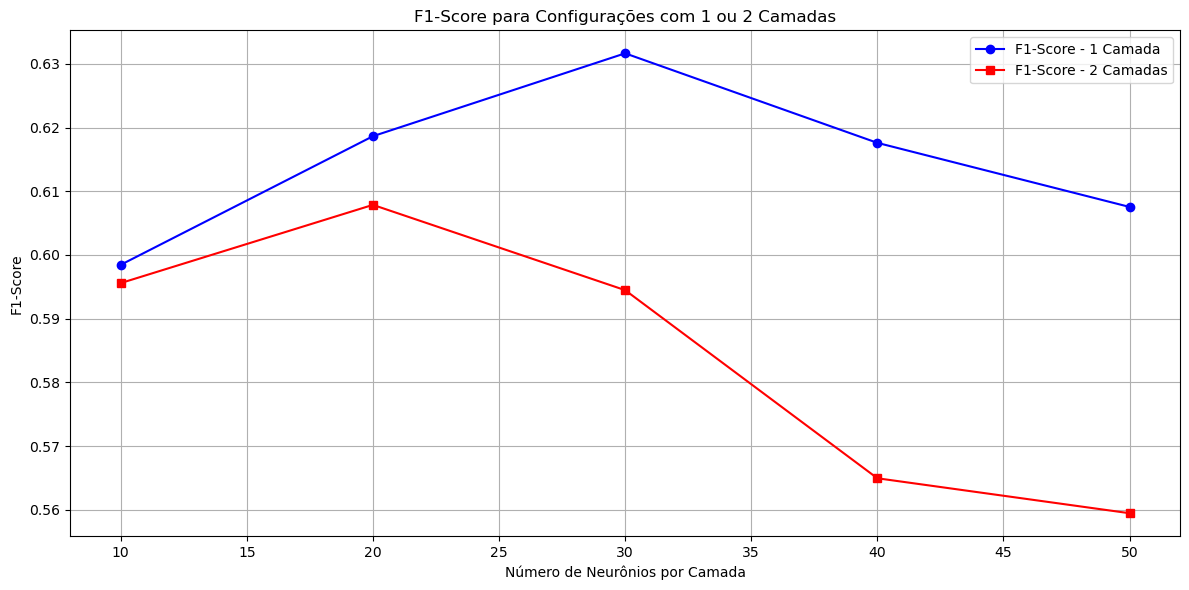

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suprimir ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# 6. Experimentar MLPs com 1 ou 2 camadas ocultas e número variável de neurônios
hidden_layer_configs = [
    (10,), (20,), (30,), (40,), (50,), 
    (10, 10), (20, 20), (30, 30), (40, 40), (50, 50)
]

# Armazenar os resultados com F1-Score
val_results = []

# Testar diferentes configurações de MLP
for config in hidden_layer_configs:
    # Criar o modelo MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=config,
        solver='lbfgs',
        max_iter=200000,
        random_state=42,
        learning_rate_init=0.001,
        alpha=0.01,
        early_stopping=True,
        n_iter_no_change=10
    )
    # Treinar o modelo
    mlp.fit(X_train_selected, y_train)

    # Predizer no conjunto de validação
    y_pred_val = mlp.predict(X_val_selected)
    
    # Calcular F1-Score para validação
    val_f1 = f1_score(y_val, y_pred_val, average='weighted')
    
    # Armazenar os resultados
    val_results.append((config, val_f1))
    print(f"Configuração: {config}, F1-Score (Validação): {val_f1:.2f}")

# Separar F1-Scores para configurações de 1 e 2 camadas
single_layer_configs = [config[0] for config in hidden_layer_configs if len(config) == 1]
single_layer_f1 = [result[1] for result in val_results if len(result[0]) == 1]

double_layer_configs = [config[0] for config in hidden_layer_configs if len(config) == 2]
double_layer_f1 = [result[1] for result in val_results if len(result[0]) == 2]

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(single_layer_configs, single_layer_f1, label='F1-Score - 1 Camada', marker='o', color='b')
plt.plot(double_layer_configs, double_layer_f1, label='F1-Score - 2 Camadas', marker='s', color='r')

plt.xlabel('Número de Neurônios por Camada')
plt.ylabel('F1-Score')
plt.title('F1-Score para Configurações com 1 ou 2 Camadas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import f1_score
import itertools
from tabulate import tabulate

# Suprimir ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Configurações para avaliação
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
learning_rates = [0.001, 0.01, 0.1]
max_iterations = [10000, 20000, 50000]

# Melhor configuração de camadas ocultas
hidden_layer_sizes = (30,)

# Combinar todas as configurações possíveis
parameter_combinations = list(itertools.product(
    activation_functions, solvers, learning_rates, max_iterations
))

# Resultados
evaluation_results = []

# Loop pelas combinações de parâmetros
for activation, solver, learning_rate, max_iter in parameter_combinations:
    try:
        # Criar o modelo com os parâmetros atuais
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            learning_rate_init=learning_rate,
            max_iter=max_iter,
            random_state=42,
            alpha=0.01,  # Regularização fixa
            early_stopping=True,
            n_iter_no_change=10
        )
        
        # Treinar o modelo
        mlp.fit(X_train_selected, y_train)
        
        # Avaliar no conjunto de validação
        y_pred_val = mlp.predict(X_val_selected)
        val_f1 = f1_score(y_val, y_pred_val, average='weighted')
        
        # Capturar o número de iterações realizadas
        n_iter = mlp.n_iter_
        
        # Armazenar os resultados
        evaluation_results.append({
            'Activation': activation,
            'Solver': solver,
            'Learning Rate': learning_rate,
            'Max Iterations': max_iter,
            'Effective Iterations': n_iter,
            'F1-Score': val_f1
        })
    except Exception as e:
        print(f"Erro na configuração Activation={activation}, Solver={solver}, "
              f"Learning Rate={learning_rate}, Max Iter={max_iter}: {e}")

# Converter os resultados em um DataFrame para facilitar a análise
results_df = pd.DataFrame(evaluation_results)

# Ordenar pela métrica F1-Score
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False)

# Exibir os resultados completos em tabela
print("\nResultados completos:\n")
print(tabulate(results_df_sorted, headers='keys', tablefmt='pretty', showindex=False))

# Exibir os 10 melhores resultados como tabela
top_10_results = results_df_sorted.head(10)
print("\nTop 10 Configurações (ordenadas por F1-Score):\n")
print(tabulate(top_10_results, headers='keys', tablefmt='pretty', showindex=False))



Resultados completos:

+------------+--------+---------------+----------------+----------------------+---------------------+
| Activation | Solver | Learning Rate | Max Iterations | Effective Iterations |      F1-Score       |
+------------+--------+---------------+----------------+----------------------+---------------------+
|    relu    | lbfgs  |     0.001     |     10000      |         5736         | 0.6316412077471959  |
|    relu    | lbfgs  |      0.1      |     50000      |         5736         | 0.6316412077471959  |
|    relu    | lbfgs  |     0.001     |     20000      |         5736         | 0.6316412077471959  |
|    relu    | lbfgs  |     0.001     |     50000      |         5736         | 0.6316412077471959  |
|    relu    | lbfgs  |     0.01      |     10000      |         5736         | 0.6316412077471959  |
|    relu    | lbfgs  |     0.01      |     20000      |         5736         | 0.6316412077471959  |
|    relu    | lbfgs  |     0.01      |     50000      |  

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle
import warnings

# Suprimir ConvergenceWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# Unir os conjuntos de treino e validação
X_train_val_combined = pd.concat([X_train_selected, X_val_selected])
y_train_val_combined = pd.concat([y_train, y_val])

# Criar e treinar o modelo com solver 'lbfgs' e 26 features
mlp_combined = MLPClassifier(
    hidden_layer_sizes=(30,),  # Uma camada oculta com 30 neurônios
    solver='lbfgs',
    max_iter=200000,
    random_state=42,
    learning_rate_init=0.001,
    alpha=0.01,
    early_stopping=False  # Não há conjunto de validação neste caso
)

# Treinar o modelo no conjunto combinado
mlp_combined.fit(X_train_val_combined, y_train_val_combined)

# Avaliar o modelo no conjunto de teste
X_test_scaled = scaler.transform(X_test)
X_test_selected = pd.DataFrame(
    X_test_scaled[:, top_feature_indices], 
    columns=X_train_selected.columns  # Restaurar os nomes das colunas
)
test_accuracy = mlp_combined.score(X_test_selected, y_test)
y_test_pred = mlp_combined.predict(X_test_selected)

print("\nAvaliação no Conjunto de Teste:")
print(f"Acurácia no Teste: {test_accuracy:.2f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_test_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred))

# Avaliar o modelo no conjunto de treino original
X_train_initial_scaled = scaler.transform(X_train)
X_train_initial_selected = pd.DataFrame(
    X_train_initial_scaled[:, top_feature_indices], 
    columns=X_train_selected.columns  # Restaurar os nomes das colunas
)
train_initial_accuracy = mlp_combined.score(X_train_initial_selected, y_train)
y_train_initial_pred = mlp_combined.predict(X_train_initial_selected)

print("\nAvaliação no Conjunto de Treino Inicial:")
print(f"Acurácia no Treino Inicial: {train_initial_accuracy:.2f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_train, y_train_initial_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_train, y_train_initial_pred))

# Salvar o modelo em um arquivo
with open('mlp_combined_model.pkl', 'wb') as model_file:
    pickle.dump(mlp_combined, model_file)

print("Modelo salvo como 'mlp_combined_model.pkl'.")



Avaliação no Conjunto de Teste:
Acurácia no Teste: 0.65
Matriz de Confusão:
[[ 87   0   0   2   1   0   0]
 [  1   8   6  19  22  49  21]
 [  0   1 245  27  26  48  17]
 [  0   2  17 234  11  29   5]
 [  0   8  19  18 394 204 124]
 [  0   4  18  25 162 475  55]
 [  2   4   9   7  90  47 600]]

Relatório de Classificação:
              precision    recall  f1-score   support

   _silence_       0.97      0.97      0.97        90
   _unknown_       0.30      0.06      0.10       126
    backward       0.78      0.67      0.72       364
     forward       0.70      0.79      0.74       298
        left       0.56      0.51      0.53       767
       right       0.56      0.64      0.60       739
        stop       0.73      0.79      0.76       759

    accuracy                           0.65      3143
   macro avg       0.66      0.63      0.63      3143
weighted avg       0.64      0.65      0.64      3143


Avaliação no Conjunto de Treino Inicial:
Acurácia no Treino Inicial: 0.69
Matr

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

# Classe Neural Network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.rand(input_size, hidden_size)  # Pesos entrada -> camada oculta
        self.bias1 = np.random.rand(1, hidden_size)             # Bias da camada oculta
        self.weights2 = np.random.rand(hidden_size, output_size)  # Pesos camada oculta -> saída
        self.bias2 = np.random.rand(1, output_size)             # Bias da saída
        self.output = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        self.layer1 = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = self.sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        return self.output

    def backprop(self, X, y, learning_rate):
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)
        
        layer1_error = np.dot(output_delta, self.weights2.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)
        
        self.weights2 += np.dot(self.layer1.T, output_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights1 += np.dot(X.T, layer1_delta) * learning_rate
        self.bias1 += np.sum(layer1_delta, axis=0, keepdims=True) * learning_rate

# Avaliar poder discriminante de uma feature
def avaliar_poder_discriminante(df, feature, target):
    from scipy.stats import f_oneway  # Exemplo usando ANOVA
    classes = df[target].unique()
    grupos = [df[df[target] == c][feature].values for c in classes]
    f_stat, p_valor = f_oneway(*grupos)
    return {"feature": feature, "p_valor": p_valor}

# Avaliar todas as features e gerar tabela de resultados
def avaliar_todas_as_features(df, target):
    resultados = []
    features = [col for col in df.columns if col not in [target, "filename"]]
    
    for feature in features:
        resultado = avaliar_poder_discriminante(df, feature, target)
        resultados.append(resultado)
    
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values(by="p_valor").reset_index(drop=True)
    
    df_resultados["p_valor"] = df_resultados["p_valor"].apply(lambda x: f"{x:.10f}" if x > 0 else "<1e-10")
    return df_resultados

# Função para avaliar a classificação
def evaluate_classification(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return {
        'Confusion Matrix': conf_matrix,
        'Recall': recall,
        'Precision': precision,
        'F1-score': f1
    }

# Função principal
if __name__ == "__main__":
    # Carregar o dataset
    df_features = pd.read_csv("caracteristicas_extraidas.csv")  # Atualize o nome do arquivo

    # Remover a coluna 'filename'
    df_features = df_features.drop(columns=['filename'], errors='ignore')

    # Mapear classes para inteiros
    class_labels = df_features['class'].unique()
    label_to_int = {label: idx for idx, label in enumerate(class_labels)}
    df_features['class'] = df_features['class'].map(label_to_int)

    # Separar features (X) e rótulos (y)
    X = df_features.iloc[:, :-1].values
    y = df_features.iloc[:, -1].values

    # Divisão treino-teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalizar as features manualmente
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    X_train_normalized = (X_train - means) / stds
    X_test_normalized = (X_test - means) / stds

    # Avaliar todas as features e selecionar as 26 melhores
    df_resultados = avaliar_todas_as_features(df_features, "class")
    top_features = df_resultados.head(26)["feature"].tolist()

    # Selecionar os índices das 26 melhores features
    features_in_X = [col for col in df_features.columns if col != "class"]
    top_feature_indices = [features_in_X.index(feature) for feature in top_features]

    # Aplicar a seleção das melhores features
    X_train_selected = X_train_normalized[:, top_feature_indices]
    X_test_selected = X_test_normalized[:, top_feature_indices]

    # One-hot encoding para os rótulos
    num_classes = len(class_labels)
    y_train_one_hot = np.eye(num_classes)[y_train.astype(int)]
    y_test_one_hot = np.eye(num_classes)[y_test.astype(int)]

    # Inicializar a rede neural
    input_size = X_train_selected.shape[1]
    hidden_size = 30
    output_size = num_classes
    nn = NeuralNetwork(input_size, hidden_size, output_size)

    # Treinamento
    epochs = 1000
    learning_rate = 0.01
    for epoch in range(epochs):
        nn.feedforward(X_train_selected)
        nn.backprop(X_train_selected, y_train_one_hot, learning_rate)
        if epoch % 100 == 0:
            loss = np.mean((y_train_one_hot - nn.output) ** 2)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    # Previsões no conjunto de teste
    predictions = nn.feedforward(X_test_selected)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test_one_hot, axis=1)

    # Avaliação
    evaluation_results = evaluate_classification(true_classes, predicted_classes)
    print("\nResultados da avaliação:")
    print(f"Matriz de Confusão:\n{evaluation_results['Confusion Matrix']}")
    print(f"Recall: {evaluation_results['Recall']:.2f}")
    print(f"Precisão: {evaluation_results['Precision']:.2f}")
    print(f"F1-Score: {evaluation_results['F1-score']:.2f}")

    # Acurácia
    accuracy = np.mean(predicted_classes == true_classes)
    print(f"\nAcurácia no conjunto de teste: {accuracy:.2f}")

Epoch 0, Loss: 0.7413
Epoch 100, Loss: 0.0634
Epoch 200, Loss: 0.0560
Epoch 300, Loss: 0.0537
Epoch 400, Loss: 0.0528
Epoch 500, Loss: 0.0523
Epoch 600, Loss: 0.0518
Epoch 700, Loss: 0.0511
Epoch 800, Loss: 0.0509
Epoch 900, Loss: 0.0505

Resultados da avaliação:
Matriz de Confusão:
[[   0    0    0    2    0    0    0]
 [   0    0    0    7    1    0    0]
 [   0    0    0   57    6    0    0]
 [   1    0    0 1155  230    0    0]
 [   4    0    0  453 2359    0    0]
 [ 112    0    0   38  265    0    0]
 [  14    0    0    4    7    0    0]]
Recall: 0.75
Precisão: 0.69
F1-Score: 0.71

Acurácia no conjunto de teste: 0.75


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

# Seção de Implementação: Normalização de Features

# 1. Carregar os dados
df_features = pd.read_csv("caracteristicas_extraidas.csv")

# 2. Separar features (X) e classes (y)
X = df_features.drop(columns=["filename", "class"])
y = df_features["class"]

# 3. Lista de features esperadas
expected_features = [
    "crest_factor", "stft_std", "mfcc_mean", "harmonic_to_noise_ratio", "spectral_contrast",
    "spectral_entropy", "spectral_flatness", "spectral_rolloff", "mean_time", "kurtosis",
    "pitch", "wavelet_entropy", "delta_mfcc_mean", "signal_energy", "skewness", "tonnetz",
    "wavelet_energy", "energy_entropy", "spectral_bandwidth", "chroma", "stft_mean",
    "spectral_centroid", "cepstral_peak_prominence", "duration"
]

# Filtrar o DataFrame para incluir apenas as features esperadas
X = X[expected_features]

# 4. Função TVT Split
def TVT_split(X, y, val_size=0.3, test_size=0.3, random_state=42):
    """
    Divide os dados em conjuntos de treino, validação e teste.
    """
    # Primeiro split: separa o conjunto de teste
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Ajustar o val_size relativo ao tamanho restante
    val_relative_size = val_size / (1 - test_size)
    
    # Segundo split: separa validação do conjunto de treino
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_relative_size, random_state=random_state
    )
    
    return X_train, X_val, y_train, y_val, X_test, y_test

# 5. Dividir os dados em treino, validação e teste
X_train, X_val, y_train, y_val, X_test, y_test = TVT_split(X, y)

# 6. Combinar os conjuntos de treino e validação
X_train_val_combined = pd.concat([X_train, X_val])

# 7. Normalizar os dados
def normalize_features(features):
    """Função para normalizar as features usando média e desvio padrão."""
    means = features.mean(axis=0)
    stds = features.std(axis=0)
    normalized_features = (features - means) / stds
    return normalized_features, means, stds

X_train_val_combined_normalized, means, stds = normalize_features(X_train_val_combined)

# 8. Salvar as estatísticas de normalização
feature_stats = {
    'mean': means,
    'std': stds
}
with open('feature_statistics.pkl', 'wb') as stats_file:
    pickle.dump(feature_stats, stats_file)
print("Estatísticas de normalização salvas como 'feature_statistics.pkl'.")


Estatísticas de normalização salvas como 'feature_statistics.pkl'.


In [ ]:
####################################################################
#                                                                  #
#                      Wheelchair Game                             #
#                                                                  #
#   control a wheelchair through a maze using voice commands.      #
#   Make the blue arrow reach the green square for winning.        #
#   WASD + space keys available for controlling the wheelchair     #
#   simultaneously with the voice commands.                        #
#                                                                  #
#   Libraries needed: pygame, sounddevice, numpy                   #
#                                                                  #
#     Developed by Marco Simoes (msimoes@dei.uc.pt) - DEI 2024     #
#                                                                  #
####################################################################


import pygame
import random
import math
import sounddevice as sd
import numpy as np
import threading
import time
import matplotlib.pyplot as plt

# init pygame
pygame.init()

# define constants
SCREEN_WIDTH, SCREEN_HEIGHT = 855, 675
CELL_SIZE = 15  # cell size
CELL_EXPANSION = 3  # number of cells within each cell
FPS = 10
MAZE_ROWS = SCREEN_HEIGHT // CELL_SIZE // CELL_EXPANSION  # number of rows
MAZE_COLS = SCREEN_WIDTH // CELL_SIZE // CELL_EXPANSION # number of cols
INITIAL_SCORE = 0  # counter of crashes

# colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
BLUE = (0, 0, 255)
RED = (255, 0, 0)
GREEN = (0, 255, 0)


# game screen set up
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Wheelchair Labyrinth")

last_classification_time = time.time()


class Maze:
    ''' Maze class. Sets up and draws the maze.'''
    
    def __init__(self):
        # base grid
        self.base_grid = [[1 for _ in range(MAZE_COLS)] for _ in range(MAZE_ROWS)]
        # expanded grid
        self.expanded_grid = [[1 for _ in range(MAZE_COLS * CELL_EXPANSION)] for _ in range(MAZE_ROWS * CELL_EXPANSION)]
        
        self.generate_maze()
        self.expand_maze()
        
        # place the target in a randow white cell
        self.target = self.get_random_white_cell()

    def generate_maze(self):
        # simple DFS algorithm to build the maze
        
        stack = [(1, 1)]
        self.base_grid[1][1] = 0

        while stack:
            row, col = stack[-1]
            neighbors = []

            if row > 1 and self.base_grid[row - 2][col] == 1:
                neighbors.append((row - 2, col))
            if row < MAZE_ROWS - 2 and self.base_grid[row + 2][col] == 1:
                neighbors.append((row + 2, col))
            if col > 1 and self.base_grid[row][col - 2] == 1:
                neighbors.append((row, col - 2))
            if col < MAZE_COLS - 2 and self.base_grid[row][col + 2] == 1:
                neighbors.append((row, col + 2))

            if neighbors:
                next_row, next_col = random.choice(neighbors)
                self.base_grid[next_row][next_col] = 0
                self.base_grid[(next_row + row) // 2][(next_col + col) // 2] = 0
                stack.append((next_row, next_col))
            else:
                stack.pop()

    def expand_maze(self):
        # expand rows so each place is a CELL_EXPANSION by CELL_EXPANSION mini-grid of places
        for row in range(MAZE_ROWS):
            for col in range(MAZE_COLS):
                if self.base_grid[row][col] == 0:
                    # expand cells
                    for i in range(CELL_EXPANSION):
                        for j in range(CELL_EXPANSION):
                            self.expanded_grid[row * CELL_EXPANSION + i][col * CELL_EXPANSION + j] = 0

    def get_random_white_cell(self):
        # find random white cell
        while True:
            row = random.randint(0, MAZE_ROWS-1)
            col = random.randint(0, MAZE_COLS-1)
            if self.expanded_grid[int((row+0.5)*CELL_EXPANSION)][int((col+0.5)*CELL_EXPANSION)] == 0:
                return (int((col+0.5)*CELL_EXPANSION), int((row+0.5)*CELL_EXPANSION))

    def draw(self):
        # draw the maze
        for row in range(MAZE_ROWS * CELL_EXPANSION):
            for col in range(MAZE_COLS * CELL_EXPANSION):
                color = WHITE if self.expanded_grid[row][col] == 0 else BLACK
                pygame.draw.rect(screen, color, (col * CELL_SIZE, row * CELL_SIZE, CELL_SIZE, CELL_SIZE))

        # draw the target
        target_x, target_y = self.target
        pygame.draw.rect(screen, GREEN, (target_x * CELL_SIZE, target_y * CELL_SIZE, CELL_SIZE, CELL_SIZE))


class Wheelchair:
    '''Wheelchair class. Controls the wheelchair and game dynamics.'''
    
    def __init__(self, maze):
        self.x, self.y = 1.5*CELL_SIZE*CELL_EXPANSION, 1.5*CELL_SIZE*CELL_EXPANSION
        self.direction = 0  # angle in degrees (0 is right)
        self.speed = 0
        self.maze = maze  
        self.score = INITIAL_SCORE  # initial score
        self.win = False  # win flag

    def can_move(self, dx, dy):
        # compute new position
        new_x = (self.x + dx) // CELL_SIZE
        new_y = (self.y + dy) // CELL_SIZE

        # check if new position is white and whithin the board
        if 0 <= new_x < len(self.maze.expanded_grid[0]) and 0 <= new_y < len(self.maze.expanded_grid):
            return self.maze.expanded_grid[int(new_y)][int(new_x)] == 0
        return False

    def move(self):
        if self.win:
            return  # after win, disallow movement

        # compute dx and dy based on the direction (angle in degrees)
        rad = math.radians(self.direction)
        dx = self.speed * math.cos(rad)
        dy = -self.speed * math.sin(rad)

        # check if can move before changing position
        if self.can_move(dx, dy):
            self.x += dx
            self.y += dy
        else:
            # count collision
            self.score += 1
            self.speed = 0

    def rotate(self, direction):
        if self.win:
            return  # stop rotation after winning
        if direction == "LEFT":
            self.direction = (self.direction + 45) % 360
        elif direction == "RIGHT":
            self.direction = (self.direction - 45) % 360

    def stop(self):
        self.speed = 0

    def execute_command(self, command):
        if command == "FORWARD":
            self.speed = CELL_SIZE // 2
        elif command == "BACKWARD":
            self.speed = -CELL_SIZE // 2
        elif command == "LEFT":
            self.rotate("LEFT")
        elif command == "RIGHT":
            self.rotate("RIGHT")
        elif command == "STOP":
            self.stop()

    def check_win(self):
        # check if target is reached
        target_x, target_y = self.maze.target
        return (self.x // CELL_SIZE, self.y // CELL_SIZE) == (target_x, target_y)

    def draw(self):
        # draw wheelchair as a triangle
        rad = math.radians(self.direction)
        front_x = self.x + CELL_SIZE * math.cos(rad)
        front_y = self.y - CELL_SIZE * math.sin(rad)
        left_x = self.x + CELL_SIZE * math.cos(rad + math.radians(135))
        left_y = self.y - CELL_SIZE * math.sin(rad + math.radians(135))
        right_x = self.x + CELL_SIZE * math.cos(rad - math.radians(135))
        right_y = self.y - CELL_SIZE * math.sin(rad - math.radians(135))

        pygame.draw.polygon(screen, BLUE, [(front_x, front_y), (left_x, left_y), (right_x, right_y)]) 


def sound_capture_thread(wheelchair):
    '''thread for capturing the microphone sound and converting it to a command to the wheelchair.'''
    
    RATE = 16000  # sampling rate of 16kHz
    RECORD_SECONDS = 1  # capture 1 second of sound
    OVERLAP_SECONDS = .95  # overlap between segments
    NO_OVERLAP_SECONDS = RECORD_SECONDS - OVERLAP_SECONDS # new data on each segment

    AMP_THRESHOLD = 0.2  # minimum amplitude to consider sound
    GAP_TIME_THRESHOLD = 0.5  # minimum time between classifications

    buffer_size = int(RATE * RECORD_SECONDS)
    buffer = np.zeros(buffer_size, dtype=np.float32)

    def callback(indata, frames, timestamp, status):
        global last_classification_time
        nonlocal buffer
        if status:
            print(status)
        
        # add the new data to the buffer, rolling the current data to the left
        buffer = np.roll(buffer, -len(indata))
        buffer[-len(indata):] = indata[:, 0]

        center_buffer = buffer[len(buffer)//2 - len(buffer)//10 : len(buffer)//2 + len(buffer)//10]
        if np.max(np.abs(center_buffer)) < AMP_THRESHOLD or (time.time() - last_classification_time) < GAP_TIME_THRESHOLD:
            return
        
        last_classification_time = time.time()
        
        # convert the captured sound to a command
        command = process_sound(buffer)

        if command:
            wheelchair.execute_command(command)

    # open audio stream from microphone
    with sd.InputStream(device=None, callback=callback, channels=1, samplerate=RATE, blocksize=int(RATE * NO_OVERLAP_SECONDS)):
        while True:
            time.sleep(NO_OVERLAP_SECONDS)  # Aguardar NO_OVERLAP_SECONDS


def main():
    '''Main function of the game.'''
    global start_recording_flag, start_recording_time
    
    clock = pygame.time.Clock()
    maze = Maze()
    wheelchair = Wheelchair(maze)
    running = True
    start_ticks = pygame.time.get_ticks()  # Tempo inicial

    # start sound capture thread
    sound_thread = threading.Thread(target=sound_capture_thread, args=(wheelchair,))
    sound_thread.daemon = True
    sound_thread.start()

    while running:
        screen.fill(WHITE)
        maze.draw()
        wheelchair.draw()

        # render points on screen
        font = pygame.font.SysFont(None, 36)
        score_text = font.render(f"Colisions: {wheelchair.score}", True, RED)
        screen.blit(score_text, (10, 10))

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if wheelchair.win:
                    continue  # stop wheelchair control after winning
                if event.key == pygame.K_w:  # Forward
                    wheelchair.execute_command("FORWARD")
                elif event.key == pygame.K_s:  # Backward
                    wheelchair.execute_command("BACKWARD")
                elif event.key == pygame.K_a:  # Rotate left (45 degrees)
                    wheelchair.execute_command("LEFT")
                elif event.key == pygame.K_d:  # Rotate right (45 degrees)
                    wheelchair.execute_command("RIGHT")
                elif event.key == pygame.K_SPACE:  # Stop
                    wheelchair.execute_command("STOP")
                


        # check victory
        if wheelchair.check_win():
            wheelchair.win = True  # register victory
            font = pygame.font.SysFont(None, 44)
            win_text = font.render("Congratulations! You reached the target location!", True, GREEN)
            screen.blit(win_text, (SCREEN_WIDTH // 15, SCREEN_HEIGHT // 2))
            wheelchair.stop()  # stop the wheelchair

        wheelchair.move()

        pygame.display.flip()
        clock.tick(FPS)

    pygame.quit()


###############################################################################################
#                                                                                             #
#                              STUDENT CODE STARTS HERE                                       #
#                                                                                             #
# Edit, replace, change the following code as you wish. The only thing that                   #
# must be kept is the name of the function process_sound, and it must return                  #
# a string with a command for the game to act. The list of possible commands is:              #
# ["FORWARD", "BACKWARD", "LEFT", "RIGHT", "STOP", ""] -> empty string means do nothing       #
#                                                                                             #
###############################################################################################
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
from scipy.stats import kurtosis, skew
from scipy.fftpack import dct
import librosa
import pywt  # Necessário para a Transformada Wavelet
import sounddevice as sd  # Biblioteca para captura de áudio em tempo real
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='librosa')
import pickle

# Carregar o modelo
with open('mlp_combined_model.pkl', 'rb') as model_file:
    classifier = pickle.load(model_file)

# Carregar as estatísticas de normalização (médias e desvios padrão)
with open('feature_statistics.pkl', 'rb') as stats_file:
    feature_stats = pickle.load(stats_file)
    feature_means = feature_stats['mean']
    feature_stds = feature_stats['std']

# Lista de features esperadas pelo modelo
expected_features = [
    "crest_factor", "stft_std", "mfcc_mean", "harmonic_to_noise_ratio", "spectral_contrast",
    "spectral_entropy", "spectral_flatness", "spectral_rolloff", "mean_time", "kurtosis",
    "pitch", "wavelet_entropy", "delta_mfcc_mean", "signal_energy", "skewness", "tonnetz",
    "wavelet_energy", "energy_entropy", "spectral_bandwidth", "chroma", "stft_mean",
    "spectral_centroid", "cepstral_peak_prominence", "duration"
]


commands = {0: "", 1: "FORWARD", 2: "BACKWARD", 3: "LEFT", 4: "RIGHT", 5: "STOP"}

def classify(features):
    ''' Recebe um vetor de features e retorna uma predição do classificador '''
    feature_df = pd.DataFrame([features], columns=expected_features)
    prediction = classifier.predict(feature_df)
    
    # Supondo que a predição seja um array com uma única string
    predicted_label = prediction[0]
    
    # Converter predição para um comando usando match-case
    match predicted_label:
        case "forward":
            idx = 1
        case "backward":
            idx = 2
        case "left":
            idx = 3
        case "right":
            idx = 4
        case "stop":
            idx = 5
        case _:
            idx = 0
            
    print(f"Prediction: {predicted_label}")
    return commands[idx]

def extract_features(audio, sr=16000):
    # Características no Domínio do Tempo
    zcr = np.mean(np.diff(np.sign(audio)) != 0) / len(audio)  # Zero-Crossing Rate
    rms = np.sqrt(np.mean(audio**2))  # Root Mean Square
    crest_factor = np.max(np.abs(audio)) / rms if rms > 0 else 0  # Crest Factor
    signal_energy = np.sum(audio**2)  # Signal Energy
    audio_kurtosis = kurtosis(audio)  # Kurtosis
    audio_skewness = skew(audio)  # Skewness
    mean_time = np.mean(audio)  # Mean Time
    duration = len(audio) / sr  # Duration

    # Características no Domínio da Frequência
    freqs = np.fft.rfftfreq(len(audio), d=1/sr)
    spectrum = np.abs(np.fft.rfft(audio))

    spectral_centroid = np.sum(freqs * spectrum) / np.sum(spectrum)  # Spectral Centroid
    spectral_bandwidth = np.sqrt(np.sum((freqs - spectral_centroid)**2 * spectrum) / np.sum(spectrum))  # Spectral Bandwidth
    spectral_rolloff = freqs[np.where(np.cumsum(spectrum) >= 0.85 * np.sum(spectrum))[0][0]]  # Spectral Roll-off
    spectral_flatness = np.exp(np.mean(np.log(spectrum + 1e-10))) / (np.mean(spectrum) + 1e-10)  # Spectral Flatness
    spectral_entropy = -np.sum((spectrum / np.sum(spectrum) + 1e-10) * np.log(spectrum / np.sum(spectrum) + 1e-10))  # Spectral Entropy
    spectral_contrast = np.mean(np.abs(np.diff(spectrum)))  # Spectral Contrast (simplificado)
    harmonic_to_noise_ratio = 10 * np.log10(np.sum(spectrum**2) / (np.sum((spectrum - np.mean(spectrum))**2) + 1e-10))  # HNR
    pitch = freqs[np.argmax(spectrum)]  # Pitch (Frequência Fundamental)

    # MFCC (Simplificado usando DCT)
    mfcc = dct(audio, type=2, norm='ortho')[:13]  # Coeficientes MFCC
    delta_mfcc = np.gradient(mfcc)  # Delta MFCC
    cepstral_peak_prominence = np.max(mfcc) - np.mean(mfcc)  # Cepstral Peak Prominence

    # Extração do Chroma Feature (usando FFT)
    chroma = np.zeros(12)
    for i in range(12):
        chroma[i] = np.sum(spectrum[i::12])  # Soma as magnitudes das bandas de frequência para cada pitch class
    
    # Cálculo do Tonnetz usando librosa
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
    tonnetz_mean = np.mean(tonnetz, axis=1)  # Média ao longo do tempo para cada componente do tonnetz
    energy_entropy = -np.sum((audio**2 / np.sum(audio**2 + 1e-10)) * np.log(audio**2 / np.sum(audio**2 + 1e-10) + 1e-10))  # Energy Entropy

    # Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(audio))
    stft_mean = np.mean(stft)  # Média do módulo da STFT
    stft_std = np.std(stft)    # Desvio padrão do módulo da STFT
    
    # Wavelet Transform usando Wavelet de Daubechies (db4)
    coeffs = pywt.wavedec(audio, 'db4', level=5)
    wavelet_energy = np.sum(np.square(coeffs[0]))  # Energia da aproximação de nível mais alto
    wavelet_entropy = -np.sum((coeffs[0]**2 / np.sum(coeffs[0]**2 + 1e-10)) * np.log(coeffs[0]**2 / np.sum(coeffs[0]**2 + 1e-10) + 1e-10))  # Entropia da Wavelet

    # Agrupando as features no mesmo formato do esperado pelo modelo
    features = {
        "crest_factor": crest_factor,
        "stft_std": stft_std,
        "mfcc_mean": np.mean(mfcc),
        "harmonic_to_noise_ratio": harmonic_to_noise_ratio,
        "spectral_contrast": spectral_contrast,
        "spectral_entropy": spectral_entropy,
        "spectral_flatness": spectral_flatness,
        "spectral_rolloff": spectral_rolloff,
        "mean_time": mean_time,
        "kurtosis": audio_kurtosis,
        "pitch": pitch,
        "wavelet_entropy": wavelet_entropy,
        "delta_mfcc_mean": np.mean(delta_mfcc),
        "signal_energy": signal_energy,
        "skewness": audio_skewness,
        "tonnetz": np.mean(tonnetz),
        "wavelet_energy": wavelet_energy,
        "energy_entropy": energy_entropy,
        "spectral_bandwidth": spectral_bandwidth,
        "chroma": np.mean(chroma),
        "stft_mean": stft_mean,
        "spectral_centroid": spectral_centroid,
        "cepstral_peak_prominence": cepstral_peak_prominence,
        "duration": duration
    }

    feature_vector = [features.get(feature, 0) for feature in expected_features]

    # Normalização das features
    normalized_feature_vector = (feature_vector - feature_means) / feature_stds

    # Imprimir o vetor de features normalizado e as features esperadas
    #print("normalized_feature_vector:", normalized_feature_vector)
    #print("expected_features:", expected_features)

    assert len(normalized_feature_vector) == len(expected_features), "Mismatch in the number of features generated."
    return normalized_feature_vector  # Retornar o vetor normalizado

def process_sound(sound):
    ''' Recebe um segmento de som de 1 segundo do microfone e retorna um comando '''
    command = ""
    # Extrair features diretamente do som
    feature_vector = extract_features(sound)
    # Classificar as features
    command = classify(feature_vector)

    return command


if __name__ == "__main__":
    main()